# Analisis Data Penjualan Tahun 2019
## Tujuan Analisis
Analisis ini bertujuan untuk memahami perilaku pelanggan dan performa produk selama tahun 2019, dengan fokus pada:

- Melakukan segmentasi pelanggan dan produk untuk mengidentifikasi kelompok dengan kontribusi pendapatan berbeda.

- Memahami tren popularitas produk dari waktu ke waktu, terutama di segmen produk utama.

- Mengukur ukuran keranjang belanja harian rata-rata (Average Basket Size/ABS) secara keseluruhan dan berdasarkan segmen pelanggan serta negara.

- Menjawab pertanyaan bisnis.


In [1]:
import pandas as pd

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_sales = pd.read_csv('Sales Transaction v.4a.csv')

In [4]:
df_sales

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom
...,...,...,...,...,...,...,...,...
536345,C536548,12/1/2018,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany
536346,C536548,12/1/2018,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany
536347,C536548,12/1/2018,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany
536348,C536548,12/1/2018,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany


In [5]:
# Cek info
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB


Total Kolom ada 8 kolom dan 536350 baris, kolom Date masih object dan kolom CustomerNo ada 1 missing value

# Data Cleansing
Eksekusi 2 code dibawah ini

In [6]:
# 1. Ubah kolom Date menjadi tipe datetime
df_sales['Date']= pd.to_datetime(df_sales['Date'])

# 2. Buang semua transaksi yang memiliki quantity negative atau yang TransactionNo diawali dengan C
df_sales = df_sales[df_sales['TransactionNo'].str[0]!='C']

In [7]:
df_sales

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom
...,...,...,...,...,...,...,...,...
536320,536585,2018-12-01,37449,Ceramic Cake Stand + Hanging Cakes,20.45,2,17460.0,United Kingdom
536321,536590,2018-12-01,22776,Sweetheart 3 Tier Cake Stand,20.45,1,13065.0,United Kingdom
536322,536590,2018-12-01,22622,Box Of Vintage Alphabet Blocks,20.45,2,13065.0,United Kingdom
536323,536591,2018-12-01,37449,Ceramic Cake Stand + Hanging Cakes,20.45,1,14606.0,United Kingdom


In [8]:
# Cek ringkasan statistik deskriptif dari dataset 
df_sales.describe()

,Date,Price,Quantity,CustomerNo
count,527765,527765.000000,527765.000000,527764.000000
mean,2019-07-04 05:58:57.258438400,12.629636,10.594674,15231.626733
min,2018-12-01 00:00:00,5.130000,1.000000,12004.000000
25%,2019-03-28 00:00:00,10.990000,1.000000,13813.000000
50%,2019-07-20 00:00:00,11.940000,3.000000,15159.000000
75%,2019-10-19 00:00:00,14.090000,11.000000,16729.000000
max,2019-12-09 00:00:00,660.620000,80995.000000,18287.000000
std,NaN,7.933217,156.786646,1716.522182


- Ada CustomerNo yang missing
- Ada Quantity yang totalnya sampai puluhan ribu

In [9]:
# Cek data duplikat
df_sales.duplicated().sum()

5163

Ada 5163 data yang duplicate

In [10]:
# Cek data missing value
df_sales.isnull().sum()

TransactionNo    0
Date             0
ProductNo        0
ProductName      0
Price            0
Quantity         0
CustomerNo       1
Country          0
dtype: int64

- Ada 1 data dari CustomerNo Missing Value

<Axes: >

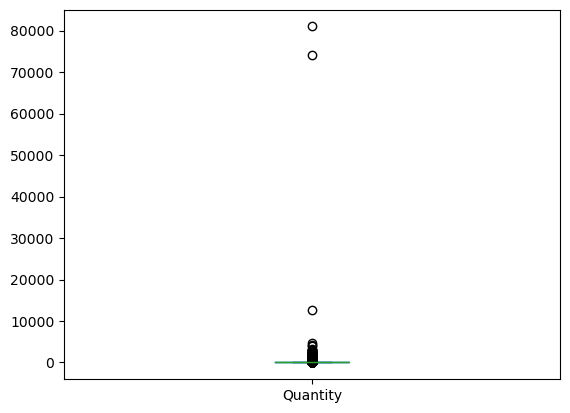

In [11]:
# Cek outlier dari kolom Quantity
df_sales['Quantity'].plot(kind='box')

In [12]:
# Cek Nilai Persentenil dari Quantity 
df_sales['Quantity'].describe(percentiles=[0.5,0.8,0.9,0.95,0.99,0.999])

count    527765.000000
mean         10.594674
std         156.786646
min           1.000000
50%           3.000000
80%          12.000000
90%          24.000000
95%          30.000000
99%         100.000000
99.9%       448.000000
max       80995.000000
Name: Quantity, dtype: float64

In [13]:
df_sales.sort_values('Quantity').tail()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
331834,554868,2019-05-27,22197,Popcorn Holder,10.99,4300,13135.0,United Kingdom
117790,573008,2019-10-27,84077,World War 2 Gliders Asstd Designs,10.47,4800,12901.0,United Kingdom
41367,578841,2019-11-25,84826,Asstd Design 3d Paper Stickers,6.19,12540,13256.0,United Kingdom
473985,541431,2019-01-18,23166,Medium Ceramic Top Storage Jar,11.32,74215,12346.0,United Kingdom
142,581483,2019-12-09,23843,Paper Craft Little Birdie,12.38,80995,16446.0,United Kingdom


- Ada transaksi dengan jumlah yang sangat tinggi dengan harga yang sangat murah, sangat mencurigakan
- Bahkan di top 99.9% saja hanya ratusan, kita keluarkan saja data yg totalnya mencurigakan

In [14]:
df_sales = df_sales.drop_duplicates() # Menghaspus data duplikat
df_sales.dropna(subset=['CustomerNo'], inplace=True) # Membuang CustomerID yang null
df_sales = df_sales[df_sales['Quantity']<=df_sales['Quantity'].quantile(0.999)] # Membuang Quantity yang terlalu ekstrem

C:\Users\W10\AppData\Local\Temp\ipykernel_13476\489932361.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales.dropna(subset=['CustomerNo'], inplace=True) # Membuang CustomerID yang null


In [15]:
# Konversi kolom order_purchase_timestamp df_sales format datetime
df_sales['Date'] = pd.to_datetime(df_sales['Date'])

# Menambahkan kolom berdasarkan by year
df_sales['Year'] = df_sales['Date'].dt.year
# Menambahkan kolom berdasarkan by month
df_sales['Month'] = df_sales['Date'].dt.month
# Menambahkan kolom berdasarkan by day
df_sales['Day'] = df_sales['Date'].dt.day_name()
# Tambahkan kolom YearMonth dalam format 'YYYY-MM'
df_sales['YearMonth'] = df_sales['Date'].dt.to_period('M').astype(str)

In [16]:
# Cek hasil
df_sales[['Year','Month','Day', 'YearMonth']].head()

,Year,Month,Day,YearMonth
0,2019,12,Monday,2019-12
1,2019,12,Monday,2019-12
2,2019,12,Monday,2019-12
3,2019,12,Monday,2019-12
4,2019,12,Monday,2019-12


# Exploratory Data Analysis

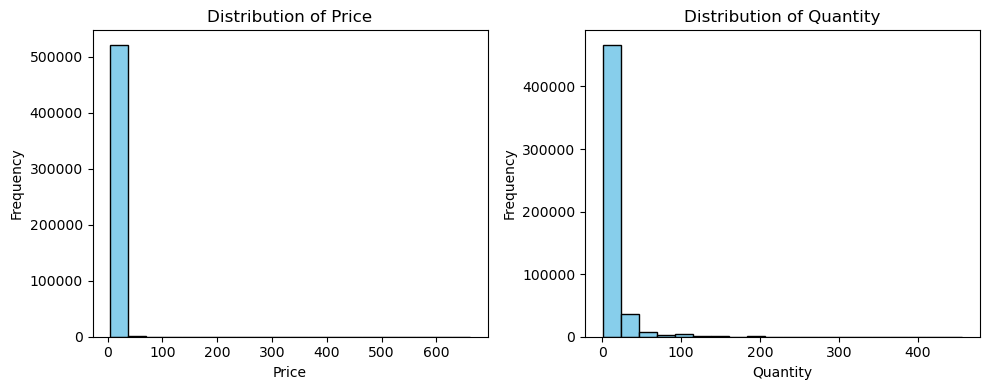

In [17]:
import math

# Pilih hanya kolom Price dan Quantity
numerical_cols = ['Price', 'Quantity']

# Hitung jumlah baris dan kolom grid
num_cols = 2  # karena hanya ada 2 kolom
num_rows = math.ceil(len(numerical_cols) / num_cols)

# Buat subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 4))
axes = axes.flatten()

# Loop untuk buat histogram
for i, col in enumerate(numerical_cols):
    axes[i].hist(df_sales[col].dropna(), bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {col}', fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Sembunyikan subplot kosong (kalau ada)
for i in range(len(numerical_cols), len(axes)):
    axes[i].set_visible(False)

# Atur layout dan tampilkan
plt.tight_layout()
plt.show()

### Kesimpulan:
 - Distribusi Harga (Price):

    - Sebagian besar produk memiliki harga yang sangat rendah.

    - Harga dengan nilai tinggi (lebih dari 100 atau 200) sangat jarang ditemukan.

     - Distribusi sangat right-skewed (condong ke kanan).

- Distribusi Kuantitas (Quantity):

    - Mayoritas transaksi dalam jumlah barang yang sedikit, sering kali kurang dari 50 unit.

    - Sama seperti harga, distribusi ini juga right-skewed, dengan sedikit transaksi berjumlah besar (outlier hingga 400+).

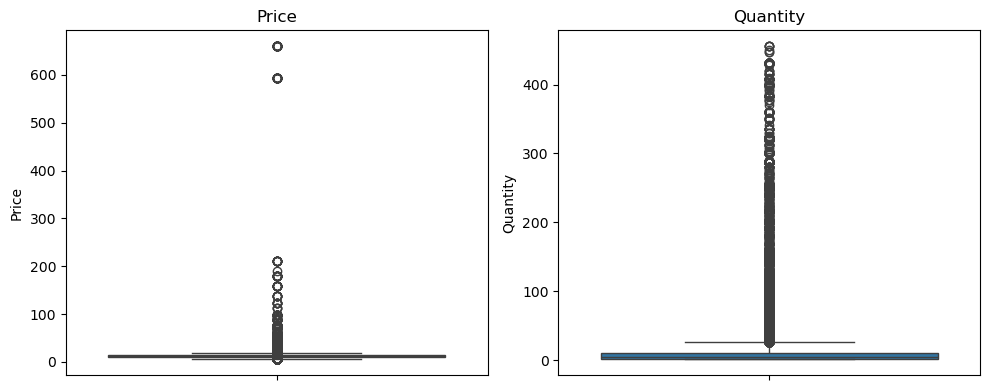

In [18]:
# Pilih hanya kolom Price dan Quantity
numerical_cols = ['Price', 'Quantity']

# Menentukan jumlah baris dan kolom untuk grid visualisasi
num_cols_grid = 2  # Jumlah kolom dalam grid
num_rows = math.ceil(len(numerical_cols) / num_cols_grid)  # Menghitung jumlah baris yang dibutuhkan dengan pembulatan ke atas

# Membuat figure dan axes untuk grid subplot
fig, axes = plt.subplots(num_rows, num_cols_grid, figsize=(10, 4 * num_rows))

# Mengubah array axes menjadi satu dimensi untuk mempermudah iterasi
axes = axes.flatten()

# Melakukan iterasi pada setiap kolom numerik untuk membuat box plot
for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df_sales[col], ax=axes[i])  # Membuat box plot pada subplot saat ini
    axes[i].set_title(col)  # Menetapkan judul pada subplot
    axes[i].set_ylabel(col)  # Menetapkan label sumbu y

# Menyembunyikan subplot yang tidak digunakan
for i in range(len(numerical_cols), len(axes)):
    axes[i].set_visible(False)

# Menyesuaikan tata letak agar tidak saling bertabrakan dan menampilkan plot
plt.tight_layout()
plt.show()

### Kesimpulan Boxplot:
- Price

    - Median harga produk berada cukup rendah.

    - Terdapat outlier di atas nilai 100, bahkan hingga di atas 600.

    - Sebagian besar data terkonsentrasi di rentang bawah (kuartil bawah dan tengah), mengindikasikan distribusi yang sangat tidak merata.

- Quantity:

    - Mayoritas transaksi memiliki jumlah produk yang sangat kecil, kemungkinan antara 1 hingga 10.

    - Terlihat banyak outlier dengan quantity yang sangat besar (hingga lebih dari 400), menunjukkan adanya transaksi tidak biasa atau bulk purchase.

    - Data sangat right-skewed, dan persebaran nilai umumnya rendah dengan ekor kanan yang panjang.



# Top Contributing products

Pada retail store, ada banyak jenis barang yang dijual.
Memahami karakteristik penjualan di setiap barang sangatlah penting.  
Barang-barang dengan minat tinggi dari customer menjadi kunci bisnis untuk meraih untung.
Barang-barang dengan minat rendah dari masyarakat akan menjadi beban dari usaha apabila bisnis menyetok terlalu banyak.

Salah satu metode segmentasi yang digunakan adalah menggunakan segmentasi berdasarkan :
- Volume transaksi : Berapa banyak transaksi yang melibatkan suatu produk (Tidak mempedulikan banyaknya barang dalam 1 transaksi)
- Revenue total : Berapa dolar revenue yang dihasilkan dari penjualan produk ini.

Buatlah segmentasi produk berdasarkan volume dan revenue total dengan aturan sebagai berikut :

1. total_revenue didefinisikan sebagai perkalian harga barang dengan banyaknya pembelian
2. 20% produk dengan volume transaksi transaksi tertinggi masuk kategori "Popular". 20 - 80% Masuk kategori "Normal" dan sisanya masuk ke kategori "Low"
3. 20% produk dengan total revenue tertinggi masuk kategori "Popular". 20 - 80% Masuk kategori "Normal" dan sisanya masuk ke kategori "Low"
4. Berdasarkan penggabungan segmentasi no.2 dan no.3, apabila suatu produk Popular dari segi volume transaksi dan total revenue, maka segmentasi final dari produk tersebut adalah "Super Popular". Apabila salah satu atribut populer sementara atribut lainnya normal, maka segmentasi finalnya adalah "Popular". Apabila kedua atributnya "Low", maka segmentasi finalnya adalah "Low". Semua kombinasi lain selain yang disebutkan masuk ke kategori "Normal"

## Pertanyaan
1. Barang tipe apa yang masuk ke kategori super populer pada bulan November 2019?
2. Apakah barang yang populer di November 2019 sama dengan barang yang populer di 
3. Apakah barang yang masuk kategori super populer di november sama dengan barang super populer di July ?

In [19]:
# Menghitung volume transaksi (jumlah transaksi per produk)
volume_transaksi = df_sales.groupby('ProductNo')['TransactionNo'].nunique().reset_index()
volume_transaksi.columns = ['ProductNo', 'TransactionVolume']

In [20]:
volume_transaksi = volume_transaksi.sort_values(by='TransactionVolume', ascending=False).reset_index(drop=True)

In [21]:
# Menampilkan hasil
volume_transaksi.head()

,ProductNo,TransactionVolume
0,85123A,2261
1,85099B,2089
2,22423,1989
3,47566,1687
4,20725,1567


In [22]:
# Menghitung total revenue
df_sales['TotalRevenue'] = df_sales['Price'] * df_sales['Quantity']
total_revenue = df_sales.groupby('ProductNo')['TotalRevenue'].sum().reset_index()

In [23]:
# Urutkan berdasarkan Total Revenue tertinggi
total_revenue = total_revenue.sort_values(by='TotalRevenue', ascending=False).reset_index(drop=True)

In [24]:
# Menampilkan hasil
total_revenue.head()

,ProductNo,TotalRevenue
0,85123A,380098.68
1,84879,360869.20
2,22197,355606.63
3,84077,318424.67
4,21212,307946.68


In [25]:
# Menggabungkan data volume dan revenue
produk_stats = volume_transaksi.merge(total_revenue, on='ProductNo')

In [26]:
# Fungsi untuk menentukan kategori berdasarkan persentil
def categorize_percentile(df_sales, column):
    # Menentukan nilai ambang batas persentil 20% dan 80% untuk kolom yang diberikan
    thresholds = df_sales[column].quantile([0.2, 0.8]).values
    
    # Mendefinisikan batas-batas (bins) dan label kategori untuk mengelompokkan nilai kolom berdasarkan persentil
    bins = [-float('inf'), thresholds[0], thresholds[1], float('inf')]
    labels = ['Low', 'Normal', 'Populer']
    return pd.cut(df_sales[column], bins=bins, labels=labels, include_lowest=True)
    
# Menambahkan kategori berdasarkan Volume Transaksi dan Total Revenue
# Kategori ditentukan untuk kolom 'TransactionVolume' dan hasilnya disimpan dalam kolom baru 'TransactionCategory'
produk_stats['TransactionCategory'] = categorize_percentile(produk_stats, 'TransactionVolume')

# Kategori ditentukan untuk kolom 'TotalRevenue' dan hasilnya disimpan dalam kolom baru 'RevenueCategory'
produk_stats['RevenueCategory'] = categorize_percentile(produk_stats, 'TotalRevenue')

In [27]:
# Fungsi untuk menentukan segmentasi final
def final_segmentation(row):
    if row['TransactionCategory'] == 'Populer' and row['RevenueCategory'] == 'Populer':
        return 'Super Populer'
    elif (row['TransactionCategory'] == 'Populer' and row['RevenueCategory'] == 'Normal') or \
         (row['TransactionCategory'] == 'Normal' and row['RevenueCategory'] == 'Populer'):
        return 'Populer'
    elif row['TransactionCategory'] == 'Low' and row['RevenueCategory'] == 'Low':
        return 'Low'
    else:
        return 'Normal'

# Tambahkan kolom Segmentasi Final ke DataFrame
produk_stats['FinalSegment'] = produk_stats.apply(final_segmentation, axis=1)

In [28]:
# Menggabungkan data
df_sales = df_sales.merge(produk_stats[['ProductNo', 'TransactionCategory', 'RevenueCategory', 'FinalSegment']], on='ProductNo', how='left')

In [29]:
# Menampilkan hasil
df_sales.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Year,Month,Day,YearMonth,TotalRevenue,TransactionCategory,RevenueCategory,FinalSegment
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,2019,12,Monday,2019-12,257.64,Normal,Normal,Normal
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,2019,12,Monday,2019-12,383.40,Populer,Populer,Super Populer
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,2019,12,Monday,2019-12,138.36,Normal,Normal,Normal
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,2019,12,Monday,2019-12,127.80,Normal,Normal,Normal
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,2019,12,Monday,2019-12,71.64,Normal,Normal,Normal


In [30]:
# Melihat beberapa baris pertama dari produk_stats
produk_stats.head()

,ProductNo,TransactionVolume,TotalRevenue,TransactionCategory,RevenueCategory,FinalSegment
0,85123A,2261,380098.68,Populer,Populer,Super Populer
1,85099B,2089,277340.47,Populer,Populer,Super Populer
2,22423,1989,306900.94,Populer,Populer,Super Populer
3,47566,1687,286412.55,Populer,Populer,Super Populer
4,20725,1567,118181.69,Populer,Populer,Super Populer


In [31]:
# Menghitung jumlah produk di setiap kategori segmentasi final
produk_stats['FinalSegment'].value_counts()

FinalSegment
Normal           2215
Low               632
Super Populer     588
Populer           316
Name: count, dtype: int64

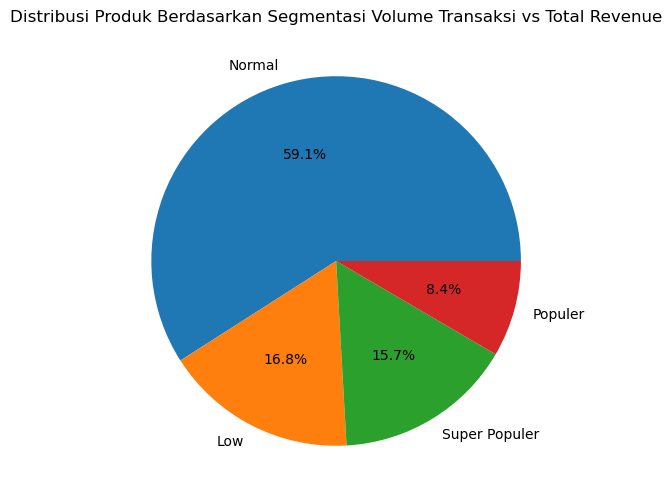

In [32]:
# Pie chart untuk distribusi segmentasi final
produk_stats['FinalSegment'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(7, 6))
plt.title('Distribusi Produk Berdasarkan Segmentasi Volume Transaksi vs Total Revenue')
plt.ylabel('')
plt.show()

In [33]:
# Membuat total_revenue_per_segment
total_revenue_per_segment_product = df_sales.groupby('FinalSegment')['TotalRevenue'].agg(['mean', 'std', 'median', 'min', 'max'])
total_revenue_per_segment_product

,mean,std,median,min,max
FinalSegment,,,,,
Low,32.860321,38.385519,18.46,5.46,462.96
Normal,79.710242,185.441614,32.70,5.13,6723.00
Populer,113.733164,258.761112,40.90,5.97,5976.00
Super Populer,122.952352,270.968096,56.36,5.13,7142.40


In [34]:
# Menghitung rata-rata volume transaksi berdasarkan segmentasi final
total_transaction_volume_per_segment_product = produk_stats.groupby('FinalSegment')['TransactionVolume'].agg(['mean', 'std', 'median', 'min', 'max'])
total_transaction_volume_per_segment_product

,mean,std,median,min,max
FinalSegment,,,,,
Low,4.689873,3.242256,4.0,1,12
Normal,73.590068,53.402884,61.0,1,214
Populer,211.737342,82.357664,213.5,26,871
Super Populer,482.066327,274.325043,397.0,215,2261


In [35]:
df_sales['FinalSegment'].value_counts()

FinalSegment
Super Populer    286719
Normal           164700
Populer           67673
Low                2988
Name: count, dtype: int64

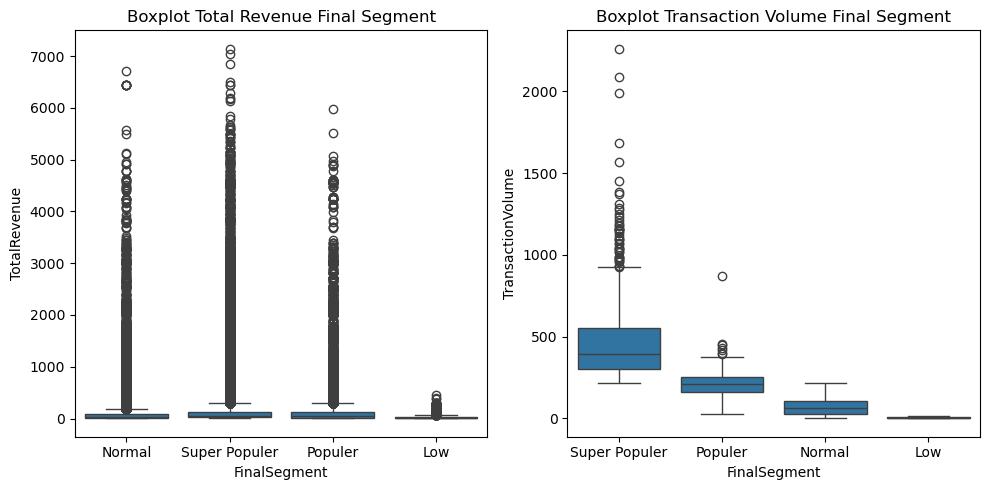

In [36]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='FinalSegment', y='TotalRevenue', data=df_sales)
plt.title('Boxplot Total Revenue Final Segment')

plt.subplot(1, 2, 2)
sns.boxplot(data=produk_stats, x='FinalSegment', y='TransactionVolume')
plt.title('Boxplot Transaction Volume Final Segment')
plt.tight_layout()
plt.show()

In [37]:
# Hitung total revenue per segmen pelanggan
segment_revenue_product = df_sales.groupby('FinalSegment')['TotalRevenue'].sum().reset_index()

# Urutkan dari yang paling profitable
segment_revenue_product = segment_revenue_product.sort_values(by='TotalRevenue', ascending=False)

In [38]:
segment_revenue_product

,FinalSegment,TotalRevenue
3,Super Populer,35252775.55
1,Normal,13128276.80
2,Populer,7696664.39
0,Low,98186.64


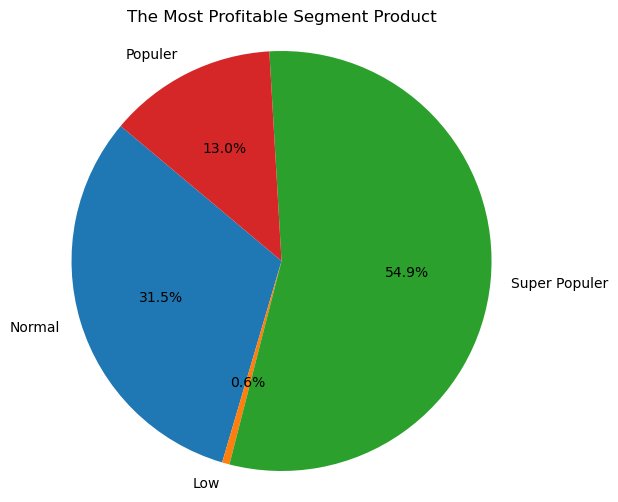

In [39]:
# hasil value_counts segmen:
segment_product_counts = df_sales['FinalSegment'].value_counts().reindex(['Normal', 'Low', 'Super Populer', 'Populer'])

# Definisikan warna sesuai urutan segmen
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Biru, Oranye, Hijau, Merah (kode default matplotlib)

# Plot pie chart
plt.figure(figsize=(7,6))
segment_product_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=colors,
    startangle=140
)
plt.title('The Most Profitable Segment Product')
plt.ylabel('')
plt.axis('equal')
plt.show()

In [40]:
# Filter data untuk segmen 'Super Populer'
super_populer = df_sales[df_sales['FinalSegment'] == 'Super Populer']

# Hitung total penjualan per produk dalam segmen ini (bisa berdasarkan Quantity atau TotalRevenue)
top_products = (super_populer.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head())  

In [41]:
# Tampilkan hasil
top_products

ProductName
Jumbo Bag Red Retrospot               45175
Popcorn Holder                        34143
Assorted Colour Bird Ornament         31346
World War 2 Gliders Asstd Designs     31047
Cream Hanging Heart T-Light Holder    29975
Name: Quantity, dtype: int64

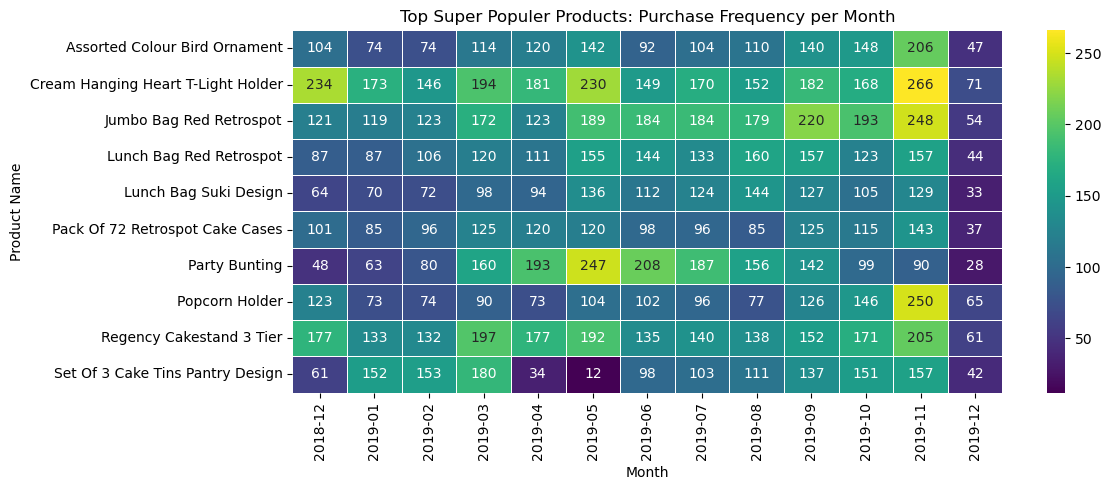

In [42]:
# Melihat produk teratas berdasarkan total produk super populer
super_populer = df_sales[df_sales['FinalSegment'] == 'Super Populer']
produk_super_populer = super_populer['ProductName'].value_counts().head(10).index

# Filter data untuk produk super populer teratas
super_populer_top = super_populer[super_populer['ProductName'].isin(produk_super_populer)]

# Hitung ulang dan buat heatmap
product_super_populer_month_freq_top = super_populer_top.groupby(['ProductName', 'YearMonth']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 5))  # Perbesar ukuran figure untuk lebih banyak produk
sns.heatmap(product_super_populer_month_freq_top, cmap="viridis", linewidths=.5, annot=True, fmt='d')
plt.title("Top Super Populer Products: Purchase Frequency per Month")
plt.xlabel("Month")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()

In [43]:
product_super_populer_month_freq_top

YearMonth,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
ProductName,,,,,,,,,,,,,
Assorted Colour Bird Ornament,104,74,74,114,120,142,92,104,110,140,148,206,47
Cream Hanging Heart T-Light Holder,234,173,146,194,181,230,149,170,152,182,168,266,71
Jumbo Bag Red Retrospot,121,119,123,172,123,189,184,184,179,220,193,248,54
Lunch Bag Red Retrospot,87,87,106,120,111,155,144,133,160,157,123,157,44
Lunch Bag Suki Design,64,70,72,98,94,136,112,124,144,127,105,129,33
Pack Of 72 Retrospot Cake Cases,101,85,96,125,120,120,98,96,85,125,115,143,37
Party Bunting,48,63,80,160,193,247,208,187,156,142,99,90,28
Popcorn Holder,123,73,74,90,73,104,102,96,77,126,146,250,65
Regency Cakestand 3 Tier,177,133,132,197,177,192,135,140,138,152,171,205,61


In [44]:
# Tanggal transaksi terakhir
tanggal_terakhir = df_sales['Date'].max()

print("Tanggal transaksi terakhir:", tanggal_terakhir)


Tanggal transaksi terakhir: 2019-12-09 00:00:00


## Kesimpulan Analisis Segmentasi dan Produk Super Populer

Berdasarkan analisis segmentasi produk dan visualisasi performa produk super populer:

- **Distribusi Segmen Produk**:
  - Normal: 59,1%
  - Low: 16,8%
  - Super Populer: 15,7%
  - Populer: 8,4%

- **Performa Pendapatan**:
  - Segmen **Super Populer** menghasilkan pendapatan rata-rata tertinggi (**mean: 122.9**) dan maksimum hingga **7142.4**.

- **Distribusi Keuntungan Berdasarkan Segmentasi**:
  - Segmen Super Populer menyumbang **54,9%** dari pendapatan tertinggi,
  - Disusul oleh segmen Normal (**31,5%**), Populer (**13%**), dan Low (**0,6%**).

- **Top Produk Super Populer**:
  - Produk terlaris: *Cream Hanging Heart T-Light Holder*.
  - Tren musiman: lonjakan pembelian di bulan ke-10 dan ke-11
  - Konsisten sepanjang tahun: *Regency Cakestand 3 Tier* dan *Jumbo Bag Red Retrospot*
  - Penurunan tajam: *Set Of 3 Cake Tins Pantry Design* di bulan ke-4 dan ke-5

---


In [45]:
# Filter data untuk November 2019
november_2019 = df_sales[(df_sales['Month'] == 11) & (df_sales['Year'] == 2019)]

# Ambil daftar produk yang masuk kategori "Super Populer"
super_populer_nov = november_2019[november_2019['FinalSegment'] == 'Super Populer']

In [46]:
# Pilih kolom yang ingin ditampilkan dalam tabel
super_populer_nov.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Year,Month,Day,YearMonth,TotalRevenue,TransactionCategory,RevenueCategory,FinalSegment
24792,579522,2019-11-30,84879,Assorted Colour Bird Ornament,6.04,8,14432.0,United Kingdom,2019,11,Saturday,2019-11,48.32,Populer,Populer,Super Populer
24793,579522,2019-11-30,82486,3 Drawer Antique White Wood Cabinet,6.04,4,14432.0,United Kingdom,2019,11,Saturday,2019-11,24.16,Populer,Populer,Super Populer
24794,579522,2019-11-30,82483,Wood 2 Drawer Cabinet White Finish,6.04,8,14432.0,United Kingdom,2019,11,Saturday,2019-11,48.32,Populer,Populer,Super Populer
24795,579522,2019-11-30,23493,Vintage Doily Travel Sewing Kit,6.04,10,14432.0,United Kingdom,2019,11,Saturday,2019-11,60.40,Populer,Populer,Super Populer
24796,579522,2019-11-30,23240,Set Of 4 Knick Knack Tins Doily,6.19,6,14432.0,United Kingdom,2019,11,Saturday,2019-11,37.14,Populer,Populer,Super Populer


C:\Users\W10\AppData\Local\Temp\ipykernel_13476\2108978912.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_super_populer.values, y=top_super_populer.index, palette=['limegreen'] * len(top_super_populer))


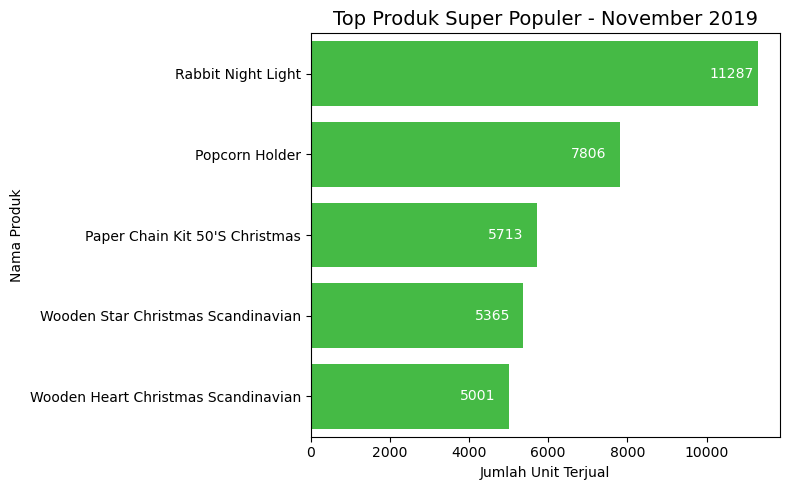

In [47]:
# Hitung total quantity per produk
top_super_populer = super_populer_nov.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head()

# Buat bar chart
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=top_super_populer.values, y=top_super_populer.index, palette=['limegreen'] * len(top_super_populer))
# Tambahkan angka di setiap batang 
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', fontsize=10, color='white', label_type='edge', padding=-35)
plt.title('Top Produk Super Populer - November 2019', fontsize=14)
plt.xlabel('Jumlah Unit Terjual')
plt.ylabel('Nama Produk')
plt.tight_layout()
plt.show()

- Produk **Rabbit Night Light** dan **Popcorn Holder** menjadi kontributor utama pendapatan segmen Super Populer pada November 2019, menunjukkan potensi besar untuk diprioritaskan dalam promosi musiman dan manajemen stok.

In [48]:
# Filter data untuk November 2019 dan July 2019
november_populer_2019 = df_sales[(df_sales['Year'] == 2019) & (df_sales['Month'] == 11) & (df_sales['FinalSegment'] == 'Populer')]
july_populer_2019 = df_sales[(df_sales['Year'] == 2019) & (df_sales['Month'] == 7) & (df_sales['FinalSegment'] == 'Populer')]

In [49]:
july_populer_2019.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Year,Month,Day,YearMonth,TotalRevenue,TransactionCategory,RevenueCategory,FinalSegment
247412,561897,2019-07-31,22424,Enamel Bread Bin Cream,23.32,2,17841.0,United Kingdom,2019,7,Wednesday,2019-07,46.64,Populer,Normal,Populer
247417,561861,2019-07-31,21533,Retrospot Large Milk Jug,14.61,12,16839.0,United Kingdom,2019,7,Wednesday,2019-07,175.32,Populer,Normal,Populer
247431,561862,2019-07-31,21381,Mini Wooden Happy Birthday Garland,11.98,2,15569.0,United Kingdom,2019,7,Wednesday,2019-07,23.96,Populer,Normal,Populer
247444,561863,2019-07-31,21495,Skulls And Crossbones Wrap,10.68,25,17695.0,United Kingdom,2019,7,Wednesday,2019-07,267.00,Normal,Populer,Populer
247447,561863,2019-07-31,20978,36 Pencils Tube Skulls,11.53,16,17695.0,United Kingdom,2019,7,Wednesday,2019-07,184.48,Populer,Normal,Populer


In [50]:
november_populer_2019.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Year,Month,Day,YearMonth,TotalRevenue,TransactionCategory,RevenueCategory,FinalSegment
24804,579522,2019-11-30,21650,Assorted Tutti Frutti Bracelet,7.24,24,14432.0,United Kingdom,2019,11,Saturday,2019-11,173.76,Normal,Populer,Populer
24806,579522,2019-11-30,22795,Sweetheart Recipe Book Stand,7.24,2,14432.0,United Kingdom,2019,11,Saturday,2019-11,14.48,Populer,Normal,Populer
24809,579523,2019-11-30,22110,Bird House Hot Water Bottle,6.39,36,15903.0,United Kingdom,2019,11,Saturday,2019-11,230.04,Populer,Normal,Populer
24826,579524,2019-11-30,23119,Pack Of 6 Large Fruit Straws,6.19,12,16295.0,United Kingdom,2019,11,Saturday,2019-11,74.28,Normal,Populer,Populer
24837,579525,2019-11-30,23196,Vintage Leaf Magnetic Notepad,6.19,36,15113.0,United Kingdom,2019,11,Saturday,2019-11,222.84,Populer,Normal,Populer


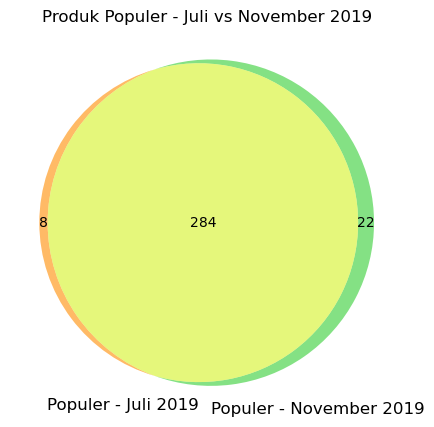

In [51]:
from matplotlib_venn import venn2
# Ambil set nama produk dari masing-masing bulan
november_products = set(november_populer_2019['ProductName'].unique())
july_products = set(july_populer_2019['ProductName'].unique())

# Buat diagram venn
plt.figure(figsize=(8, 5))
venn2([july_products, november_products],
      set_labels=('Populer - Juli 2019', 'Populer - November 2019'),
      set_colors=('darkorange', 'limegreen'),
      alpha=0.6)

plt.title('Produk Populer - Juli vs November 2019')
plt.show()

In [52]:
# Filter data untuk November 2019 dan July 2019
november_super_populer_2019 = df_sales[(df_sales['Year'] == 2019) & (df_sales['Month'] == 11) & (df_sales['FinalSegment'] == 'Super Populer')]
july_super_populer_2019 = df_sales[(df_sales['Year'] == 2019) & (df_sales['Month'] == 7) & (df_sales['FinalSegment'] == 'Super Populer')]

In [53]:
# Tampilkan data
july_super_populer_2019.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Year,Month,Day,YearMonth,TotalRevenue,TransactionCategory,RevenueCategory,FinalSegment
247404,561870,2019-07-31,22423,Regency Cakestand 3 Tier,23.32,1,14911.0,EIRE,2019,7,Wednesday,2019-07,23.32,Populer,Populer,Super Populer
247405,561878,2019-07-31,85066,Cream Sweetheart Mini Chest,23.32,1,17388.0,United Kingdom,2019,7,Wednesday,2019-07,23.32,Populer,Populer,Super Populer
247409,561893,2019-07-31,85066,Cream Sweetheart Mini Chest,23.32,1,12942.0,United Kingdom,2019,7,Wednesday,2019-07,23.32,Populer,Populer,Super Populer
247410,561894,2019-07-31,22423,Regency Cakestand 3 Tier,23.32,1,14456.0,United Kingdom,2019,7,Wednesday,2019-07,23.32,Populer,Populer,Super Populer
247415,561882,2019-07-31,22622,Box Of Vintage Alphabet Blocks,22.50,2,13388.0,United Kingdom,2019,7,Wednesday,2019-07,45.00,Populer,Populer,Super Populer


In [54]:
# Tampilkan data
november_super_populer_2019.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Year,Month,Day,YearMonth,TotalRevenue,TransactionCategory,RevenueCategory,FinalSegment
24792,579522,2019-11-30,84879,Assorted Colour Bird Ornament,6.04,8,14432.0,United Kingdom,2019,11,Saturday,2019-11,48.32,Populer,Populer,Super Populer
24793,579522,2019-11-30,82486,3 Drawer Antique White Wood Cabinet,6.04,4,14432.0,United Kingdom,2019,11,Saturday,2019-11,24.16,Populer,Populer,Super Populer
24794,579522,2019-11-30,82483,Wood 2 Drawer Cabinet White Finish,6.04,8,14432.0,United Kingdom,2019,11,Saturday,2019-11,48.32,Populer,Populer,Super Populer
24795,579522,2019-11-30,23493,Vintage Doily Travel Sewing Kit,6.04,10,14432.0,United Kingdom,2019,11,Saturday,2019-11,60.40,Populer,Populer,Super Populer
24796,579522,2019-11-30,23240,Set Of 4 Knick Knack Tins Doily,6.19,6,14432.0,United Kingdom,2019,11,Saturday,2019-11,37.14,Populer,Populer,Super Populer


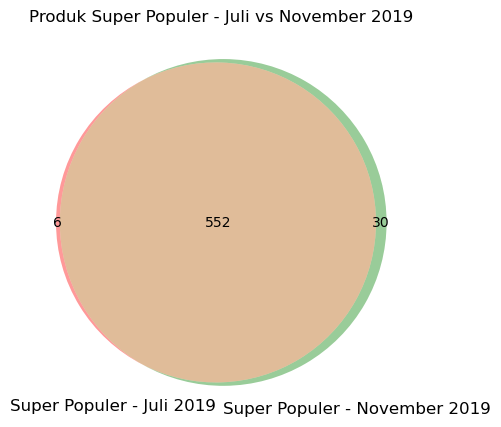

In [55]:
from matplotlib_venn import venn2
# Ambil set produk Super Populer di bulan Juli dan November 2019
produk_juli = set(july_super_populer_2019['ProductName'])  # atau bisa juga 'ProductNo'
produk_november = set(november_super_populer_2019['ProductName'])

# Buat diagram venn
plt.figure(figsize=(8,5))
venn2([produk_juli, produk_november],
      set_labels=('Super Populer - Juli 2019', 'Super Populer - November 2019'))
plt.title('Produk Super Populer - Juli vs November 2019')
plt.show()

In [56]:
super_populer = df_sales[df_sales['FinalSegment'] == 'Super Populer']
produk_super_populer = super_populer['ProductName'].value_counts().head(10)
produk_super_populer

ProductName
Cream Hanging Heart T-Light Holder    2316
Jumbo Bag Red Retrospot               2109
Regency Cakestand 3 Tier              2010
Party Bunting                         1701
Lunch Bag Red Retrospot               1584
Assorted Colour Bird Ornament         1475
Popcorn Holder                        1399
Set Of 3 Cake Tins Pantry Design      1391
Pack Of 72 Retrospot Cake Cases       1346
Lunch Bag Suki Design                 1308
Name: count, dtype: int64

## Kesimpulan Perbandingan Produk Populer & Super Populer (Juli vs November 2019)
- Analisis perbandingan menunjukkan bahwa mayoritas produk populer dan super populer tetap konsisten antara bulan Juli dan November 2019.

    - Sebanyak 284 produk tetap berada dalam kategori Populer di kedua bulan, menunjukkan stabilitas minat pelanggan terhadap produk-produk tersebut.

    - Terdapat sedikit pergeseran, yaitu 8 produk hanya populer di Juli dan 22 produk hanya populer di November, menandakan adanya tren musiman atau perubahan minat di akhir tahun.

- Untuk kategori Super Populer, terjadi peningkatan signifikan:

    - Jumlah produk super populer naik dari 552 di Juli menjadi 582 di November (penambahan 30 produk).

    - Sebanyak 552 produk tetap konsisten sebagai super populer.

    - 6 produk hanya super populer di Juli, sementara 30 produk baru naik menjadi super populer di November.

### Insight :
- Peningkatan jumlah produk super populer di bulan November kemungkinan besar disebabkan oleh:

    - Musim belanja akhir tahun (holiday season)

    - Efektivitas promosi atau campaign musiman

    - Pergeseran minat konsumen menjelang liburan


# Retention Cohort Analysis

Analisis kohort adalah metode analisis yang digunakan untuk mempelajari perilaku konsumen atau pengguna dari kelompok yang sama dalam periode waktu tertentu.   
Contoh Kohort : Kohort kustomer yang bergabung pada bulan mei

Analisis retensi adalah analisis untuk melihat seberapa besar persentase pengguna atau pelanggan yang kembali menggunakan produk atau layanan dalam periode waktu tertentu.

Dengan menganalisis kohort dan retensi, perusahaan atau organisasi dapat mengidentifikasi tren dan pola dalam perilaku pengguna atau pelanggan.

Berikut cuplikan matriks retensi yang akan kalian hasilkan pada bagian ini : 

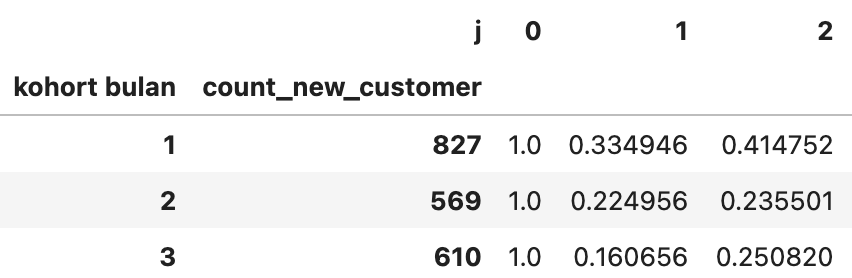

Cara baca :  
Pada bulan januari, ada 827 customer baru.  
33% dari 827 customer melakukan transaksi 1 bulan kemudian.  
41.4% dari 827 customer melakukan transasksi 2 bulan kemduain.  

Hal ini menunjukkan bahwa sekitar sepertiga customer yang melanjutkan transaksi setelah mendaftar pada bulan januari.  

Sedangkan pada kohort bulan februari, ada 569 customer baru dan hanya 22% customer yang kembali bertransaksi sebulan setelahnya  

Buatlah matriks kohort retensi per bulan menggunakan data dari 1 januari 2019 hingga 30 november 2019
Petunjuk : 
1. Hitung tanggal berapa transaksi pertama customer. Disini kita menggunakna asumsi bahwa transaksi pertama pada tahun 2019 adalah transaksi pertama customer.
2. Lakukan iterasi untuk setiap bulan. Ambil berapa banyak customer yang mendaftar dan berapa banyak customer yang sama yang melakukan transaksi di bulan bulan berikutnya.

## Pertanyaan
1. Bagaimana karakteristik pertumbuhan customer baru? Apakah pertumbuhan terus meningkat atau melambat?

2. Setiap bulannya tim marketing menggunakan metode promosi campaign yang berbeda-beda. Bulan mana yang menghasilkan retention paling tinggi?

1. Bagaimana karakteristik pertumbuhan customer baru? Apakah pertumbuhan terus meningkat atau melambat?

In [57]:
# Buat kolom 'cohort_month' berdasarkan transaksi pertama untuk setiap customer
df_sales['cohort_month'] = df_sales.groupby('CustomerNo')['Date'].transform('min')
df_sales['cohort_month'] = df_sales['cohort_month'].dt.to_period('M')  # Mengubah menjadi periode bulanan

# Buat kolom 'transaction_month' berdasarkan bulan transaksi pelanggan
df_sales['transaction_month'] = df_sales['Date'].dt.to_period('M')

# Hitung cohort index (jarak waktu antara transaksi dengan cohort pertama)
def get_cohort_index(df_sales):
    year_diff = df_sales['transaction_month'].dt.year - df_sales['cohort_month'].dt.year
    month_diff = df_sales['transaction_month'].dt.month - df_sales['cohort_month'].dt.month
    return year_diff * 12 + month_diff

# Tambahkan kolom baru 'cohort_index' ke DataFrame df
df_sales['cohort_index'] = get_cohort_index(df_sales)

# Filter data hanya untuk transaksi tahun 2019, dari Januari hingga November untuk analisis cohort matrix
df_cohort = df_sales[(df_sales['Date'].dt.year == 2019) & (df_sales['Date'].dt.month <= 11)]

# Membuat cohort matrix untuk retensi pelanggan
cohort_data = df_cohort.groupby(['cohort_month', 'cohort_index'])['CustomerNo'].nunique().unstack()

# Normalisasi cohort matrix (dibagi dengan jumlah customer bulan pertama)
cohort_size = cohort_data.iloc[:, 0]  # Jumlah pelanggan baru per bulan
retention_matrix = cohort_data.divide(cohort_size, axis=0).round(4)  # Pembulatan 4 desimal

# Tambahkan jumlah pelanggan baru sebagai kolom tambahan
retention_matrix.insert(0, 'count_new_customer', cohort_size)

# Format angka agar lebih mudah dibaca
retention_matrix = retention_matrix.fillna('').applymap(lambda x: f"{x:.4f}" if isinstance(x, float) else x)

C:\Users\W10\AppData\Local\Temp\ipykernel_13476\2469452132.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  retention_matrix = retention_matrix.fillna('').applymap(lambda x: f"{x:.4f}" if isinstance(x, float) else x)


In [58]:
retention_matrix

cohort_index,count_new_customer,0,1,2,3,4,5,6,7,8,9,10,11
cohort_month,,,,,,,,,,,,,
2018-12,,,,,,,,,,,,,
2019-01,482.0000,1.0000,0.2054,0.2656,0.2282,0.3029,0.2801,0.2324,0.2365,0.2884,0.3195,0.3444,
2019-02,436.0000,1.0000,0.1904,0.1835,0.2592,0.2615,0.2202,0.2408,0.2661,0.2339,0.3005,,
2019-03,504.0000,1.0000,0.1409,0.2262,0.1885,0.2321,0.1627,0.2560,0.2321,0.2817,,,
2019-04,321.0000,1.0000,0.2056,0.1869,0.1963,0.1931,0.2305,0.2150,0.2586,,,,
2019-05,330.0000,1.0000,0.1909,0.1879,0.1697,0.2030,0.2212,0.2545,,,,,
2019-06,274.0000,1.0000,0.1752,0.1496,0.2190,0.2190,0.2847,,,,,,
2019-07,213.0000,1.0000,0.1455,0.1737,0.2019,0.2911,,,,,,,
2019-08,173.0000,1.0000,0.1850,0.2370,0.2254,,,,,,,,


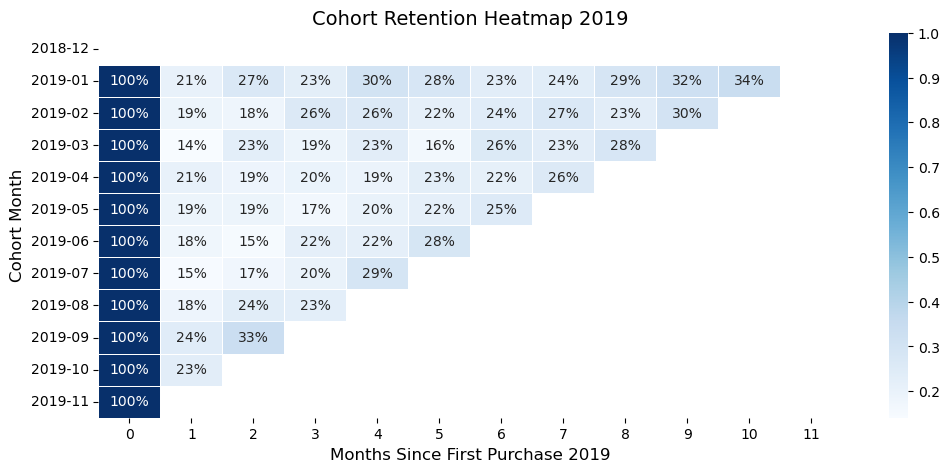

In [59]:
# Visualisasi Retention Heatmap
# Konversi retention_matrix ke tipe numerik agar bisa divisualisasikan
retention_matrix_numeric = retention_matrix.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
plt.figure(figsize=(12, 5))
sns.heatmap(retention_matrix_numeric, annot=True, fmt=".0%", cmap="Blues", linewidths=0.5)
plt.title("Cohort Retention Heatmap 2019", fontsize=14)
plt.xlabel("Months Since First Purchase 2019", fontsize=12)
plt.ylabel("Cohort Month", fontsize=12)
plt.show()

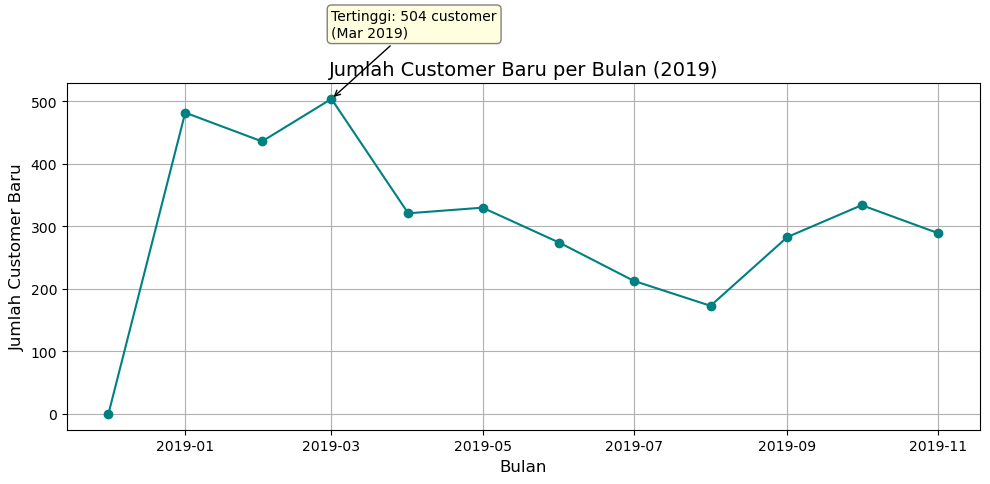

In [60]:
# Ambil data jumlah pelanggan baru per cohort_month dari retention_matrix_2019
customer_counts = retention_matrix['count_new_customer'].replace('', 0).astype(float)

# Konversi index menjadi datetime untuk plotting yang rapi
customer_counts.index = customer_counts.index.to_timestamp()

# Buat Line Chart
plt.figure(figsize=(10, 5))
plt.plot(customer_counts.index, customer_counts.values, marker='o', linestyle='-', color='teal')
plt.title('Jumlah Customer Baru per Bulan (2019)', fontsize=14)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Jumlah Customer Baru', fontsize=12)
plt.grid(True)

# Tambahkan callout (highlight) pada bulan dengan jumlah customer tertinggi
max_month = customer_counts.idxmax()
max_value = customer_counts.max()

plt.annotate(
    f'Tertinggi: {int(max_value)} customer\n({max_month.strftime("%b %Y")})',
    xy=(max_month, max_value),
    xytext=(max_month, max_value + 100),  # posisi teks
    arrowprops=dict(facecolor='black', arrowstyle='->'),
    bbox=dict(boxstyle="round,pad=0.3", edgecolor='gray', facecolor='lightyellow'),
    fontsize=10
)

plt.tight_layout()
plt.show()

- Pertumbuhan pelanggan baru telah melambat secara bertahap, jumlah pelanggan baru tertinggi di bulan Maret, dan bulan Juli dan Agustus memiliki jumlah pelanggan baru yang paling rendah.

2. Setiap bulannya tim marketing menggunakan metode promosi campaign yang berbeda-beda. Bulan mana yang menghasilkan retention paling tinggi?

C:\Users\W10\AppData\Local\Temp\ipykernel_13476\2536656834.py:2: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  if pd.api.types.is_period_dtype(df_sales['transaction_month']):


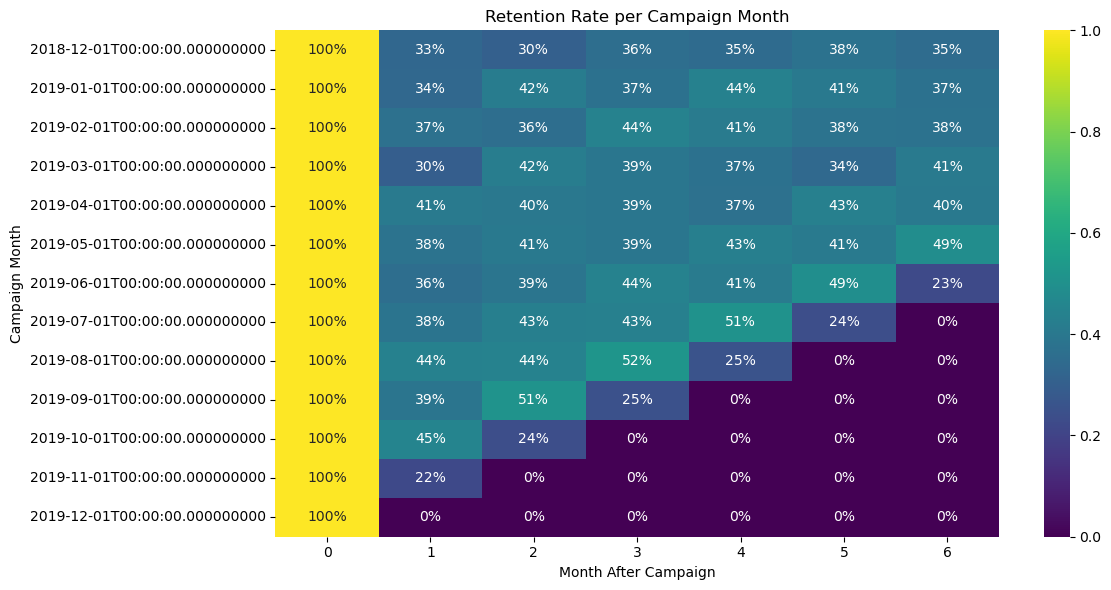

In [61]:
# --- Pastikan kolom transaction_month dalam datetime (bukan Period) ---
if pd.api.types.is_period_dtype(df_sales['transaction_month']):
    df_sales['transaction_month'] = df_sales['transaction_month'].dt.to_timestamp()
else:
    df_sales['transaction_month'] = pd.to_datetime(df_sales['transaction_month'])

# --- Ambil kombinasi unik CustomerNo dan transaction_month ---
df_campaign = df_sales[['CustomerNo', 'transaction_month']].drop_duplicates()

# --- Hitung retention ---
retention = []
months = sorted(df_campaign['transaction_month'].unique())

for month in months:
    cohort_users = df_campaign[df_campaign['transaction_month'] == month]['CustomerNo'].unique()
    
    for offset in range(0, 7):
        future_month = month + pd.DateOffset(months=offset)
        retained = df_campaign[
            (df_campaign['transaction_month'] == future_month) &
            (df_campaign['CustomerNo'].isin(cohort_users))
        ]['CustomerNo'].nunique()
        
        retention.append({
            'campaign_month': month,
            'month_offset': offset,
            'retained_users': retained,
            'original_users': len(cohort_users)
        })

# --- Buat retention DataFrame & visualisasi ---
retention_df = pd.DataFrame(retention)
retention_df['retention_rate'] = retention_df['retained_users'] / retention_df['original_users']
retention_pivot = retention_df.pivot(index='campaign_month', columns='month_offset', values='retention_rate')

plt.figure(figsize=(12, 6))
sns.heatmap(retention_pivot, annot=True, fmt=".0%", cmap="viridis")
plt.title("Retention Rate per Campaign Month")
plt.xlabel("Month After Campaign")
plt.ylabel("Campaign Month")
plt.tight_layout()
plt.show()

##  Analisis Retention Rate per Campaign Month

- Rangkuman Analisis Retention Rate Kampanye Marketing

    - Retention Rate Tertinggi: 52% (Agustus 2019, bulan ke-3)
    - Retention Rate Jangka Panjang Terbaik: 49% (Mei 2019, bulan ke-6)
      
      
- Kampanye dengan Performa Terbaik:

    - Agustus 2019 (untuk hasil cepat)
    - Mei 2019 (untuk loyalitas jangka panjang)

## Rekomendasi: 
Aplikasikan metode promosi yang digunakan pada kampanye Mei dan Agustus 2019 untuk pengembangan strategi marketing selanjutnya.

# Time Series Analysis

Time series analysis adalah analisis untuk melihat trend suatu fenomena berdasarkan waktu.

## Pertanyaan 

Pertanyaan 1 :  
Coba totalkan penjualan setiap barang per hari.   
Bagaimana trend penjualan? Apakah ada mengalami kenaikan, penurunan, atau stagnant.

Pertanyaan 2 :  
Lakukan analisis seasonality dengan melihat total order per harinya dari Senin hingga Minggu.  


Pertanyaan 1 :  
Coba totalkan penjualan setiap barang per hari.   
Bagaimana trend penjualan? Apakah ada mengalami kenaikan, penurunan, atau stagnant.


In [62]:
# Group data by day and calculate total order value
daily_sales = df_sales.groupby('Date').agg(total_sales=('TotalRevenue', 'sum')).reset_index()
daily_sales

,Date,total_sales
0,2018-12-01,312672.35
1,2018-12-02,294566.66
2,2018-12-03,190874.71
3,2018-12-05,187585.05
4,2018-12-06,259695.96
...,...,...
300,2019-12-05,277305.37
301,2019-12-06,197034.90
302,2019-12-07,208271.04
303,2019-12-08,195544.74


Trend penjualan: naik
Slope (kemiringan garis): 306.56
Koefisien determinasi (R-squared): 0.1464
P-value: 0.0000


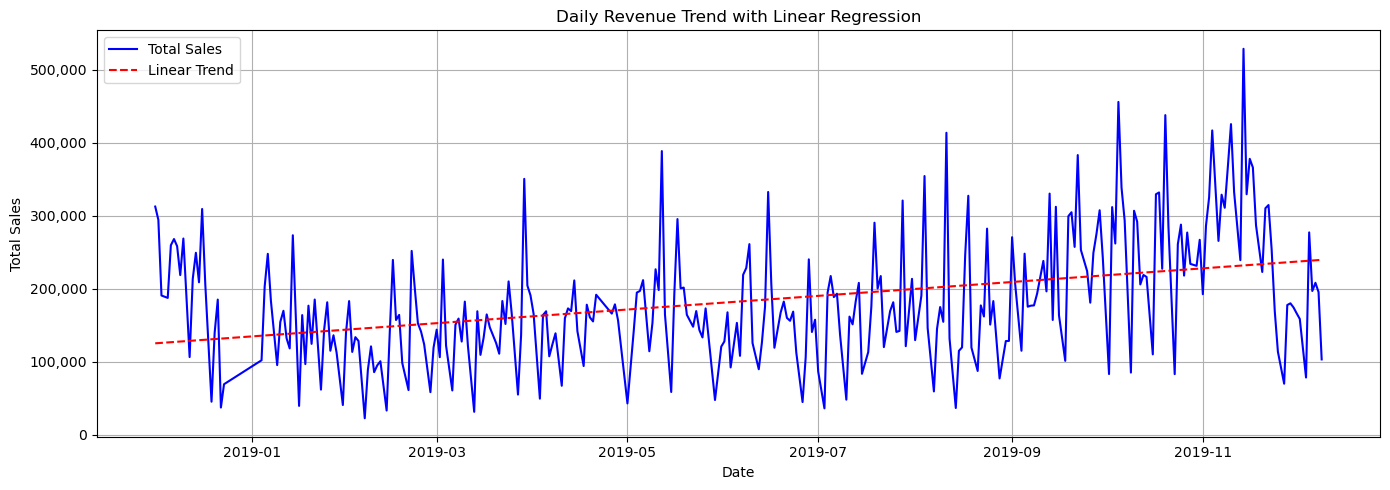

In [63]:
from scipy.stats import linregress
import matplotlib.ticker as mticker

# Ubah tanggal menjadi angka ordinal untuk regresi linear
time_numeric = daily_sales['Date'].map(pd.Timestamp.toordinal)

# Ambil total penjualan harian sebagai variabel y
sales_values = daily_sales['total_sales']

# Hitung regresi linear
slope, intercept, r_value, p_value, std_err = linregress(time_numeric, sales_values)

# Tentukan tren berdasarkan slope
if slope > 0:
    trend = "naik"
elif slope < 0:
    trend = "turun"
else:
    trend = "stagnan"

print(f"Trend penjualan: {trend}")
print(f"Slope (kemiringan garis): {slope:.2f}")
print(f"Koefisien determinasi (R-squared): {r_value**2:.4f}")
print(f"P-value: {p_value:.4f}")

# Visualisasi data dan garis regresi linear
plt.figure(figsize=(14, 5))
plt.plot(daily_sales['Date'], sales_values, label='Total Sales', color='blue')

# Buat nilai prediksi garis regresi linear
predicted_sales = intercept + slope * time_numeric

# Plot garis regresi linear
plt.plot(daily_sales['Date'], predicted_sales, color='red', linestyle='--', label='Linear Trend')

plt.title('Daily Revenue Trend with Linear Regression')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid()
plt.legend()
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.tight_layout()
plt.show()

### Karena grafik cukup fluaktatif saya gunakan rata-rata bergerak 7 hari

Trend penjualan mingguan: naik
Slope (kemiringan garis): 1926.19
Koefisien determinasi (R-squared): 0.2747
P-value: 0.0000


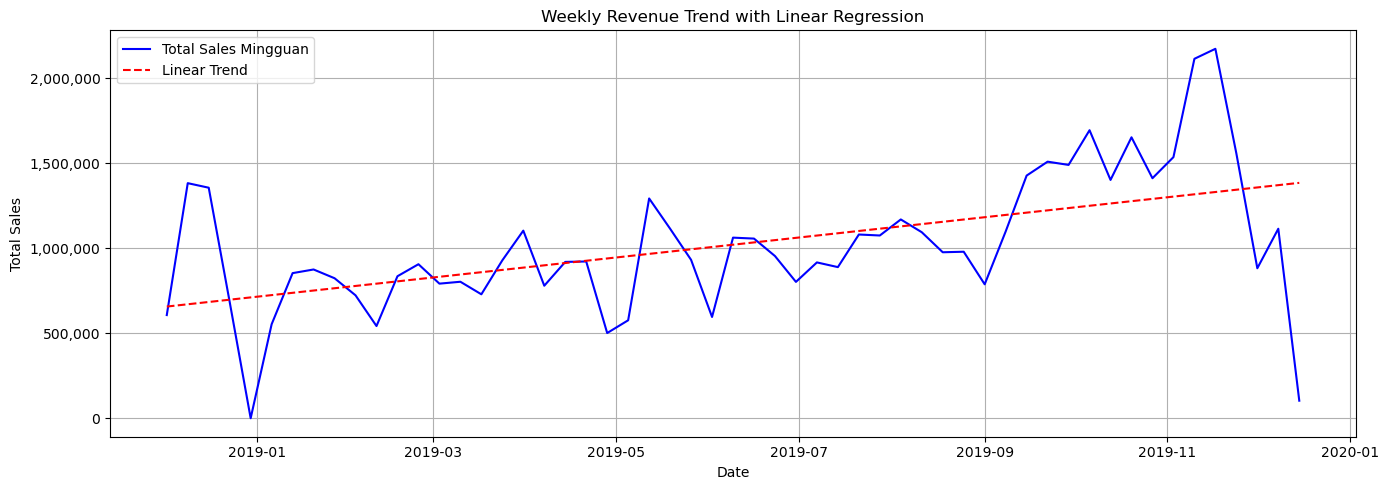

In [64]:
# Set kolom tanggal sebagai index untuk resampling
daily_sales.set_index('Date', inplace=True)

# Downsample data harian menjadi mingguan (total penjualan per minggu)
weekly_sales = daily_sales['total_sales'].resample('W').sum().reset_index()

# Ubah tanggal menjadi angka ordinal untuk regresi linear
time_numeric = weekly_sales['Date'].map(pd.Timestamp.toordinal)

# Ambil total penjualan mingguan sebagai variabel y
sales_values = weekly_sales['total_sales']

# Hitung regresi linear
slope, intercept, r_value, p_value, std_err = linregress(time_numeric, sales_values)

# Tentukan tren berdasarkan slope
if slope > 0:
    trend = "naik"
elif slope < 0:
    trend = "turun"
else:
    trend = "stagnan"

print(f"Trend penjualan mingguan: {trend}")
print(f"Slope (kemiringan garis): {slope:.2f}")
print(f"Koefisien determinasi (R-squared): {r_value**2:.4f}")
print(f"P-value: {p_value:.4f}")

# Visualisasi data dan garis regresi linear
plt.figure(figsize=(14, 5))
plt.plot(weekly_sales['Date'], sales_values, label='Total Sales Mingguan', color='blue')

# Buat nilai prediksi garis regresi linear
predicted_sales = intercept + slope * time_numeric

# Plot garis regresi linear
plt.plot(weekly_sales['Date'], predicted_sales, color='red', linestyle='--', label='Linear Trend')

plt.title('Weekly Revenue Trend with Linear Regression')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid()
plt.legend()
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.tight_layout()
plt.show()

## Ringkasan Analisis Tren Penjualan Harian dan Mingguan

Berdasarkan hasil regresi linear terhadap data penjualan harian dan mingguan, ditemukan pola kenaikan yang signifikan secara statistik:

- **Tren Harian**:
  - Kenaikan rata-rata penjualan: **+306,56 unit per hari**
  - **R-squared**: 0,2514 → sekitar **25,14% variasi penjualan harian** dijelaskan oleh waktu
  - **P-value**: 0,0000 → tren kenaikan signifikan secara statistik

- **Tren Mingguan**:
  - Kenaikan rata-rata penjualan: **+1.926,19 unit per minggu**
  - **R-squared**: 0,2747 → sekitar **27,47% variasi penjualan mingguan** dijelaskan oleh waktu
  - **P-value**: 0,0000 → tren kenaikan signifikan secara statistik

### Kesimpulan 
Penjualan menunjukkan **tren kenaikan yang konsisten** baik secara harian maupun mingguan. Meskipun hubungan liniernya tidak sangat kuat (R² < 0,3), pola ini **cukup signifikan secara statistik** dan mencerminkan adanya peningkatan performa penjualan seiring waktu. Ini menjadi indikasi positif bahwa strategi penjualan saat ini berjalan dengan baik.

>  Catatan: Analisis tren ini dilakukan berdasarkan data hasil agregasi `TotalRevenue` per hari dari `df_sales`, kemudian diringkas kembali per minggu untuk melihat tren mingguan. Model regresi linear diterapkan pada masing-masing agregasi untuk mengetahui arah dan signifikansi tren penjualan.


Pertanyaan 2 :  
Lakukan analisis seasonality dengan melihat total order per harinya dari Senin hingga Minggu.  


In [65]:
# Daftar nama hari dalam bahasa Indonesia, urutan dari Senin (index 0) sampai Minggu (index 6)
days_of_week = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']

# Membuat kolom baru 'DayOfWeek' yang berisi angka hari dalam minggu dari kolom 'Date'
# .dt.dayofweek menghasilkan angka 0 (Senin) sampai 6 (Minggu)
df_sales['DayOfWeek'] = df_sales['Date'].dt.dayofweek

# Membuat kolom baru 'DayName' dengan memetakan angka hari ke nama hari dalam bahasa Indonesia
# Menggunakan dictionary hasil dari enumerate(days_of_week) sebagai peta angka ke nama hari
df_sales['DayName'] = df_sales['DayOfWeek'].map(dict(enumerate(days_of_week)))

# Menghitung jumlah transaksi unik ('TransactionNo') per hari berdasarkan nama hari ('DayName')
# Kemudian mengurutkan hasil sesuai urutan hari di 'days_of_week'
# Jika ada hari yang tidak muncul di data, akan diisi dengan nilai 0 menggunakan fill_value=0
total_orders_per_day = df_sales.groupby('DayName')['TransactionNo'].nunique().reindex(days_of_week, fill_value=0)

In [66]:
total_orders_per_day

DayName
Senin     3092
Selasa       0
Rabu      2200
Kamis     3066
Jumat     3494
Sabtu     3637
Minggu    4187
Name: TransactionNo, dtype: int64

C:\Users\W10\AppData\Local\Temp\ipykernel_13476\2629246784.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='DayOfWeek', y='total_orders', data=df_total_orders, palette='viridis')


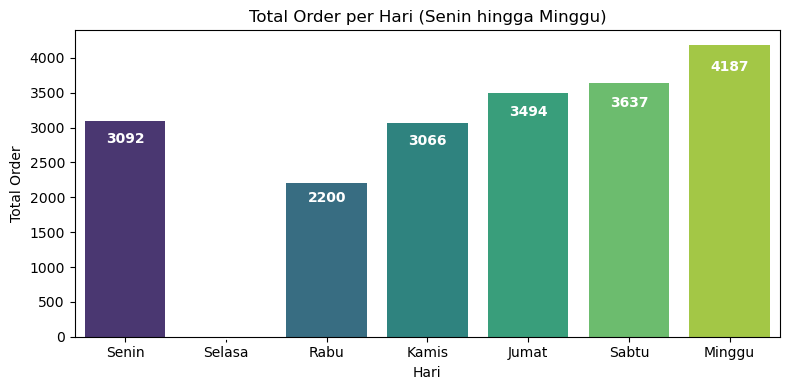

In [67]:
# Ubah Series menjadi DataFrame agar bisa dipakai di sns.barplot
df_total_orders = total_orders_per_day.reset_index()
df_total_orders.columns = ['DayOfWeek', 'total_orders']

plt.figure(figsize=(8, 4))
ax = sns.barplot(x='DayOfWeek', y='total_orders', data=df_total_orders, palette='viridis')

# Menambahkan label angka di atas batang
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2, height - height * 0.05),  # posisikan sedikit di bawah ujung batang
                ha='center', va='top', fontsize=10, fontweight='bold', color='white')

plt.title('Total Order per Hari (Senin hingga Minggu)')
plt.xlabel('Hari')
plt.ylabel('Total Order')
plt.tight_layout()
plt.show()

- Untuk melihat Penjualan harian vs bulanan gunakan heatmap, biar lebih ringkas

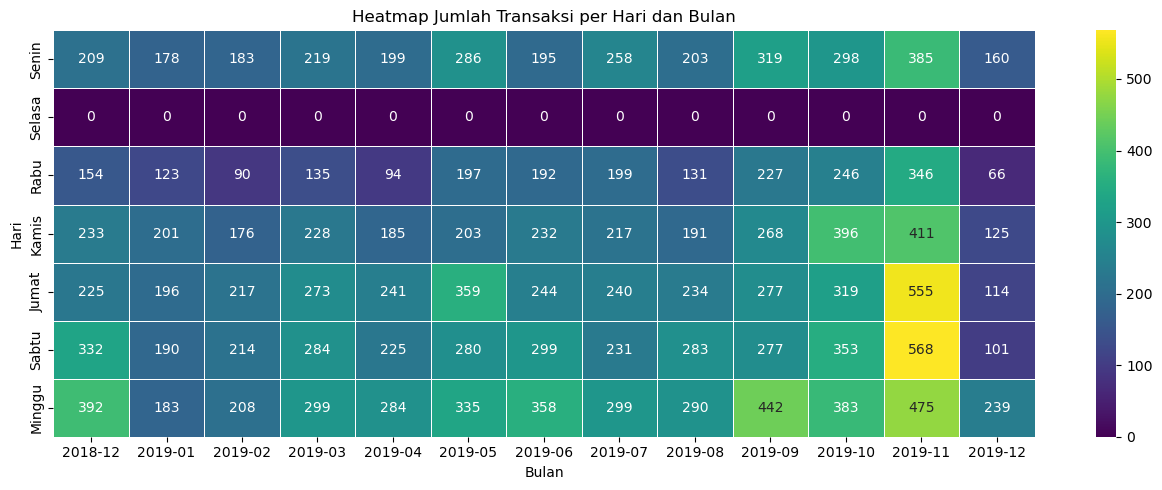

In [68]:
# Mengelompokkan data berdasarkan nama hari dan bulan, lalu menghitung jumlah transaksi unik
# Hasilnya dipivot (unstack) menjadi format tabel dengan hari sebagai baris dan bulan sebagai kolom
# Reindex digunakan untuk memastikan urutan hari dan bulan sesuai yang diinginkan, lalu missing values diisi dengan 0
heatmap_data = df_sales.groupby(['DayName', 'YearMonth'])['TransactionNo'].nunique() \
                .unstack() \
                .reindex(index=days_of_week) \
                .fillna(0)

# Plot heatmap
plt.figure(figsize=(13, 5))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='viridis', linewidths=0.5)
plt.title('Heatmap Jumlah Transaksi per Hari dan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Hari')
plt.tight_layout()
plt.show()

In [69]:
# Cek transaksi pada hari selasa
tuesday_transactions = df_sales[df_sales['DayOfWeek'] == 'Tuesday'] # Filter transaksi pada hari Selasa
tuesday_transactions

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Year,Month,...,YearMonth,TotalRevenue,TransactionCategory,RevenueCategory,FinalSegment,cohort_month,transaction_month,cohort_index,DayOfWeek,DayName


###  Kesimpulan dari Transaksi per Hari dan Bulan

Berdasarkan visualisasi heatmap jumlah transaksi per hari dan bulan:

1. **Hari Paling Sibuk:**
   - Hari **Jumat** dan **Minggu** konsisten menunjukkan jumlah transaksi yang tinggi hampir di semua bulan.
   - Khusus bulan **November**, jumlah transaksi tertinggi terjadi pada **Jumat (555 transaksi)** dan **Sabtu (568 transaksi)**.

2. **Hari Libur:**
   - Hari **Selasa** tidak memiliki transaksi sama sekali pada seluruh bulan. Ini menunjukkan kemungkinan adanya hari libur operasional.

3. **Bulan Paling Aktif:**
   - Bulan **November (bulan ke-11)** menunjukkan aktivitas transaksi yang sangat tinggi di hampir semua hari.
   - Disusul oleh bulan **Oktober (bulan ke-10)**.

4. **Pola Musiman (Seasonality):**
   - Ada kecenderungan peningkatan transaksi menjelang akhir tahun (Oktober - November).
   - Ini bisa mengindikasikan musim belanja atau promosi khusus pada periode tersebut.


# Price Elasticity

Price sensitivity atau sensitifitas harga mengacu pada perubahan permintaan pelanggan akibat naik atau turunya harga suatu produk.

Pada bagian ini anda akan diminta untuk melakukan analisis terhadap suatu produk yang penjualannya sangat dipengaruhi oleh harga.

## Pertanyaan

Pertanyaan 1 :   
Produk apa yang paling sering mengalami perubahan harga?   
Hitunglah banyaknya harga unik di setiap produk dan ambil daftar produk yang pernah terjual dengan setidaknya 10 variasi harga yang berbeda.

Price Elasticity akan semakin baik dianalisis ketika lebih banyak variasi harga yang muncul.

Pertanyaan 2 :   
Dari semua produk yang terambil dari step 1, hitung lah korelasi antara harga dengan quantity untuk setiap barang.  
Barang manakah yang memiliki korelasi paling negatif?  

Pertanyaan 3 : 
Buatlah scatter plot antara harga dan quantity untuk barang dari soal sebelumnya.  
Apabila produk tersebut mengalami kenaikan harga, kira-kira apa yang akan terjadi dengan penjualan ?

### Price Elasticity
Pertanyaan 1 :
- Produk apa yang paling sering mengalami perubahan harga?
- Hitunglah banyaknya harga unik di setiap produk dan ambil daftar produk yang pernah terjual dengan setidaknya 10 variasi harga yang berbeda.

In [70]:
# Menghitung jumlah variasi harga unik untuk setiap produk
price_variations = df_sales.groupby('ProductNo')['Price'].nunique().reset_index()  # Menghitung variasi harga unik per produk
price_variations.columns = ['ProductNo', 'UniquePriceCount']  # Mengganti nama kolom untuk memudahkan pemahaman

# Filter produk dengan setidaknya 10 variasi harga unik
most_frequent_price_change = price_variations[price_variations['UniquePriceCount'] >= 10]

# Gabungkan dengan informasi tambahan dari df untuk mendapatkan nama produk, negara, volume transaksi, dan total revenue
# Hanya ambil satu entri untuk setiap produk menggunakan drop_duplicates
most_frequent_price_change = most_frequent_price_change.merge(
    df_sales[['ProductNo', 'ProductName']].drop_duplicates(subset='ProductNo'),
    on='ProductNo', how='left'
)

# Mengambil daftar ProductNo dari produk yang terpilih
most_frequent_price_change_nos = most_frequent_price_change['ProductNo'].tolist()

# Urutkan berdasarkan UniquePriceCount dari yang terbanyak
most_frequent_price_change = most_frequent_price_change.sort_values(by='UniquePriceCount', ascending=False)

In [71]:
# Menampilkan hasil
most_frequent_price_change.head(1)

,ProductNo,UniquePriceCount,ProductName
613,79321,21,Chilli Lights


In [72]:
# Cari produk dengan variasi harga unik terbanyak
top_10_most_frequent_price_change = most_frequent_price_change.sort_values('UniquePriceCount', ascending=False).head()
top_10_most_frequent_price_change

,ProductNo,UniquePriceCount,ProductName
613,79321,21,Chilli Lights
57,21166,20,Cook With Wine Metal Sign
206,22114,20,Hot Water Bottle Tea And Sympathy
14,20685,19,Doormat Red Retrospot
603,48187,19,Doormat New England


In [73]:
total_unique_products = df_sales['ProductName'].nunique()
total_unique_products

3751

In [74]:
most_frequent_price_change['UniquePriceCount'].value_counts()

UniquePriceCount
10    229
11    186
12    105
13     54
14     47
16     23
15     22
17     13
18      7
19      5
20      2
21      1
Name: count, dtype: int64


- Produk yang mengalami perubahan harga paling sering adalah Chilli Lights, yang telah berubah harganya sebanyak 21 kali.
- Ada 694 produk yang telah berubah harganya setidaknya 10 variasi harga yang berbeda.

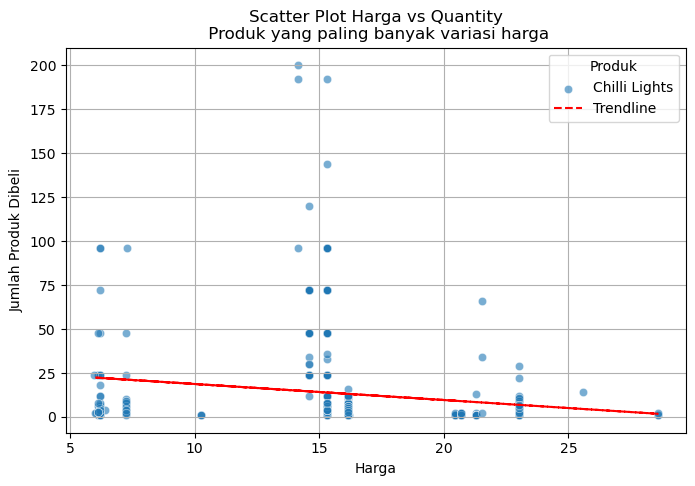

In [75]:
# Ambil produk teratas berdasarkan variasi harga unik terbanyak
top_most_frequent_price_change = most_frequent_price_change.head(1)

plt.figure(figsize=(8,5))

for idx, row in top_most_frequent_price_change.iterrows():
    product_no = row['ProductNo']
    product_name = row['ProductName']
    
    # Filter data produk
    df_prod = df_sales[df_sales['ProductNo'] == product_no]
    
    # Plot scatter harga vs quantity dengan label produk
    sns.scatterplot(data=df_prod, x='Price', y='Quantity', alpha=0.6, label=product_name)

# Buat trendline
z = np.polyfit(df_prod['Price'], df_prod['Quantity'], 1)
p = np.poly1d(z)
plt.plot(df_prod['Price'], p(df_prod['Price']), "r--", label="Trendline")
plt.legend()


plt.title('Scatter Plot Harga vs Quantity\n Produk yang paling banyak variasi harga')
plt.xlabel('Harga')
plt.ylabel('Jumlah Produk Dibeli')
plt.legend(title='Produk')
plt.grid(True)
plt.show()

- Produk "Chilli Lights", harga tidak secara signifikan mempengaruhi jumlah produk yang dibeli. Sebagian besar transaksi terjadi pada rentang harga rendah hingga menengah dengan jumlah pembelian yang relatif kecil. Produk dengan harga yang lebih tinggi cenderung memiliki volume penjualan yang lebih rendah.

### Price Elasticity
Pertanyaan 2 :
- Dari semua produk yang terambil dari step 1, hitung lah korelasi antara harga dengan quantity untuk setiap barang.
- Barang manakah yang memiliki korelasi paling negatif?


In [76]:
# Filter data hanya untuk produk yang terpilih dari step 1
filtered_df_sales = df_sales[df_sales['ProductNo'].isin(most_frequent_price_change_nos)]

# Fungsi untuk menghitung korelasi Price dan Quantity, dengan pengecekan data cukup
def calc_corr(group):
    if len(group) > 1:
        return group['Price'].corr(group['Quantity'])
    else:
        return float('nan')

# Menghitung korelasi antara Price dan Quantity untuk setiap ProductNo
correlation_results = filtered_df_sales.groupby('ProductNo').apply(calc_corr).reset_index()
correlation_results.columns = ['ProductNo', 'Price_Quantity_Correlation']

# Merge dengan nama produk
correlation_results = correlation_results.merge(
    df_sales[['ProductNo', 'ProductName']].drop_duplicates(), on='ProductNo', how='left'
)

# Cari produk dengan korelasi paling negatif (nilai terkecil)
top_negative_correlation = correlation_results.nsmallest(1, 'Price_Quantity_Correlation')

print(top_negative_correlation)

C:\Users\W10\AppData\Local\Temp\ipykernel_13476\4137970941.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlation_results = filtered_df_sales.groupby('ProductNo').apply(calc_corr).reset_index()


    ProductNo  Price_Quantity_Correlation                         ProductName
212     22124                   -0.476031  Set Of 2 Tea Towels Ping Microwave


In [77]:
top_negative_correlation

,ProductNo,Price_Quantity_Correlation,ProductName
212,22124,-0.476031,Set Of 2 Tea Towels Ping Microwave


In [78]:
top_negative_correlation = correlation_results.nsmallest(5, 'Price_Quantity_Correlation')

In [79]:
top_negative_correlation

,ProductNo,Price_Quantity_Correlation,ProductName
212,22124,-0.476031,Set Of 2 Tea Towels Ping Microwave
431,22785,-0.461947,Squarecushion Cover Pink Union Jack
200,22107,-0.449962,Pizza Plate In Box
49,21110,-0.439484,Large Cake Towel Pink Spots
114,21705,-0.436841,Bag 500g Swirly Marbles


- **Set Of 2 Tea Towels Ping Microwave** memiliki korelasi negatif paling besar yaitu -0.476031. Ini berarti bahwa untuk produk **Set Of 2 Tea Towels Ping Microwave** terdapat hubungan negatif antara harga dan kuantitas penjualan, atau dengan kata lain, penjualan produk sangat sensitif terhadap perubahan harga.

### Price Elasticity
Pertanyaan 3 :
- Buatlah scatter plot antara harga dan quantity untuk barang dari soal sebelumnya.
- Apabila produk tersebut mengalami kenaikan harga, kira-kira apa yang akan terjadi dengan penjualan ?

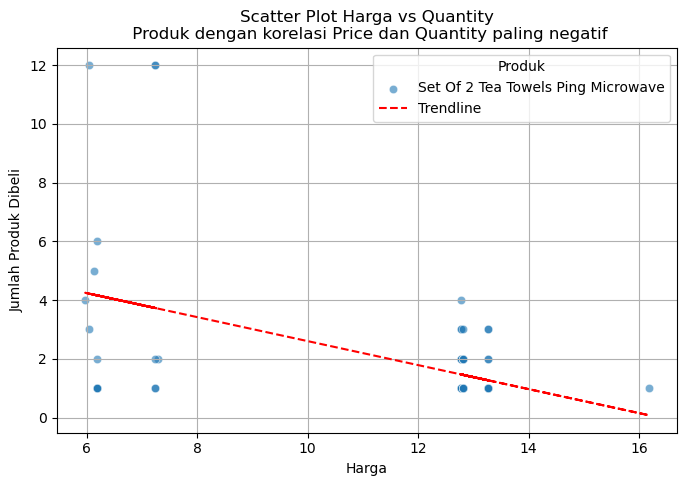

In [80]:
# Cari produk dengan korelasi paling negatif
top_negative_correlation = correlation_results.nsmallest(1, 'Price_Quantity_Correlation')

plt.figure(figsize=(8,5))

for idx, row in top_negative_correlation.iterrows():
    product_no = row['ProductNo']
    product_name = row['ProductName']
    
    # Filter data produk
    df_prod = df_sales[df_sales['ProductNo'] == product_no]
    
    # Plot scatter harga vs quantity dengan label produk
    sns.scatterplot(data=df_prod, x='Price', y='Quantity', alpha=0.6, label=product_name)
# Buat trendline
z = np.polyfit(df_prod['Price'], df_prod['Quantity'], 1)
p = np.poly1d(z)
plt.plot(df_prod['Price'], p(df_prod['Price']), "r--", label="Trendline")
plt.legend()
plt.title('Scatter Plot Harga vs Quantity\n Produk dengan korelasi Price dan Quantity paling negatif')
plt.xlabel('Harga')
plt.ylabel('Jumlah Produk Dibeli')
plt.legend(title='Produk')
plt.grid(True)
plt.show()

Jika produk **Set Of 2 Tea Towels Ping Microwave** mengalami kenaikan harga, maka kuantitas penjualan akan menurun. Hal ini dapat dilihat dari jumlah penjualan yang semakin kecil ketika titik pada scatter plot semakin ke kanan atau dengan kata lain harga semakin mahal. Selain itu, dapat juga dilihat dari garis tren yang menunjukkan bahwa semakin ke kanan atau semakin mahal harga, maka posisi garis tren semakin rendah yang berarti kuantitas penjualan semakin sedikit.


In [81]:
# Merge ke df_sales berdasarkan ProductNo
df_sales = df_sales.merge(correlation_results.drop(columns=['ProductName']), on='ProductNo', how='left')

## Analisis Price Sensitivity: Korelasi Harga dan Kuantitas untuk semua produk

Analisis ini bertujuan untuk memahami sejauh mana **harga mempengaruhi jumlah pembelian** produk, atau disebut juga sebagai **price sensitivity**. Dua visualisasi berikut digunakan:


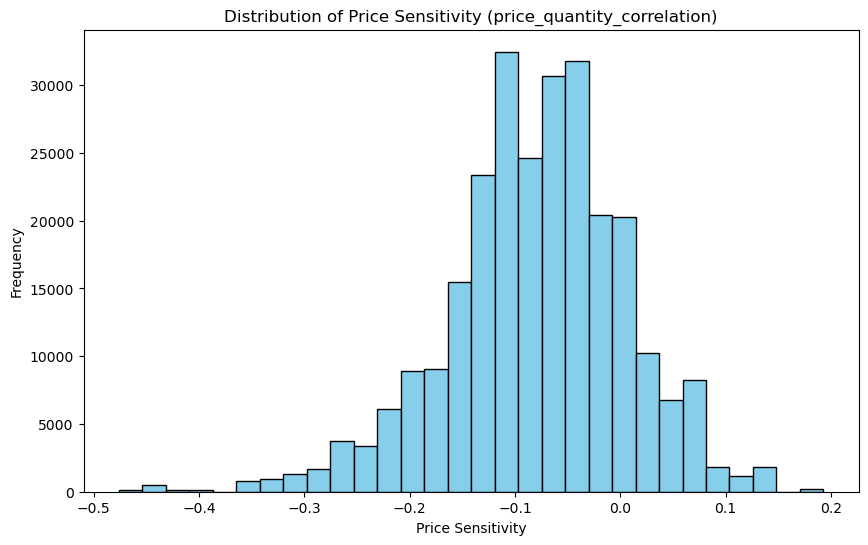

In [82]:
# Visualization: Histogram to see the distribution of 'price_quantity_correlation'
plt.figure(figsize=(10, 6))
plt.hist(df_sales['Price_Quantity_Correlation'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Price Sensitivity (price_quantity_correlation)')
plt.xlabel('Price Sensitivity')
plt.ylabel('Frequency')
plt.show()


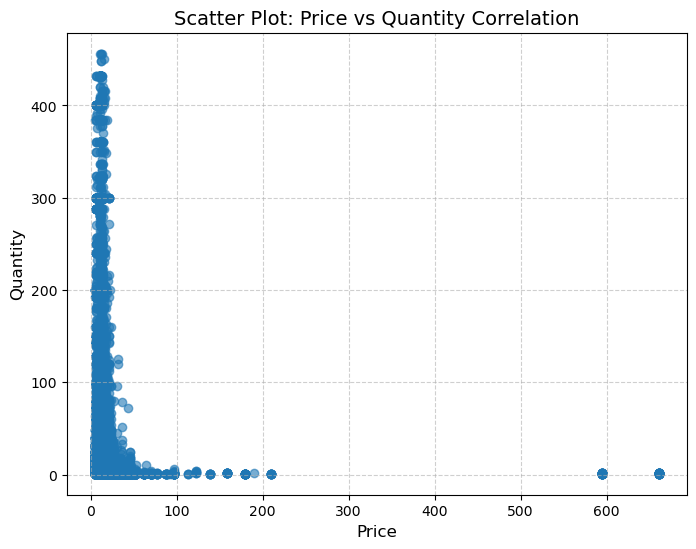

In [83]:
# Melihat Price vs Qty correlation untuk semua produk
all_product_data = df_sales[['Price', 'Quantity']]

# Scatter plot untuk price and qty correlation
plt.figure(figsize=(8, 6))
plt.scatter(all_product_data['Price'], all_product_data['Quantity'], alpha=0.6)
plt.title(f'Scatter Plot: Price vs Quantity Correlation', fontsize=14)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

###  1. Histogram Distribusi Price Sensitivity
- Mayoritas produk memiliki korelasi negatif ringan (sekitar -0.1 hingga -0.2), menunjukkan bahwa konsumen cenderung **sensitif terhadap harga**.
- Produk dengan korelasi mendekati nol → **tidak terlalu terpengaruh oleh harga**.
- Beberapa outlier menunjukkan korelasi positif, namun jumlahnya sedikit.

---

###  2. Scatter Plot: Hubungan Harga vs Kuantitas
- Terlihat jelas pola negatif: semakin mahal harga, semakin sedikit produk yang dibeli.
- Konsentrasi tertinggi pada produk dengan harga < 50 dan jumlah pembelian tinggi.
- Produk dengan harga di atas 100 hanya sedikit, menunjukkan **permintaan rendah**.

### Kesimpulan umumnya adalah:
Konsumen cenderung sensitif terhadap harga, dimana kenaikan harga menyebabkan penurunan jumlah pembelian. Pola ini menunjukkan bahwa produk dengan harga lebih rendah memiliki permintaan yang lebih tinggi, sedangkan produk dengan harga tinggi memiliki permintaan yang rendah.



# Basket Size Analysis

Ketika seorang pelanggan e-commerce menekan "add to cart", maka barang tersebut akan disimpan dalam sebuah "basket".  
Ketika melakukan checkout, maka semua barang dalam basket tersebut akan diproses dan dikirimkan.  
Ukuran dari basket dapat diukur melalui nilai GMV (Gross merchandise volume) yang merupakan total harga barang yang dibeli.  
Contoh : 
Pada tanggal 1 januari 2012
Tuan A membeli 1 shampoo seharga 15ribu dan 2 sabun seharga 20ribu masing-masing. Maka basket size tuan A adalah 55ribu rupiah.
Nyonya B hanya membeli 1 cemilan seharga 20 ribu, maka basket size dari nyonya B adalah 20 ribu rupiah.
Berarti total GMV ecommerce pada 1 januari 2012 adalah 75ribu rupiah, dengan rata-rata basket size sebesar 37.5 ribu rupiah per basket.

## Pertanyaan
1. Hitung rata-rata basket size dari seluruh transaksi per harinya, apakah konsisten atau ada perubahan ?
2. Apakah ada perbedaan ukuran basket dari negara yang berbeda ?

## Basket Size Analysis
1. Hitung rata-rata basket size dari seluruh transaksi per harinya, apakah konsisten atau ada perubahan ?

In [84]:
# Hitung basket size (jumlah barang per transaksi)
quantity_per_transaction = df_sales.groupby(['Date', 'TransactionNo']).agg(
    quantity_per_trx=('Quantity', 'sum')
)

# Rata-rata basket size per hari
avg_basket_size_per_day = quantity_per_transaction.groupby('Date')['quantity_per_trx'].mean()

# Hitung Average Transaction Value (ATV) per hari
basket_size = df_sales.groupby(['Date', 'TransactionNo'])['TotalRevenue'].sum().reset_index()
gmv_per_day = basket_size.groupby('Date')['TotalRevenue'].sum()
avg_transaction_value_per_day = gmv_per_day / basket_size.groupby('Date')['TransactionNo'].nunique()

# Gabungkan hasil ke dalam satu DataFrame
basket_size_and_average_transaction_value_per_day = pd.DataFrame({
    'AverageBasketSize': avg_basket_size_per_day,
    'AverageTransactionValue': avg_transaction_value_per_day,
})

# Reset index agar 'Date' menjadi kolom biasa
basket_size_and_average_transaction_value_per_day = basket_size_and_average_transaction_value_per_day.reset_index()

In [85]:
basket_size_and_average_transaction_value_per_day

,Date,AverageBasketSize,AverageTransactionValue
0,2018-12-01,202.401575,2461.987008
1,2018-12-02,176.460432,2119.184604
2,2018-12-03,215.926471,2806.981029
3,2018-12-05,175.329545,2131.648295
4,2018-12-06,201.252427,2521.320000
...,...,...,...
300,2019-12-05,335.480000,2218.442960
301,2019-12-06,266.412281,1728.376316
302,2019-12-07,324.782178,2062.089505
303,2019-12-08,259.432203,1657.158814


Average Transaction Value - Trend: Naik, Slope: 0.52
Average Basket Size - Trend: Naik, Slope: 0.15


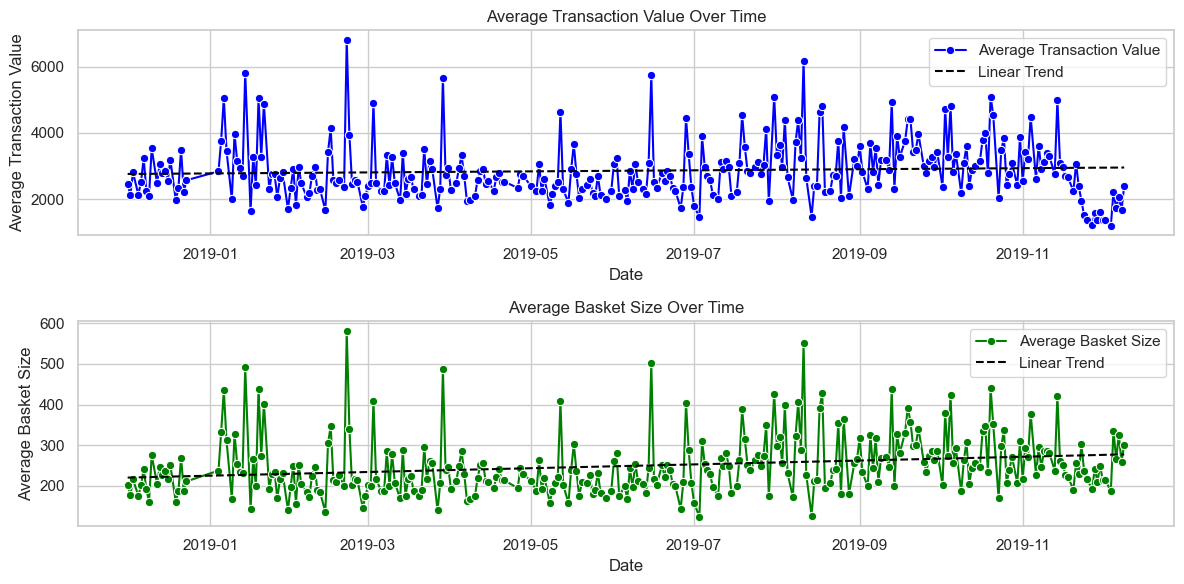

In [86]:
from scipy.stats import linregress
# Konversi tanggal ke ordinal untuk regresi linier
basket_size_and_average_transaction_value_per_day['Date_Ordinal'] = basket_size_and_average_transaction_value_per_day['Date'].map(pd.Timestamp.toordinal)

# Regresi linier untuk Average Transaction Value (Monetary)
slope_m, intercept_m, r_value_m, p_value_m, std_err_m = linregress(
    basket_size_and_average_transaction_value_per_day['Date_Ordinal'],
    basket_size_and_average_transaction_value_per_day['AverageTransactionValue']
)
trend_m = 'Naik' if slope_m > 0 else 'Turun'

# Regresi linier untuk Average Basket Size (Volume)
slope_v, intercept_v, r_value_v, p_value_v, std_err_v = linregress(
    basket_size_and_average_transaction_value_per_day['Date_Ordinal'],
    basket_size_and_average_transaction_value_per_day['AverageBasketSize']
)
trend_v = 'Naik' if slope_v > 0 else 'Turun'

# Tampilkan hasil tren dan slope
print(f"Average Transaction Value - Trend: {trend_m}, Slope: {slope_m:.2f}")
print(f"Average Basket Size - Trend: {trend_v}, Slope: {slope_v:.2f}")

# Visualisasi tren harian
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Plot Average Transaction Value (Monetary)
plt.subplot(2,1,1)
sns.lineplot(
    x='Date',
    y='AverageTransactionValue',
    data=basket_size_and_average_transaction_value_per_day,
    marker='o',
    color='blue',
    label='Average Transaction Value'
)
plt.plot(
    basket_size_and_average_transaction_value_per_day['Date'],
    intercept_m + slope_m * basket_size_and_average_transaction_value_per_day['Date_Ordinal'],
    color='black',
    linestyle='--',
    label='Linear Trend'
)
plt.title('Average Transaction Value Over Time')
plt.xlabel('Date')
plt.ylabel('Average Transaction Value')
plt.xticks(rotation=0)
plt.legend()

# Plot Average Basket Size (Volume)
plt.subplot(2,1,2)
sns.lineplot(
    x='Date',
    y='AverageBasketSize',
    data=basket_size_and_average_transaction_value_per_day,
    marker='o',
    color='green',
    label='Average Basket Size'
)
plt.plot(
    basket_size_and_average_transaction_value_per_day['Date'],
    intercept_v + slope_v * basket_size_and_average_transaction_value_per_day['Date_Ordinal'],
    color='black',
    linestyle='--',
    label='Linear Trend'
)
plt.title('Average Basket Size Over Time')
plt.xlabel('Date')
plt.ylabel('Average Basket Size')
plt.xticks(rotation=0)
plt.legend()

plt.tight_layout()
plt.show()

Weekly Average Transaction Value - Trend: Naik, Slope: 0.35
Weekly Average Basket Size - Trend: Naik, Slope: 0.15


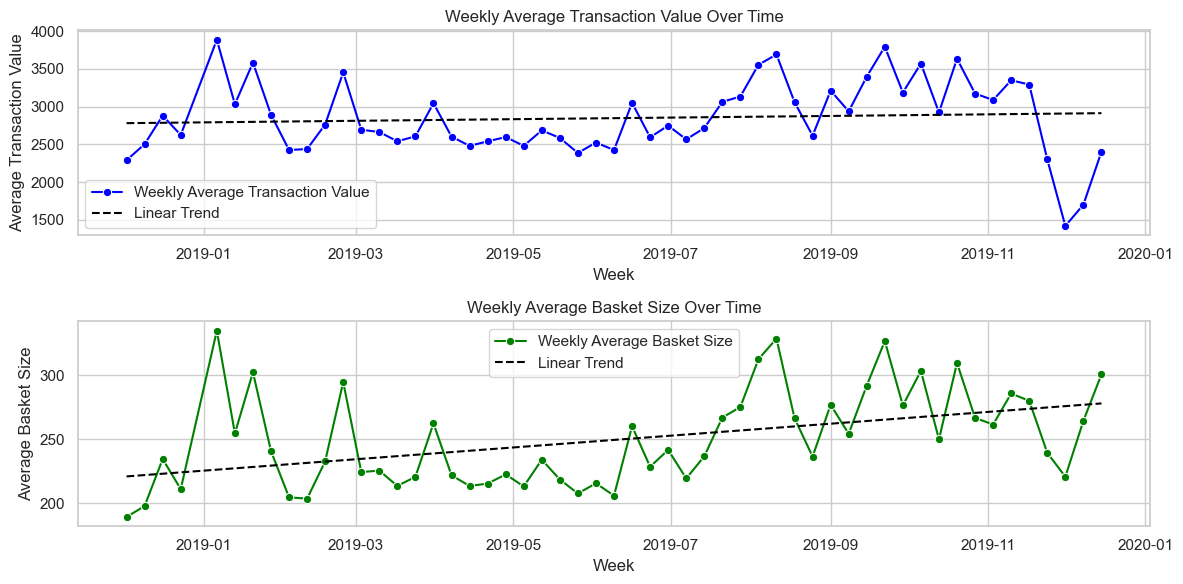

In [87]:
from scipy.stats import linregress

# Pastikan kolom 'Date' bertipe datetime
basket_size_and_average_transaction_value_per_day['Date'] = pd.to_datetime(
    basket_size_and_average_transaction_value_per_day['Date']
)

# Set kolom 'Date' sebagai index agar bisa resample
basket_size_and_average_transaction_value_per_day = basket_size_and_average_transaction_value_per_day.set_index('Date')

# Resample ke mingguan (minggu berakhir hari Minggu) dan hitung rata-rata mingguan
weekly_summary = basket_size_and_average_transaction_value_per_day.resample('W').mean().reset_index()

# Drop baris dengan nilai NaN
weekly_summary = weekly_summary.dropna(subset=['AverageBasketSize', 'AverageTransactionValue'])

# Konversi tanggal ke ordinal untuk regresi linier mingguan
weekly_summary['Date_Ordinal'] = weekly_summary['Date'].map(pd.Timestamp.toordinal)

# Regresi linier Average Transaction Value mingguan
slope_m_w, intercept_m_w, r_value_m_w, p_value_m_w, std_err_m_w = linregress(
    weekly_summary['Date_Ordinal'],
    weekly_summary['AverageTransactionValue']
)
trend_m_w = 'Naik' if slope_m_w > 0 else 'Turun'

# Regresi linier Average Basket Size mingguan
slope_v_w, intercept_v_w, r_value_v_w, p_value_v_w, std_err_v_w = linregress(
    weekly_summary['Date_Ordinal'],
    weekly_summary['AverageBasketSize']
)
trend_v_w = 'Naik' if slope_v_w > 0 else 'Turun'

print(f"Weekly Average Transaction Value - Trend: {trend_m_w}, Slope: {slope_m_w:.2f}")
print(f"Weekly Average Basket Size - Trend: {trend_v_w}, Slope: {slope_v_w:.2f}")

# Visualisasi tren mingguan
plt.figure(figsize=(12,6))
sns.set(style="whitegrid")

# Plot Average Transaction Value (Monetary) mingguan
plt.subplot(2,1,1)
sns.lineplot(
    x='Date',
    y='AverageTransactionValue',
    data=weekly_summary,
    marker='o',
    color='blue',
    label='Weekly Average Transaction Value'
)
plt.plot(
    weekly_summary['Date'],
    intercept_m_w + slope_m_w * weekly_summary['Date_Ordinal'],
    color='black',
    linestyle='--',
    label='Linear Trend'
)
plt.title('Weekly Average Transaction Value Over Time')
plt.xlabel('Week')
plt.ylabel('Average Transaction Value')
plt.xticks(rotation=0)
plt.legend()

# Plot Average Basket Size (Volume) mingguan
plt.subplot(2,1,2)
sns.lineplot(
    x='Date',
    y='AverageBasketSize',
    data=weekly_summary,
    marker='o',
    color='green',
    label='Weekly Average Basket Size'
)
plt.plot(
    weekly_summary['Date'],
    intercept_v_w + slope_v_w * weekly_summary['Date_Ordinal'],
    color='black',
    linestyle='--',
    label='Linear Trend'
)
plt.title('Weekly Average Basket Size Over Time')
plt.xlabel('Week')
plt.ylabel('Average Basket Size')
plt.xticks(rotation=0)
plt.legend()

plt.tight_layout()
plt.show()

## Kesimpulan
- Nilai Transaksi Rata-rata baik secara harian (slope: 0.52) maupun mingguan (slope: 0.35) menunjukkan tren kenaikan, yang mengindikasikan bahwa pelanggan cenderung mengeluarkan uang lebih banyak per transaksi dari waktu ke waktu.

- Ukuran Keranjang Belanja (Basket Size) juga mengalami tren naik secara konsisten, baik harian maupun mingguan (slope sama: 0.15), menandakan adanya peningkatan jumlah item yang dibeli dalam satu transaksi.

- Kenaikan slope harian yang lebih tinggi dibanding mingguan mengindikasikan fluktuasi harian yang lebih dinamis, namun tetap menunjukkan pertumbuhan jangka menengah yang stabil.



2. Apakah ada perbedaan ukuran basket dari negara yang berbeda ?

In [88]:
# Menghitung total unit (Quantity) yang terjual dari setiap negara
total_unit_sold = df_sales.groupby('Country').agg(units_sold=('Quantity', 'sum'))
total_unit_sold = total_unit_sold.sort_values('units_sold', ascending=False)

# Menghitung total jumlah transaksi dari setiap negara
total_number_transaction = df_sales.groupby('Country').agg(total_transaction=('TransactionNo', 'count'))
total_number_transaction = total_number_transaction.sort_values('total_transaction', ascending=False)

# Menghitung rata-rata basket size per negara
# Rumus: total unit terjual / total jumlah transaksi
country_average_basket_size = total_unit_sold['units_sold'] / total_number_transaction['total_transaction']

# Mengurutkan dari basket size terkecil ke terbesar (ascending)
country_average_basket_size = country_average_basket_size.sort_values(ascending=False)

# Mengubah menjadi DataFrame agar bisa divisualisasikan
country_average_basket_size_df = country_average_basket_size.reset_index()
country_average_basket_size_df.columns = ['Country', 'AverageBasketSize']
country_average_basket_size_df

,Country,AverageBasketSize
0,Netherlands,81.149157
1,Sweden,66.882353
2,Australia,48.438813
3,Japan,45.049844
4,Czech Republic,27.916667
5,Singapore,24.344186
6,Denmark,21.004902
7,Lithuania,18.823529
8,Norway,18.640777
9,EIRE,18.385397


C:\Users\W10\AppData\Local\Temp\ipykernel_13476\665726364.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


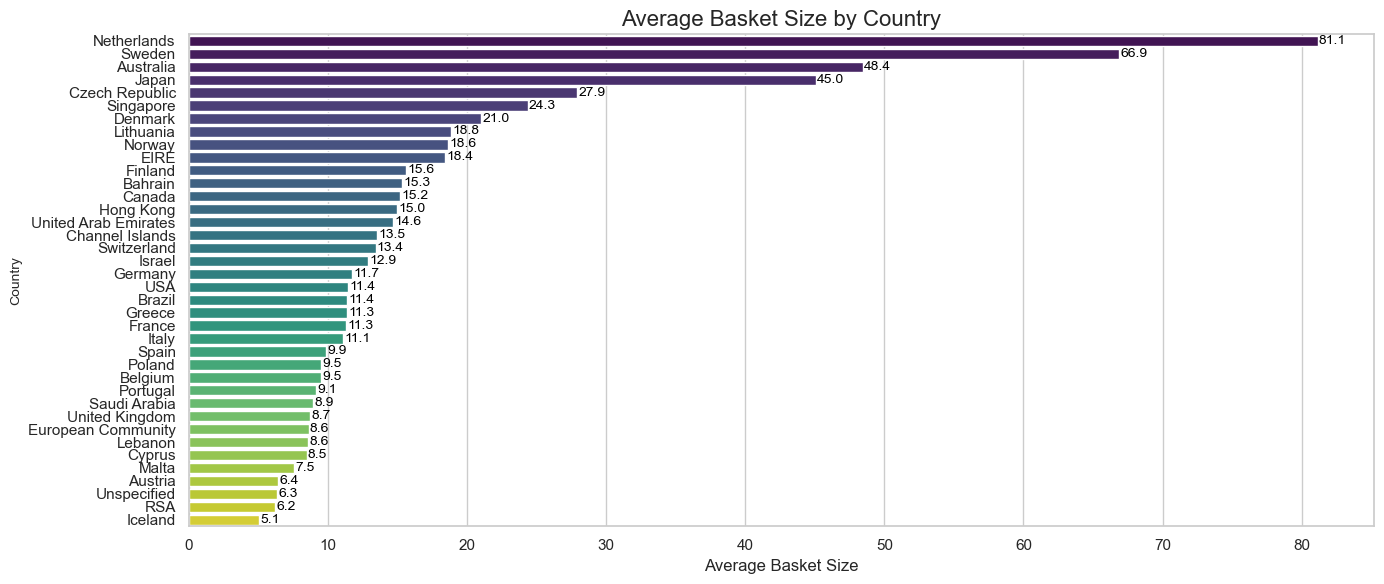

In [89]:
# Visualisasi bar chart ABS per Negara
plt.figure(figsize=(14, 6))
sns.barplot(
    data=country_average_basket_size_df,
    x='AverageBasketSize',
    y='Country',
    palette='viridis'
)

# Menambahkan angka pada setiap batang dengan offset agar tidak menempel
for index, value in enumerate(country_average_basket_size_df['AverageBasketSize']):
    plt.text(value + 0.1, index, f'{value:.1f}', color='black', va='center', fontsize=10)  # Offset pada x

plt.title('Average Basket Size by Country', fontsize=16)
plt.xlabel('Average Basket Size', fontsize=12)
plt.ylabel('Country', fontsize=10)
plt.tight_layout()
plt.show()

In [90]:
# Hitung total revenue per transaksi per negara
revenue_per_transaction_by_country = df_sales.groupby(['Country', 'TransactionNo']).agg(
    total_revenue=('TotalRevenue', 'sum')
).reset_index()

# Hitung rata-rata ATV per negara
avg_atv_by_country = revenue_per_transaction_by_country.groupby('Country')['total_revenue'].mean().reset_index()
avg_atv_by_country.rename(columns={'total_revenue': 'AverageTransactionValue'}, inplace=True)

# Urutkan dari yang terbesar
avg_atv_by_country = avg_atv_by_country.sort_values(by='AverageTransactionValue', ascending=False)

# Tampilkan hasil
avg_atv_by_country

,Country,AverageTransactionValue
24,Netherlands,22327.111000
30,Singapore,15870.237500
0,Australia,14737.840161
20,Japan,10064.442353
32,Sweden,8987.822121
25,Norway,6736.161429
33,Switzerland,6576.217455
1,Austria,6286.114545
5,Canada,6170.827500
10,EIRE,6044.763863


C:\Users\W10\AppData\Local\Temp\ipykernel_13476\468598185.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_atv_by_country, x='AverageTransactionValue', y='Country', palette='magma')


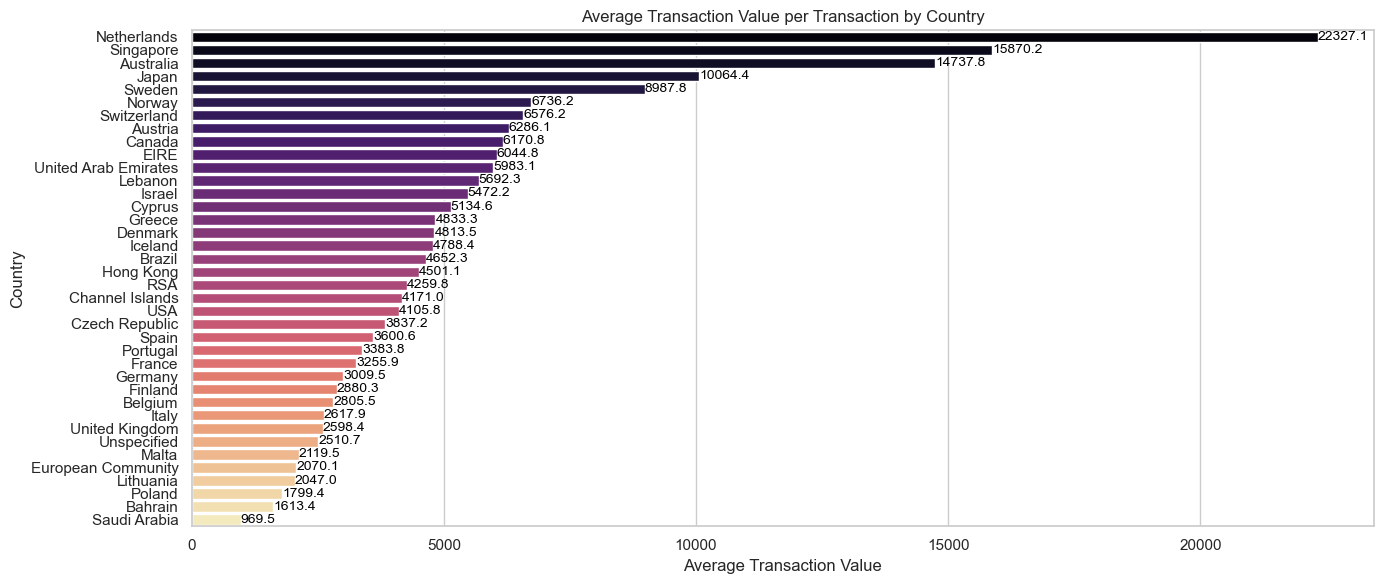

In [91]:
# Visualisasi ATV per Negara 
plt.figure(figsize=(14, 6))
sns.barplot(data=avg_atv_by_country, x='AverageTransactionValue', y='Country', palette='magma')
# Menambahkan angka pada setiap batang dengan offset agar tidak menempel
for index, value in enumerate(avg_atv_by_country['AverageTransactionValue']):
    plt.text(value + 0.1, index, f'{value:.1f}', color='black', va='center', fontsize=10)  # Offset pada x
plt.title('Average Transaction Value per Transaction by Country')
plt.xlabel('Average Transaction Value')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

Terdapat perbedaan yang cukup signifikan pada rata-rata basket size antar negara. Misalnya, pelanggan di Belanda memiliki rata-rata basket size yang jauh lebih besar dibandingkan negara lain, yaitu lebih dari 80 unit per transaksi. Sementara di negara seperti Iceland dan RSA, basket size-nya berada di bawah 10 unit. Hal ini menunjukkan adanya variasi perilaku belanja oleh pelanggan di masing-masing negara.

## Average Basket Size per Country
- Negara dengan rata-rata basket size tertinggi:

    - Netherlands (81.1 unit per transaksi)

    - Sweden (66.9)

    - Australia (48.4)

    - Japan (45.0)

- Negara dengan rata-rata basket size terendah:

    - Iceland (5.1)

    - RSA (South Africa) (6.2)

    - Unspecified (6.3)

    - Austria (6.4)

## Average Transaction Value per Country
- Negara dengan nilai transaksi rata-rata tertinggi:

    - Netherlands (22,327.1)

    - Singapore (15,870.2)

    - Australia (14,737.8)

    - Japan (10,064.4)

- Negara dengan nilai transaksi rata-rata terendah:

    - Saudi Arabia (969.5)

    - Bahrain (1,613.4)

    - Poland (1,794.9)

## Kesimpulan
- Netherlands, Sweden, Australia, dan Japan menonjol sebagai negara dengan basket size dan nilai transaksi rata-rata tertinggi, menandakan pelanggan dari negara-negara ini melakukan pembelian dalam jumlah besar dan nilai tinggi per transaksi.

- Beberapa negara seperti Saudi Arabia, Bahrain, dan Poland menunjukkan nilai transaksi yang rendah, bahkan jika basket size-nya tidak terlalu kecil, yang mungkin mengindikasikan pembelian barang dengan harga lebih murah.

- Negara seperti Iceland memiliki basket size rendah namun nilai transaksi menengah (4,652.3), bisa jadi karena produk bernilai tinggi meskipun dibeli dalam jumlah sedikit.

# Crucial Question

Ini adalah 5 pertanyaan utama yang ditanyakan oleh pembuat dataset sales ini.  
Anda dapat menggunakan analisis yang sudah dikerjakan pada bagian sebelumnya, ataupun melakukan analisis baru untuk menjawab pertanyaan dibawah.

1. How was the sales trend over the months?
2. What are the most frequently purchased products?
3. How many products does the customer purchase in each transaction?
4. What are the most profitable segment customers?
5. Based on your findings, what strategy could you recommend to the business to gain more profit?

### 1. How was the sales trend over the months?


In [92]:
# Kelompokkan berdasarkan bulan dan hitung total revenue per bulan
df_sales_monthly = df_sales.groupby(df_sales['Date'].dt.to_period('M')).agg({'TotalRevenue': 'sum'}).reset_index()
df_sales_monthly['Date'] = df_sales_monthly['Date'].astype(str)  # Konversi ke string untuk visualisasi

In [93]:
df_sales_monthly

,Date,TotalRevenue
0,2018-12,4031774.61
1,2019-01,3400012.27
2,2019-02,3017363.18
3,2019-03,4057066.85
4,2019-04,3124418.60
5,2019-05,4218390.21
6,2019-06,4173465.86
7,2019-07,4298795.02
8,2019-08,4404324.63
9,2019-09,6042577.27


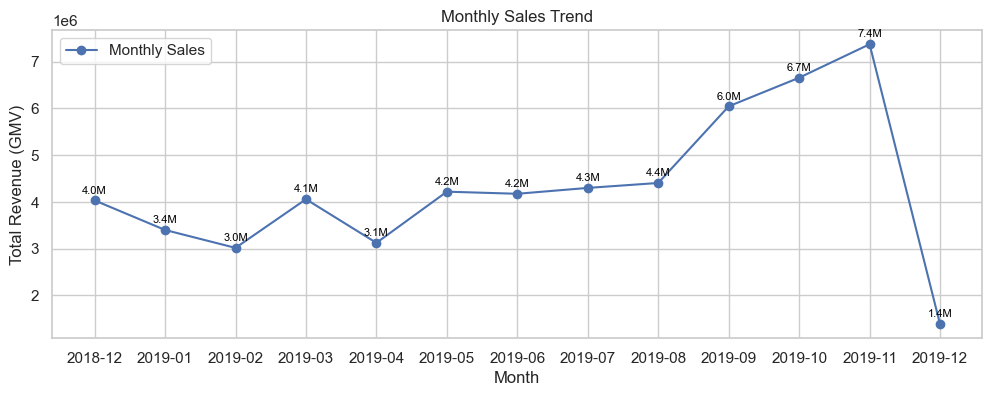

In [94]:
# Visualisasi tren penjualan per bulan
plt.figure(figsize=(12, 4))
plt.plot(df_sales_monthly['Date'], df_sales_monthly['TotalRevenue'], marker='o', linestyle='-', color='b', label='Monthly Sales')
plt.xticks(rotation=0)
plt.xlabel('Month')
plt.ylabel('Total Revenue (GMV)')
plt.title('Monthly Sales Trend')
plt.legend()
plt.grid(True)

# Tambahkan angka di tiap titik
for i, txt in enumerate(df_sales_monthly['TotalRevenue']):
    plt.annotate(f'{txt/1e6:.1f}M', (df_sales_monthly['Date'][i], df_sales_monthly['TotalRevenue'][i]),
                 textcoords="offset points", xytext=(0,5), ha='center', fontsize=8, color='black')

plt.show()

## Kesimpulan:
- Tren Penjualan Cenderung Meningkat:
    - Penjualan bulanan mengalami peningkatan yang konsisten sejak pertengahan tahun 2019, dengan puncaknya terjadi pada November 2019 sebesar 7.4M.

- Penurunan Tajam di Akhir Tahun:
    - Terjadi penurunan drastis pada Desember 2019 menjadi hanya sekitar 1.4M, jauh di bawah rata-rata bulan sebelumnya.

- Stabil di Pertengahan Tahun:
    - Dari Januari hingga Juli 2019, penjualan cukup stabil di kisaran 4.2M – 4.4M, menunjukkan konsistensi di periode tersebut.


### 2. What are the most frequently purchased products?



In [95]:
# Menghitung jumlah transaksi unik per produk (frekuensi pembelian)
purchase_frequency_per_product = df_sales.groupby('ProductName')['TransactionNo'].nunique().reset_index()

# Rename kolom agar lebih jelas
purchase_frequency_per_product.rename(columns={'TransactionNo': 'PurchaseFrequency'}, inplace=True)

# Mengurutkan produk berdasarkan frekuensi pembelian terbanyak
top_products_by_frequency = purchase_frequency_per_product.sort_values(by='PurchaseFrequency', ascending=False).head()

In [96]:
top_products_by_frequency

,ProductName,PurchaseFrequency
825,Cream Hanging Heart T-Light Holder,2261
1672,Jumbo Bag Red Retrospot,2089
2651,Regency Cakestand 3 Tier,1989
2222,Party Bunting,1687
1842,Lunch Bag Red Retrospot,1567


C:\Users\W10\AppData\Local\Temp\ipykernel_13476\317578726.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='PurchaseFrequency', y='ProductName', data=top_products_by_frequency, palette='viridis')


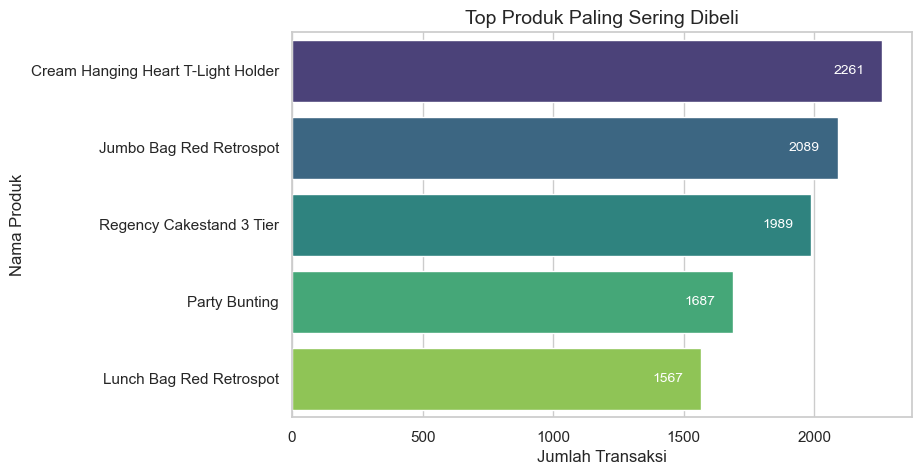

In [97]:
# Visualisasi 'top_products_by_frequency' adalah produk yang paling sering dibeli
plt.figure(figsize=(8, 5))

# Membuat bar plot
ax = sns.barplot(x='PurchaseFrequency', y='ProductName', data=top_products_by_frequency, palette='viridis')

# Menambahkan angka pada setiap bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', fontsize=10, color='white', label_type='edge', padding=-35)

# Menambahkan judul dan label
plt.title('Top Produk Paling Sering Dibeli', fontsize=14)
plt.xlabel('Jumlah Transaksi', fontsize=12)
plt.ylabel('Nama Produk', fontsize=12)

# Menampilkan plot
plt.show()

Berdasarkan visualisasi, produk yang paling sering dibeli adalah:

- Cream Hanging Heart T-Light Holder (2261 transaksi)
- Jumbo Bag Red Retrospot (2089 transaksi)
- Regency Cakestand 3 Tier (1989 transaksi)
Ketiga produk ini memiliki jumlah transaksi tertinggi di antara produk teratas.

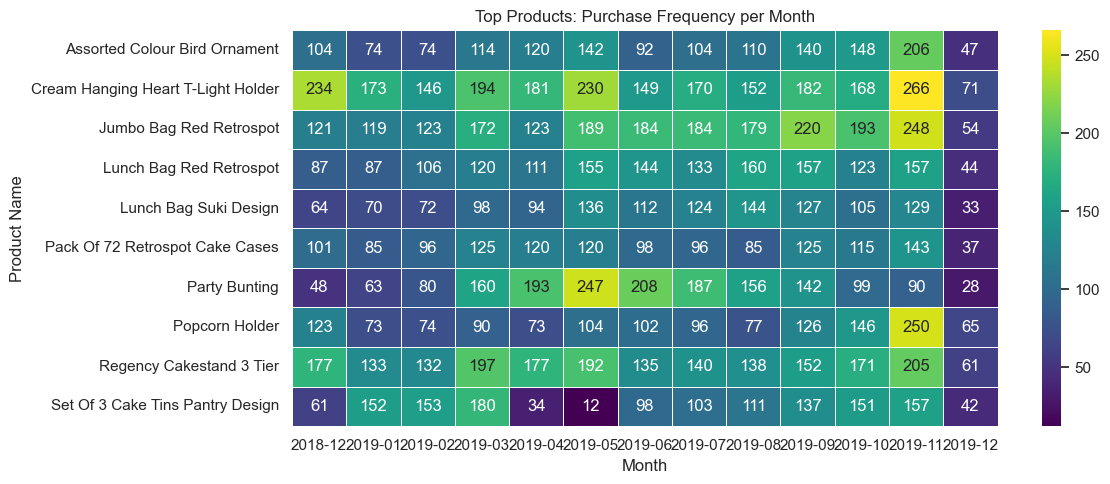

In [98]:
# Melihat produk teratas berdasarkan total frekuensi pembelian
top_products = df_sales['ProductName'].value_counts().head(10).index
df_sales_top = df_sales[df_sales['ProductName'].isin(top_products)]

# Hitung ulang dan buat heatmap
product_month_freq_top = df_sales_top.groupby(['ProductName', 'YearMonth']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 5))
sns.heatmap(product_month_freq_top, cmap="viridis", linewidths=.5, annot=True, fmt='d')
plt.title("Top Products: Purchase Frequency per Month")
plt.xlabel("Month")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()


Produk ini masuk kategori produk di top pada kategori Super Populer yang sudah di tampilkan sebelumnya

In [99]:
product_month_freq_top

YearMonth,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
ProductName,,,,,,,,,,,,,
Assorted Colour Bird Ornament,104,74,74,114,120,142,92,104,110,140,148,206,47
Cream Hanging Heart T-Light Holder,234,173,146,194,181,230,149,170,152,182,168,266,71
Jumbo Bag Red Retrospot,121,119,123,172,123,189,184,184,179,220,193,248,54
Lunch Bag Red Retrospot,87,87,106,120,111,155,144,133,160,157,123,157,44
Lunch Bag Suki Design,64,70,72,98,94,136,112,124,144,127,105,129,33
Pack Of 72 Retrospot Cake Cases,101,85,96,125,120,120,98,96,85,125,115,143,37
Party Bunting,48,63,80,160,193,247,208,187,156,142,99,90,28
Popcorn Holder,123,73,74,90,73,104,102,96,77,126,146,250,65
Regency Cakestand 3 Tier,177,133,132,197,177,192,135,140,138,152,171,205,61


### 3. How many products does the customer purchase in each transaction?


In [100]:
# Menghitung jumlah produk berbeda yang dibeli dalam setiap transaksi
products_per_transaction = df_sales.groupby('TransactionNo')['ProductNo'].nunique().reset_index()

# Ubah nama kolom untuk kejelasan
products_per_transaction.columns = ['TransactionNo', 'NumProducts']

In [101]:
# Tampilkan hasil
products_per_transaction.head()

,TransactionNo,NumProducts
0,536365,7
1,536366,2
2,536367,12
3,536368,4
4,536369,1


In [102]:
products_per_transaction.describe()

,NumProducts
count,19676.000000
mean,26.241614
std,47.013857
min,1.000000
25%,7.000000
50%,15.000000
75%,29.000000
max,1104.000000


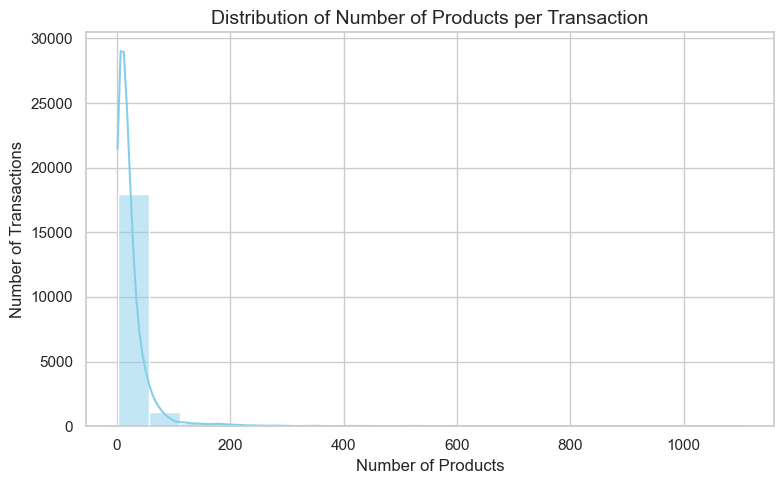

In [103]:
plt.figure(figsize=(8,5))
sns.histplot(products_per_transaction['NumProducts'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Number of Products per Transaction', fontsize=14)
plt.xlabel('Number of Products')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.tight_layout()
plt.show()

- Visualisasi distribusi jumlah produk per transaksi menunjukkan bahwa sebagian besar transaksi cenderung yang dibeli dalam jumlah yang relatif kecil. Hal ini terlihat jelas pada histogram di mana batang tertinggi berada di sisi kiri, mengindikasikan frekuensi transaksi yang tinggi dengan jumlah produk yang rendah.

- Singkatnya, sebagian besar pelanggan cenderung belanja barang sedikit per transaksi. Transaksi dengan banyak item itu jarang terjadi.

In [104]:
# Kelompokkan data berdasarkan nomor transaksi dan hitung jumlah produk unik dalam setiap transaksi
transaction_product_counts = df_sales.groupby('TransactionNo')['Quantity'].count()

# Hitung rata-rata jumlah produk per transaksi
average_products_per_transaction = transaction_product_counts.mean()

In [105]:
average_products_per_transaction

26.53384834315918

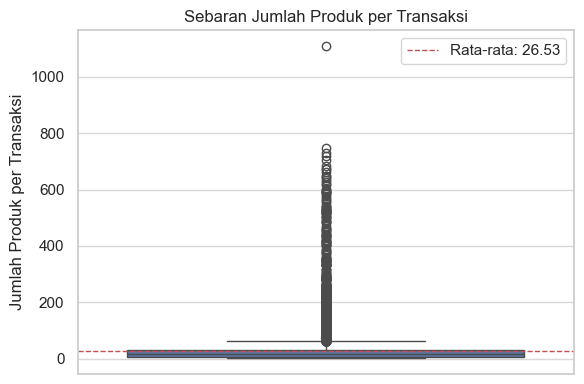

In [106]:
# 1. Box Plot Horizontal dengan Rata-rata
plt.figure(figsize=(6, 4))
sns.boxplot(y=transaction_product_counts, orient='v') 
plt.title('Sebaran Jumlah Produk per Transaksi')
plt.ylabel('Jumlah Produk per Transaksi')
plt.grid(axis='y', alpha=0.75)
plt.axhline(average_products_per_transaction, color='r', linestyle='--', linewidth=1, label=f'Rata-rata: {average_products_per_transaction:.2f}')
plt.legend()
plt.tight_layout()
plt.show()

- Visualisasi ini mengkonfirmasi bahwa meskipun sebagian besar transaksi melibatkan jumlah produk yang kecil, ada beberapa transaksi dengan jumlah produk yang sangat tinggi yang secara signifikan meningkatkan nilai rata-rata jumlah produk per transaksi. Ini memberikan wawasan bahwa mungkin ada segmen pelanggan atau jenis transaksi tertentu yang melibatkan pembelian dalam jumlah besar.
- Rata-rata produk per transaksi sebanyak 26 kali transaksi.

### 4. What are the most profitable segment customers?


- Untuk menjawab pertanyaan ini, saya akan menggunakan metode **RFM**
    - Recency (Keterkinian): Menunjukkan seberapa baru pelanggan melakukan pembelian. Pelanggan yang baru saja melakukan pembelian lebih mungkin untuk melakukan pembelian lagi.
    - Frequency (Frekuensi): Menunjukkan seberapa sering pelanggan melakukan pembelian. Pelanggan yang sering melakukan pembelian cenderung lebih loyal dan menguntungkan.
    - Monetary (Nilai Moneter): Menunjukkan berapa banyak uang yang dihabiskan pelanggan. Pelanggan yang menghabiskan lebih banyak uang cenderung lebih menguntungkan.

## RFM Analysis



### Recency Calculation


In [107]:
df_sales['Date'].max() # untuk melihat kapan terakhir customer belanja

Timestamp('2019-12-09 00:00:00')

In [108]:
# Recency
# Mengambil tanggal transaksi terakhir (terbaru) dari kolom 'Date'
latest_date = df_sales['Date'].max()
# Mengurutkan data berdasarkan tanggal, lalu mengambil transaksi terakhir untuk setiap pelanggan
latest_trx_per_customer = df_sales.sort_values('Date').groupby('CustomerNo').tail(1)
# Menghitung selisih hari antara tanggal transaksi terakhir tiap pelanggan dengan tanggal terakhir di dataset
latest_trx_per_customer['days_to_today'] = latest_date - latest_trx_per_customer['Date']
# Menampilkan kolom 'days_to_today' yang menunjukkan berapa hari sejak terakhir pelanggan melakukan transaksi
latest_trx_per_customer['days_to_today']

520283   373 days
519426   373 days
519713   373 days
519807   373 days
519572   373 days
           ...   
903        0 days
868        0 days
1030       0 days
1069       0 days
0          0 days
Name: days_to_today, Length: 4705, dtype: timedelta64[ns]

In [109]:
# Cek hasil
latest_trx_per_customer.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Year,Month,...,TransactionCategory,RevenueCategory,FinalSegment,cohort_month,transaction_month,cohort_index,DayOfWeek,DayName,Price_Quantity_Correlation,days_to_today
520283,536534,2018-12-01,22866,Hand Warmer Scotty Dog Design,12.40,12,15350.0,United Kingdom,2018,12,...,Populer,Populer,Super Populer,2018-12,2018-12-01,0,5,Sabtu,0.035000,373 days
519426,536403,2018-12-01,22867,Hand Warmer Bird Design,12.15,96,12791.0,Netherlands,2018,12,...,Populer,Populer,Super Populer,2018-12,2018-12-01,0,5,Sabtu,0.012000,373 days
519713,536420,2018-12-01,22113,Grey Heart Hot Water Bottle,14.09,4,16583.0,United Kingdom,2018,12,...,Populer,Populer,Super Populer,2018-12,2018-12-01,0,5,Sabtu,0.001396,373 days
519807,536464,2018-12-01,21985,Pack Of 12 Hearts Design Tissues,10.55,1,17968.0,United Kingdom,2018,12,...,Populer,Populer,Super Populer,2018-12,2018-12-01,0,5,Sabtu,0.032934,373 days
519572,536409,2018-12-01,22112,Chocolate Hot Water Bottle,15.32,1,17908.0,United Kingdom,2018,12,...,Populer,Populer,Super Populer,2018-12,2018-12-01,0,5,Sabtu,-0.106259,373 days


In [110]:
# Mengubah timedelta menjadi integer
latest_trx_per_customer['days_to_today'] = latest_trx_per_customer['days_to_today'].dt.days


<Axes: ylabel='Frequency'>

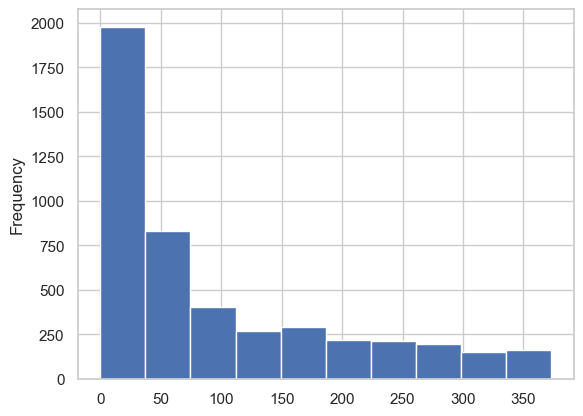

In [111]:
# Membuat DataFrame baru berisi CustomerNo dan selisih hari dari transaksi terakhir
df_recency = latest_trx_per_customer[['CustomerNo','days_to_today']]
# Membuat histogram dari distribusi nilai recency (days_to_today)
df_recency['days_to_today'].plot(kind='hist')

In [112]:
# Membagi kolom days_to_today menjadi 3 kuantil dan memberikan label kategori untuk setiap kelompok:
# 'Recently' = pelanggan dengan transaksi paling baru
# 'Normal' = pelanggan dengan recency sedang
# 'Long' = pelanggan yang sudah lama tidak transaksi
df_recency['R_score'] = pd.qcut(df_recency['days_to_today'], 3, labels=['Recently', 'Normal', 'Long'])
# Menampilkan DataFrame df_recency yang kini berisi CustomerNo, days_to_today, dan R_score
df_recency

C:\Users\W10\AppData\Local\Temp\ipykernel_13476\3619873261.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recency['R_score'] = pd.qcut(df_recency['days_to_today'], 3, labels=['Recently', 'Normal', 'Long'])


,CustomerNo,days_to_today,R_score
520283,15350.0,373,Long
519426,12791.0,373,Long
519713,16583.0,373,Long
519807,17968.0,373,Long
519572,17908.0,373,Long
...,...,...,...
903,12423.0,0,Recently
868,15492.0,0,Recently
1030,17497.0,0,Recently
1069,14498.0,0,Recently


In [113]:
df_recency['R_score'].value_counts()

R_score
Recently    1606
Long        1560
Normal      1539
Name: count, dtype: int64

In [114]:
# Mengelompokkan data berdasarkan kategori recency (R_score)
# Lalu menghitung statistik ringkasan untuk setiap grup:
# - nilai minimum, maksimum, rata-rata, dan median dari days_to_today
# - serta jumlah pelanggan dalam tiap segmen
df_recency.groupby('R_score').agg({'days_to_today': ['min', 'max', 'mean', 'median', 'count']})

C:\Users\W10\AppData\Local\Temp\ipykernel_13476\1033201704.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_recency.groupby('R_score').agg({'days_to_today': ['min', 'max', 'mean', 'median', 'count']})


days_to_today                              
                   min  max        mean median count
R_score                                             
Recently             0   26   11.716065   10.0  1606
Normal              28  101   56.582196   54.0  1539
Long               103  373  221.991667  212.0  1560

### Volume Calculation

<Axes: ylabel='Frequency'>

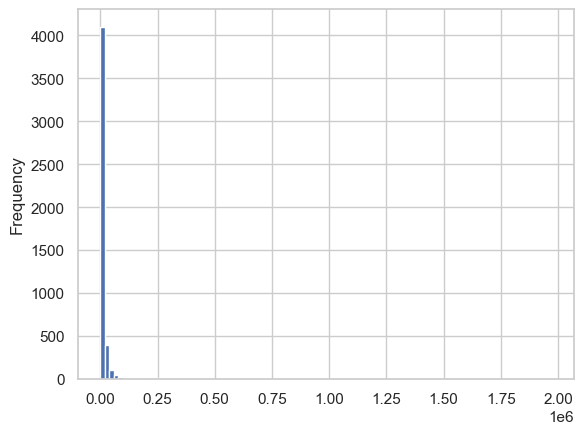

In [115]:
# Mengelompokkan data berdasarkan CustomerNo, lalu menjumlahkan TotalRevenue untuk setiap customer
df_volume = df_sales.groupby('CustomerNo').agg({'TotalRevenue': 'sum'})
# Membuat histogram untuk melihat distribusi total revenue per customer
# Menggunakan 100 bins untuk resolusi yang lebih halus
df_volume['TotalRevenue'].plot(kind='hist', bins=100)

In [116]:
# Membagi pelanggan menjadi 3 segmen berdasarkan total revenue (TotalRevenue)
# Menggunakan qcut untuk membuat pembagian kuantil yang seimbang jumlahnya
# Label 'Low', 'Medium', dan 'High' diberikan untuk menunjukkan kontribusi revenue masing-masing pelanggan
df_volume['V_score'] = pd.qcut(df_volume['TotalRevenue'], 3, labels=['Low', 'Medium', 'High'])
# Menampilkan DataFrame df_volume yang kini berisi TotalRevenue dan V_score
df_volume

,TotalRevenue,V_score
CustomerNo,,
12004.0,1509.60,Low
12006.0,24.76,Low
12008.0,5689.57,Medium
12013.0,69.96,Low
12024.0,149.52,Low
...,...,...
18280.0,623.26,Low
18281.0,576.58,Low
18282.0,1044.86,Low


In [117]:
df_volume['V_score'].value_counts()

V_score
Low       1569
High      1569
Medium    1567
Name: count, dtype: int64

In [118]:
# Mengelompokkan data pelanggan berdasarkan segmen V_score (Low, Medium, High)
# Lalu menghitung statistik deskriptif untuk total revenue pada setiap segmen:
# - nilai minimum, maksimum, rata-rata, median, dan jumlah pelanggan
df_volume.groupby('V_score').agg({'TotalRevenue': ['min', 'max', 'mean', 'median', 'count']})

C:\Users\W10\AppData\Local\Temp\ipykernel_13476\382475074.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_volume.groupby('V_score').agg({'TotalRevenue': ['min', 'max', 'mean', 'median', 'count']})


TotalRevenue                                          
                 min         max          mean    median count
V_score                                                       
Low             5.97     2537.87   1241.339509   1221.82  1569
Medium       2540.88     8436.83   4967.746592   4702.06  1567
High         8446.80  1970168.43  29600.881313  16261.94  1569

### Frequency Calculation

<Axes: ylabel='Frequency'>

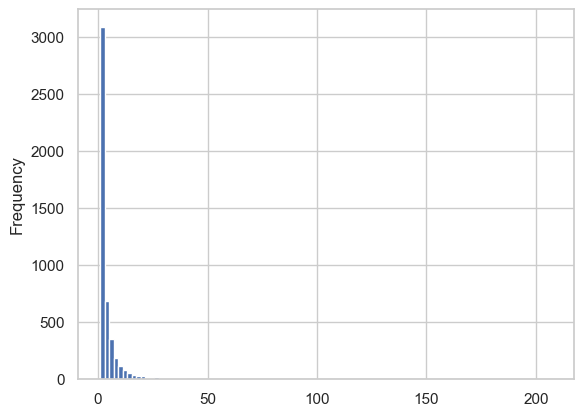

In [119]:
# Mengelompokkan data berdasarkan CustomerNo dan menghitung jumlah transaksi unik tiap pelanggan
df_frequency = df_sales.groupby('CustomerNo').agg({'TransactionNo': 'nunique'})
# Membuat histogram untuk melihat distribusi frekuensi transaksi pelanggan
# Menggunakan 100 bins untuk detail lebih halus
df_frequency['TransactionNo'].plot(kind='hist', bins=100)

### Permasalahan pada Perhitungan `F_score` dengan `pd.qcut`

Ketika menggunakan `pd.qcut` untuk menghitung `F_score`, muncul error sebagai berikut:

ValueError: Bin edges must be unique: Index([1.0, 1.0, 3.0, 176.0], dtype='float64', name='TransactionNo').
You can drop duplicate edges by setting the 'duplicates' kwarg

In [120]:
# Mengelompokkan pelanggan berdasarkan jumlah transaksi (TransactionNo)
# ke dalam 3 kategori: Low (0–5), Medium (6–25), dan High (>25)
# Menggunakan pd.cut untuk membuat batas nilai absolut, bukan kuantil
df_frequency['F_score'] = pd.cut(df_frequency['TransactionNo'], bins=[0, 5, 25, np.Inf], labels=['Low', 'Medium', 'High'], right=True)

In [121]:
# Cek hasil
df_frequency

,TransactionNo,F_score
CustomerNo,,
12004.0,1,Low
12006.0,1,Low
12008.0,1,Low
12013.0,1,Low
12024.0,1,Low
...,...,...
18280.0,1,Low
18281.0,1,Low
18282.0,2,Low


In [122]:
df_frequency['F_score'].value_counts()

F_score
Low       3773
Medium     867
High        65
Name: count, dtype: int64

In [123]:
df_frequency.groupby('F_score').agg({'TransactionNo':['min','max','mean','median','count']})

C:\Users\W10\AppData\Local\Temp\ipykernel_13476\874623131.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_frequency.groupby('F_score').agg({'TransactionNo':['min','max','mean','median','count']})


TransactionNo                             
                  min  max       mean median count
F_score                                           
Low                 1    5   2.162735    2.0  3773
Medium              6   25   9.838524    8.0   867
High               26  207  45.938462   34.0    65

### Penggabungan Ketiga Komponen

In [124]:
df_recency.head(2)

,CustomerNo,days_to_today,R_score
520283,15350.0,373,Long
519426,12791.0,373,Long


In [125]:
df_frequency.head(2)

,TransactionNo,F_score
CustomerNo,,
12004.0,1,Low
12006.0,1,Low


In [126]:
df_volume.head(2)

,TotalRevenue,V_score
CustomerNo,,
12004.0,1509.60,Low
12006.0,24.76,Low


In [127]:
df_recency.set_index('CustomerNo')['R_score']

CustomerNo
15350.0        Long
12791.0        Long
16583.0        Long
17968.0        Long
17908.0        Long
             ...   
12423.0    Recently
15492.0    Recently
17497.0    Recently
14498.0    Recently
17490.0    Recently
Name: R_score, Length: 4705, dtype: category
Categories (3, object): ['Recently' < 'Normal' < 'Long']

In [128]:
recency = df_recency.set_index('CustomerNo')['R_score']
volume = df_volume['V_score']
frequency = df_frequency['F_score']

In [129]:
df_rfm = pd.concat([recency, volume, frequency], axis=1)

In [130]:
df_rfm

,R_score,V_score,F_score
CustomerNo,,,
15350.0,Long,Low,Low
12791.0,Long,Low,Low
16583.0,Long,Low,Low
17968.0,Long,Low,Low
17908.0,Long,Low,Low
...,...,...,...
12423.0,Recently,High,Medium
15492.0,Recently,High,Low
17497.0,Recently,High,Low


In [131]:
df_rfm.value_counts()

R_score   V_score  F_score
Long      Low      Low        854
Normal    Medium   Low        567
Recently  High     Medium     547
Long      Medium   Low        499
Normal    Low      Low        419
Recently  Medium   Low        400
Normal    High     Low        326
Recently  Low      Low        289
          High     Low        247
Normal    High     Medium     190
Long      High     Low        172
Recently  High     High        62
          Medium   Medium      57
Normal    Medium   Medium      35
Long      High     Medium      23
          Medium   Medium       8
Recently  Low      Medium       3
Long      Low      Medium       3
Normal    High     High         1
          Low      Medium       1
Recently  Medium   High         1
Long      High     High         1
Name: count, dtype: int64

C:\Users\W10\AppData\Local\Temp\ipykernel_13476\1291425655.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_rfm_counts, x='Segment', y='count', palette='viridis')


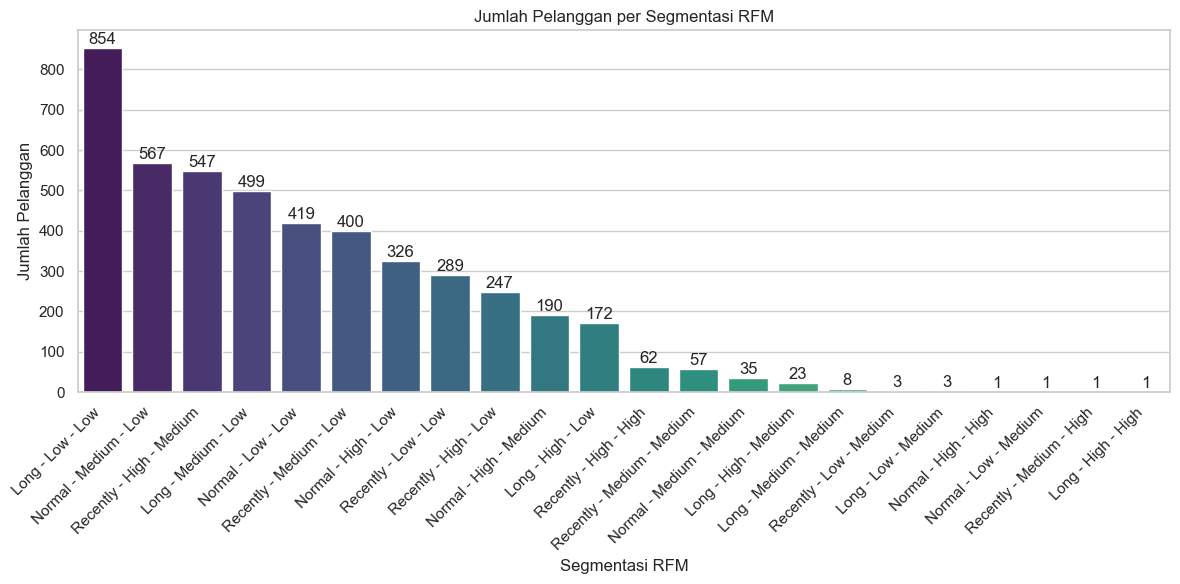

In [132]:
# Asumsikan hasil dari value_counts()
df_rfm_counts = df_rfm.value_counts().reset_index()
df_rfm_counts.columns = ['R_score', 'V_score', 'F_score', 'count']

# Konversi ke string dulu sebelum digabung
df_rfm_counts['Segment'] = (
    df_rfm_counts['R_score'].astype(str) + ' - ' +
    df_rfm_counts['V_score'].astype(str) + ' - ' +
    df_rfm_counts['F_score'].astype(str)
)

# Urutkan berdasarkan jumlah pelanggan terbanyak
df_rfm_counts = df_rfm_counts.sort_values(by='count', ascending=False)

# Plot bar chart
plt.figure(figsize=(12,6))
sns.barplot(data=df_rfm_counts, x='Segment', y='count', palette='viridis')
# Tambahkan angka di atas bar
for i, row in df_rfm_counts.iterrows():
    plt.text(x=i, y=row['count'] + 10, s=row['count'], ha='center')
plt.title('Jumlah Pelanggan per Segmentasi RFM')
plt.xlabel('Segmentasi RFM')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# K-means untuk menentukan jumlah cluster segmentasi pelanggan

**Metode K-Means**

Metode K-Means Clustering dipilih karena memiliki efisiensi yang tinggi dan sesuai untuk data numerik seperti Recency, Frequency, dan Monetary (RFM) dalam analisis segmentasi pelanggan. Algoritma ini memungkinkan pengelompokan data berdasarkan kemiripan karakteristik, sehingga membantu dalam mengidentifikasi kelompok pelanggan dengan perilaku serupa. Hasil segmentasi yang dihasilkan mudah diinterpretasikan dan dapat dijadikan dasar dalam perumusan strategi pemasaran yang lebih efektif.

**Silhouette Score**

Untuk memastikan kualitas segmentasi, digunakan Silhouette Score sebagai metode validasi. Silhouette Score mengukur seberapa baik setiap data sesuai dengan klusternya dibandingkan dengan kluster lain. Nilai yang mendekati 1 menunjukkan bahwa kluster terbentuk dengan baik dan memiliki pemisahan yang jelas. Dengan demikian, metode ini membantu menjamin bahwa segmentasi yang dilakukan tidak hanya akurat secara teknis, tetapi juga relevan secara analitis.

In [133]:
# Membuat Series recency_rfm dengan menggunakan kolom 'CustomerNo' sebagai index
# dan 'days_to_today' sebagai nilai. Ini berguna agar data recency dapat diakses berdasarkan CustomerNo.
recency_rfm = df_recency.set_index('CustomerNo')['days_to_today']  # karena data df_recency sudah memiliki index, pada script ini index diatur menggunakan CustomerID
# Mengambil kolom 'TotalRevenue' dari dataframe df_volume dan menyimpannya ke dalam volume_rfm.
# Kolom ini merepresentasikan total pendapatan (revenue) tiap customer.
volume_rfm = df_volume['TotalRevenue']
# Mengambil kolom 'TransactionNo' dari dataframe df_frequency dan menyimpannya ke dalam frequency_rfm.
# Kolom ini merepresentasikan jumlah transaksi yang dilakukan oleh tiap customer.
frequency_rfm = df_frequency['TransactionNo']

In [134]:
# Menggabungkan tiga Series (recency_rfm, frequency_rfm, volume_rfm) menjadi satu DataFrame secara horizontal (axis=1)
rfm = pd.concat([recency_rfm, frequency_rfm, volume_rfm], axis=1)
# Mengganti nama kolom DataFrame hasil gabungan menjadi "Recency", "Frequency", dan "Monetary"
rfm.columns = ["Recency", "Frequency", "Monetary"]
# Menampilkan DataFrame rfm yang berisi ketiga metrik utama RFM untuk setiap customer
rfm

,Recency,Frequency,Monetary
CustomerNo,,,
15350.0,373,1,641.16
12791.0,373,1,1166.40
16583.0,373,1,1376.86
17968.0,373,1,1794.93
17908.0,373,1,1945.66
...,...,...,...
12423.0,0,9,14766.41
15492.0,0,3,18230.28
17497.0,0,2,16965.09


In [135]:
# Mengecek jumlah nilai yang hilang (NaN) di setiap kolom pada DataFrame rfm
rfm.isna().sum()

Recency      0
Frequency    0
Monetary     0
dtype: int64

In [136]:
# Import StandardScaler dari library scikit-learn untuk melakukan standardisasi data
from sklearn.preprocessing import StandardScaler
# Membuat objek scaler dari StandardScaler
scaler = StandardScaler()
# Melakukan fitting dan transformasi pada DataFrame rfm untuk menstandarisasi nilai-nilai pada setiap kolom
# Standarisasi mengubah data sehingga memiliki mean = 0 dan standar deviasi = 1
scaled = scaler.fit_transform(rfm)

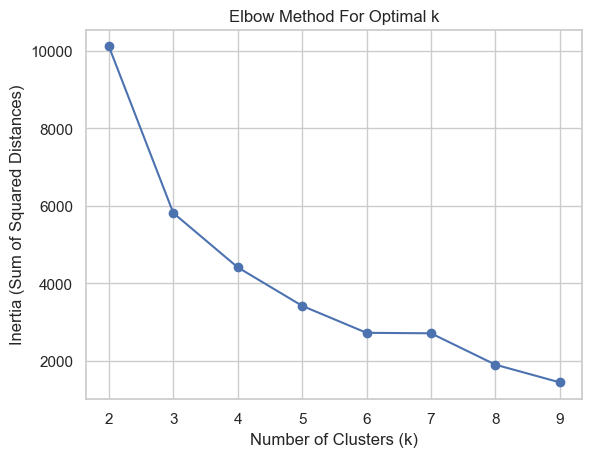

In [137]:
# Import KMeans dari scikit-learn untuk melakukan clustering
from sklearn.cluster import KMeans
# Membuat list kosong untuk menyimpan nilai inertia (jumlah kuadrat jarak ke centroid) untuk tiap jumlah klaster
list_sum_distance = []
# Melakukan iterasi untuk jumlah klaster k dari 2 sampai 9
for k in range(2, 10):
    # Membuat model KMeans dengan k klaster dan n_init='auto' untuk inisialisasi centroid secara otomatis
    model = KMeans(n_clusters=k, n_init='auto')
    # Melatih model KMeans pada data yang sudah distandarisasi
    model.fit(scaled)
    # Mengambil nilai inertia, yaitu total jarak kuadrat titik data ke centroid terdekat
    inertia = model.inertia_
    # Menyimpan nilai inertia ke dalam list
    list_sum_distance.append(inertia)
# Membuat plot grafik inertia terhadap jumlah klaster k
# Grafik ini digunakan untuk menentukan jumlah klaster optimal dengan metode elbow
plt.plot(range(2, 10), list_sum_distance, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method For Optimal k')
plt.show()

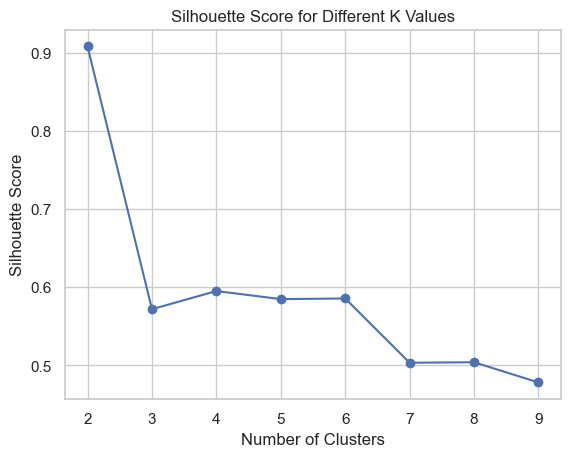

In [138]:
# Import silhouette_score untuk mengukur kualitas klaster dan KMeans untuk clustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
# Membuat list kosong untuk menyimpan nilai silhouette score untuk tiap jumlah klaster
list_silhouette = []
# Melakukan iterasi untuk jumlah klaster k dari 2 sampai 9
for k in range(2, 10):
    # Membuat model KMeans dengan k klaster dan n_init=10 (jumlah inisialisasi centroid)
    model = KMeans(n_clusters=k, n_init=10)
    # Melatih model KMeans pada data yang sudah distandarisasi
    model.fit(scaled)
    # Mendapatkan label klaster hasil clustering
    cluster = model.labels_
    # Menghitung silhouette score yang mengukur seberapa baik pemisahan klaster
    score = silhouette_score(scaled, cluster)
    # Menyimpan nilai silhouette score ke dalam list
    list_silhouette.append(score)
# Membuat plot grafik silhouette score terhadap jumlah klaster k
# Grafik ini membantu menentukan jumlah klaster optimal berdasarkan skor silhouette tertinggi
plt.plot(range(2, 10), list_silhouette, marker="o")
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different K Values')
plt.show()

Berdasarkan Elbow Method dan Silhoutte Score ada 4 jumlah cluster.

In [139]:
# KMeans dengan random_state untuk hasil tetap, dan n_init ditetapkan
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
kmeans.fit(scaled)
rfm['Clusters'] = (kmeans.labels_ + 1)
rfm

,Recency,Frequency,Monetary,Clusters
CustomerNo,,,,
15350.0,373,1,641.16,1
12791.0,373,1,1166.40,1
16583.0,373,1,1376.86,1
17968.0,373,1,1794.93,1
17908.0,373,1,1945.66,1
...,...,...,...,...
12423.0,0,9,14766.41,2
15492.0,0,3,18230.28,2
17497.0,0,2,16965.09,2


In [140]:
# Tambahkan kolom cluster ke df_rfm
df_rfm['Clusters'] = kmeans.labels_

In [141]:
# Menampilkan nilai rata-rata dari cluster_final
cluster_final = rfm.groupby(['Clusters'])[['Recency', 'Frequency', 'Monetary']].mean()
cluster_final

,Recency,Frequency,Monetary
Clusters,,,
1,245.606518,1.550079,3453.393410
2,44.037771,3.599622,8891.640828
3,4.538462,83.692308,661304.735385
4,12.696498,20.241245,58310.622568


In [142]:
# Menampilkan daftar nama kolom pada DataFrame rfm
print(rfm.columns)
# Menampilkan daftar nama kolom pada DataFrame df_rfm
print(df_rfm.columns)

Index(['Recency', 'Frequency', 'Monetary', 'Clusters'], dtype='object')
Index(['R_score', 'V_score', 'F_score', 'Clusters'], dtype='object')


In [143]:
# Buat mapping label berdasarkan hasil interpretasi
cluster_labels = {
    1: 'Lost Customers',              # Cluster dengan recency tinggi, freq rendah, monetary rendah
    2: 'Potential Loyalist',          # Cluster dengan recency sedang, freq sedang, monetary sedang
    3: 'Top Customers',               # Cluster dengan recency sangat rendah, freq sangat tinggi, monetary sangat tinggi
    4: 'High Value Customers'         # Cluster dengan recency rendah, freq tinggi, monetary tinggi
}

# Tambahkan kolom segment ke masing-masing DF
rfm['Segment_Customer'] = rfm['Clusters'].map(cluster_labels)
df_rfm['Segment_Customer'] = df_rfm['Clusters'].map(cluster_labels)

# Pisahkan tiap segmen ke DataFrame berbeda berdasarkan 'Segment_Customer'
lost_customers         = df_rfm[df_rfm['Segment_Customer'] == 'Lost Customers']
potential_loyalist     = df_rfm[df_rfm['Segment_Customer'] == 'Potential Loyalist']
top_customers          = df_rfm[df_rfm['Segment_Customer'] == 'Top Customers']
high_value_customers   = df_rfm[df_rfm['Segment_Customer'] == 'High Value Customers']

In [144]:
rfm['Segment_Customer'].value_counts()

Segment_Customer
Potential Loyalist      3177
Lost Customers          1258
High Value Customers     257
Top Customers             13
Name: count, dtype: int64

## Rangkuman Segmentasi RFM

Berdasarkan hasil segmentasi menggunakan metode RFM (Recency, Frequency, Monetary), pelanggan dikelompokkan ke dalam 4 klaster sebagai berikut:

| Cluster | Recency (rata-rata) | Frequency (rata-rata) | Monetary (rata-rata) | Segment Customer         | Interpretasi                                                                 |
|---------|---------------------|------------------------|------------------------|---------------------------|------------------------------------------------------------------------------|
| 1       | 245.61              | 1.55                   | 3,453.39               | Lost Customers            | Pelanggan yang sudah lama tidak membeli, jarang belanja, dan nilainya rendah |
| 2       | 44.04               | 3.60                   | 8,891.64               | Potential Loyalist        | Pelanggan dengan pembelian cukup sering dan relatif baru                    |
| 3       | 4.54                | 83.69                  | 661,304.74             | Top Customers             | Pelanggan terbaik: sering belanja, baru-baru ini, dan sangat tinggi nilainya|
| 4       | 12.70               | 20.24                  | 58,310.62              | High Value Customers      | Pelanggan bernilai tinggi, cukup sering dan cukup baru                      |


In [145]:
# df_rfm adalah DataFrame dengan kolom 'CustomerNo' dan 'Segment_Customer'
df_sales = pd.merge(df_sales, rfm, on='CustomerNo', how='left')

# Analisis Lanjutan 

In [146]:
# Statistik ringkasan per segmen
df_sales.groupby('Segment_Customer')[['Recency', 'Frequency', 'Monetary', 'TotalRevenue']].mean()

,Recency,Frequency,Monetary,TotalRevenue
Segment_Customer,,,,
High Value Customers,10.305438,22.661253,66212.676414,142.655618
Lost Customers,237.835052,1.971588,8486.318370,69.578925
Potential Loyalist,35.181269,5.007648,15501.172805,87.041066
Top Customers,2.260816,125.633120,589778.716562,286.107613


In [147]:
# Statistik total revenue per segmen
df_sales.groupby('Segment_Customer')[['TotalRevenue']].sum()

,TotalRevenue
Segment_Customer,
High Value Customers,14985830.00
Lost Customers,4344368.91
Potential Loyalist,28248742.91
Top Customers,8596961.56


Segmen yang paling menguntungkan adalah segmen **Potential Loyalist**

### 5. Based on your findings, what strategy could you recommend to the business to gain more profit?


Selanjutnya untuk mengidentifikasi segmen pelanggan mana yang paling berkontribusi terhadap profit bisnis secara mendalam, serta memahami dinamika perubahan jumlah pelanggan dan nilai transaksi bulanan. Dengan melihat pola pada Monthly Revenue, Average Basket Size (ABS) per segmen customer dan produk, dan performa tiap segmen di berbagai negara, analisis ini dirancang untuk memberikan insight yang dapat digunakan untuk merumuskan strategi peningkatan profit.

## Jumlah Pelanggan dan Total Revenue per Segmen Customer

C:\Users\W10\AppData\Local\Temp\ipykernel_13476\2805560364.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_combined, x='Segment_Customer', y='TotalRevenue', palette=colors, ax=ax1)


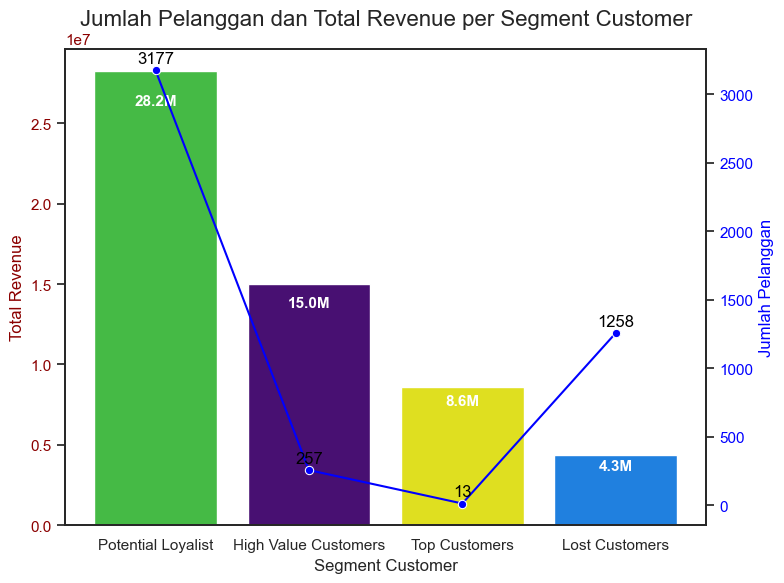

In [148]:
# Set style seaborn ke 'white' agar background polos tanpa grid
sns.set_style('white')

# Jumlah pelanggan per segmen
segment_counts = rfm['Segment_Customer'].value_counts().reset_index()
segment_counts.columns = ['Segment_Customer', 'Customer_Count']

# Total revenue per segmen
total_revenue = df_sales.groupby('Segment_Customer')[['TotalRevenue']].sum().reset_index()

# Gabungkan kedua data berdasarkan Segment_Customer
df_combined = pd.merge(segment_counts, total_revenue, on='Segment_Customer')

# Urutkan berdasarkan TotalRevenue descending
df_combined = df_combined.sort_values('TotalRevenue', ascending=False).reset_index(drop=True)

# Gunakan hex codes untuk warna yang lebih presisi atau nama warna dasar yang dikenal Matplotlib
color_map = {
    'High Value Customers': '#4B0082',  # Ungu tua
    'Lost Customers': '#0080FF',  # Biru cerah 
    'Potential Loyalist': '#32CD32',  # Hijau (Green)
    'Top Customers': '#FFFF00'        # Kuning (Yellow)
}

# Buat list warna sesuai urutan 'Segment_Customer' di df_combined
colors = [color_map[segment] for segment in df_combined['Segment_Customer']]

fig, ax1 = plt.subplots(figsize=(8, 6))

# Set warna latar belakang axes menjadi putih (hilangkan warna abu-abu)
ax1.set_facecolor('white')

# Bar chart untuk TotalRevenue dengan custom palette
sns.barplot(data=df_combined, x='Segment_Customer', y='TotalRevenue', palette=colors, ax=ax1)
ax1.set_ylabel('Total Revenue', color='darkred', fontsize=12)
ax1.set_xlabel('Segment Customer', fontsize=12)
ax1.set_title('Jumlah Pelanggan dan Total Revenue per Segment Customer', fontsize=16)
ax1.tick_params(axis='y', labelcolor='darkred')

def format_angka(x):
    if x >= 1_000_000:
        return f'{x/1_000_000:.1f}M'
    elif x >= 1_000:
        return f'{x/1_000:.0f}K'
    else:
        return str(int(x))

# Tambahkan label nilai TotalRevenue di ujung atas dalam bar
for i, row in df_combined.iterrows():
    ax1.text(i, row.TotalRevenue * 0.95,
             format_angka(row.TotalRevenue),
             ha='center', va='top', fontsize=11, color='white', fontweight='bold')

# Axis kedua untuk jumlah pelanggan
ax2 = ax1.twinx()
ax2.set_facecolor('white')  # juga set background axis kedua jadi putih
sns.lineplot(data=df_combined, x='Segment_Customer', y='Customer_Count', marker='o', sort=False, ax=ax2, color='blue')
ax2.set_ylabel('Jumlah Pelanggan', color='blue', fontsize=12)
ax2.tick_params(axis='y', labelcolor='blue')

# Label jumlah pelanggan di atas titik
for i, row in df_combined.iterrows():
    ax2.text(i, row.Customer_Count + 0.01 * max(df_combined['Customer_Count']), str(row.Customer_Count),
             ha='center', va='bottom', fontsize=12, color='black')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Kesimpulan:

1. **Potential Loyalist**
   - Total Revenue: **28.2M**
   - Jumlah Pelanggan: **3177**
   - Segmen ini memiliki kontribusi revenue tertinggi dan jumlah pelanggan terbanyak.

2. **High Value Customers**
   - Total Revenue: **15.0M**
   - Jumlah Pelanggan: **257**
   - Nilai transaksi per pelanggan tinggi, meskipun jumlah pelanggan sedikit.

3. **Top Customers**
   - Total Revenue: **8.6M**
   - Jumlah Pelanggan: **13**
   - Masing-masing pelanggan memberikan kontribusi revenue yang sangat besar.

4. **Lost Customers**
   - Total Revenue: **4.3M**
   - Jumlah Pelanggan: **1258**
   - Jumlah pelanggan cukup besar, namun kontribusi per pelanggan rendah.

---


## Monthly Revenue per Segmen Customer 

Text(0.5, 1.0, 'Perubahan Jumlah Customer per Cluster Setiap Bulan')

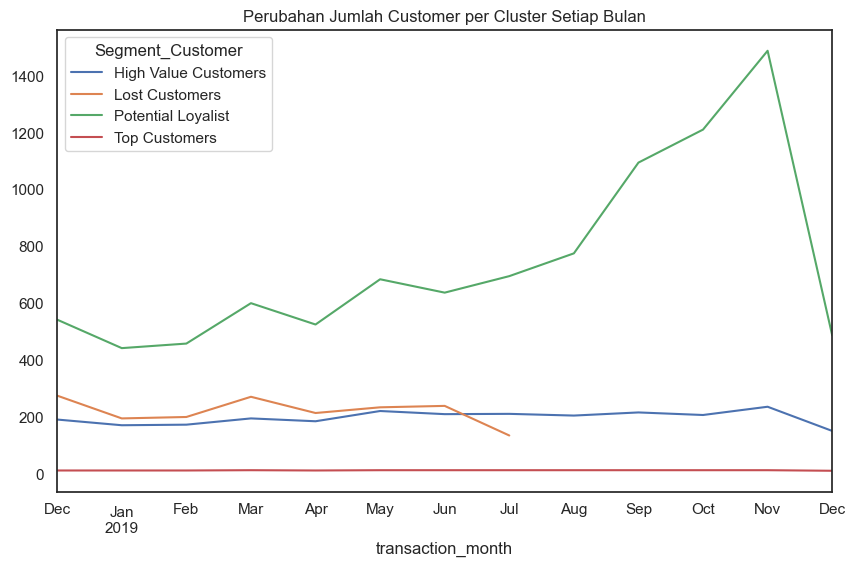

In [149]:
# Cluster per bulan
monthly_cluster = df_sales.groupby(['transaction_month', 'Segment_Customer'])['CustomerNo'].nunique().unstack()
monthly_cluster.plot(kind='line', figsize=(10,6))
plt.title("Perubahan Jumlah Customer per Cluster Setiap Bulan")

Terlihat jelas bahwa klaster **Potential Loyalist** mengalami peningkatan jumlah pelanggan yang signifikan, terutama pada akhir tahun. Sementara itu, klaster **High Value Customers** dan **Top Customers** menunjukkan jumlah pelanggan yang relatif stabil. Sedangkan **Lost Customers** hanya bertahan sampai Juli.

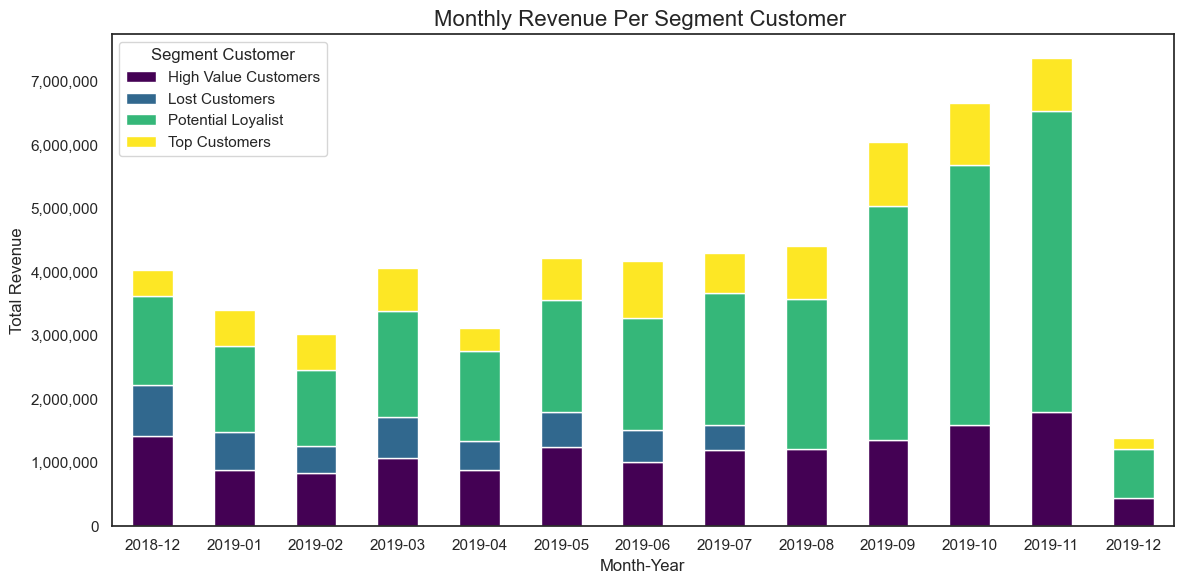

In [150]:
# Daily revenue by segmen customer 
monthly_revenue_segment = df_sales.groupby(['YearMonth', 'Segment_Customer'])['TotalRevenue'].sum().unstack()

# Visualisasi
# Plot stacked bar chart dengan colormap
ax = monthly_revenue_segment.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    colormap='viridis'  
)
plt.title('Monthly Revenue Per Segment Customer ', fontsize=16)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.legend(title='Segment Customer')
plt.xticks(rotation=0)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.tight_layout()
plt.show()

Total pendapatan menunjukkan tren peningkatan yang signifikan dari pertengahan 2019 hingga akhir tahun, dengan puncaknya pada November 2019. Segmen **Potential Loyalist** menjadi kontributor pendapatan terbesar, terutama pada bulan-bulan dengan pendapatan tertinggi. Segmen **High Value Customers** juga memberikan kontribusi yang konsisten, namun cenderung stabil atau sedikit menurun proporsinya seiring waktu. Segmen **Top Customers** memberikan kontribusi yang lebih kecil namun stabil, sedangkan **Lost Customers** memiliki kontribusi paling minim terhadap total pendapatan.

In [151]:
summary = df_sales.groupby('Segment_Customer').agg({
    'CustomerNo': pd.Series.nunique,
    'TransactionNo': 'count',
    'TotalRevenue': 'sum'
}).rename(columns={
    'CustomerNo': 'Unique Customers',
    'TransactionNo': 'Total Transactions',
    'TotalRevenue': 'Total Revenue'
}).sort_values(by='Total Revenue', ascending=False)

print(summary)

                      Unique Customers  Total Transactions  Total Revenue
Segment_Customer                                                         
Potential Loyalist                3177              324545    28248742.91
High Value Customers               257              105049    14985830.00
Top Customers                       13               30048     8596961.56
Lost Customers                    1258               62438     4344368.91


In [152]:
# Melihat jumlah unique customer
jumlah_customer = df_sales['CustomerNo'].nunique()
print(f"Jumlah unique customer: {jumlah_customer}")

Jumlah unique customer: 4705


## Monthly Average Basket Size per Segmen Customer 

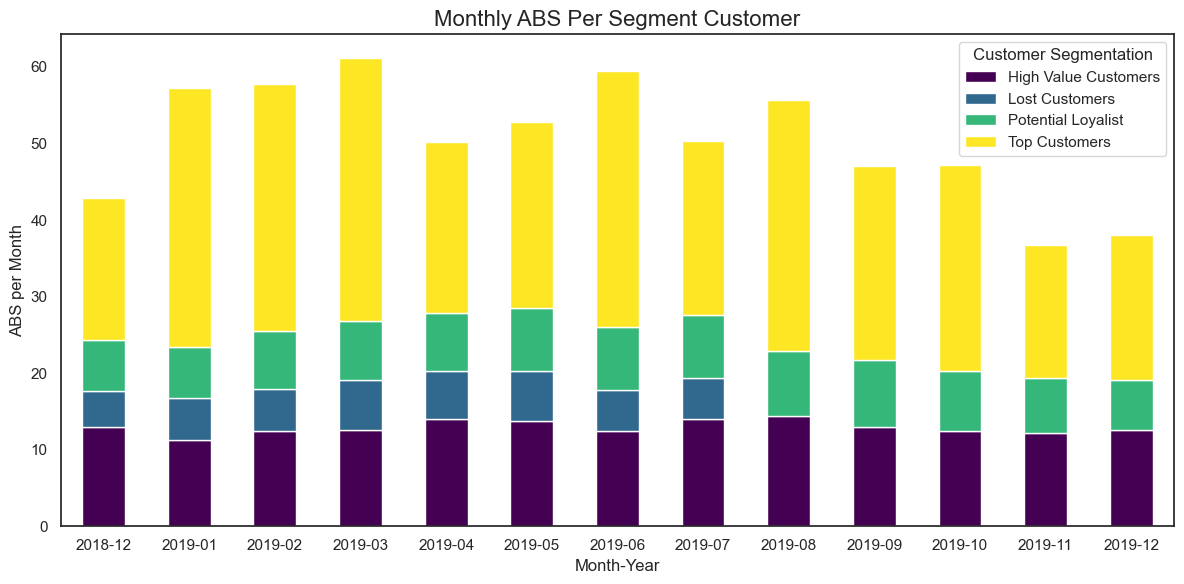

In [153]:
# Average Basket Size per segmen customer 
basket_size_customer_segment = df_sales.groupby(['YearMonth','Segment_Customer'])['Quantity'].mean().unstack()

# Visualizsasi
# Plot stacked bar chart
basket_size_customer_segment.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Monthly ABS Per Segment Customer', fontsize=16)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('ABS per Month', fontsize=12)
plt.legend(title='Customer Segmentation')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Nilai ABS bulanan didominasi oleh segmen **Top Customers**, yang secara konsisten menyumbang bagian terbesar dari nilai tersebut di setiap bulan. Segmen **Potential Loyalist** dan **High Value Customers** juga memberikan kontribusi yang signifikan dan relatif stabil. Sementara itu, segmen **Lost Customers** menunjukkan kontribusi yang paling kecil. Ini mengindikasikan bahwa meskipun **Top Customers** mungkin bukan segmen dengan jumlah pelanggan terbanyak atau pendapatan total terbesar (seperti yang terlihat di grafik sebelumnya), mereka memiliki nilai rata-rata transaksi (atau pembelian) yang sangat tinggi per individu.

## Monthly Average Basket Size per Kategori Produk

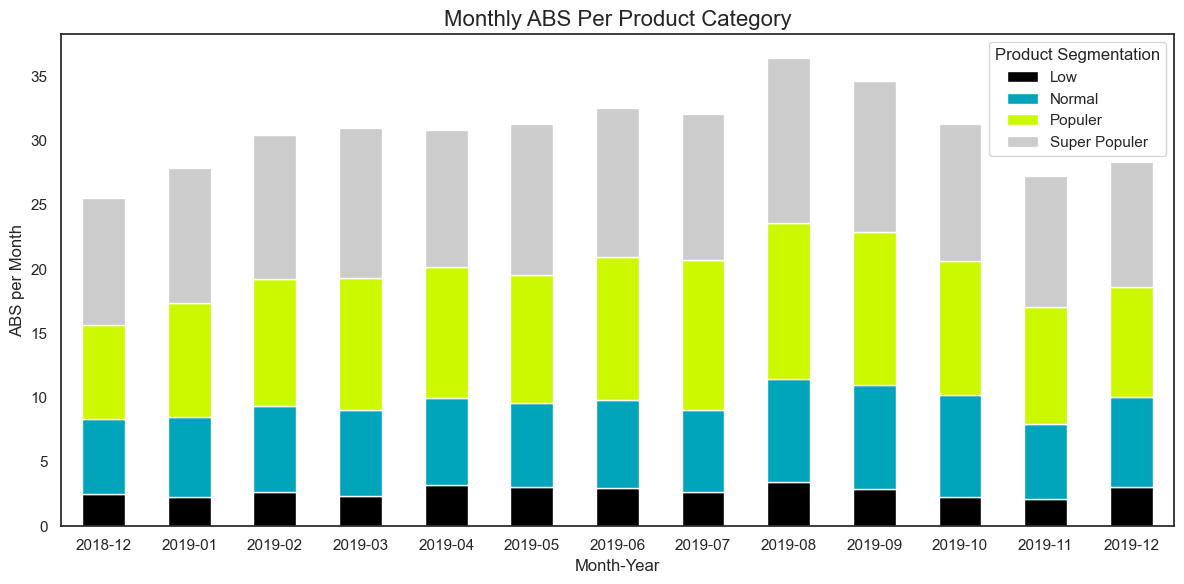

In [154]:
# Average Basket Size per kategori produk 
basket_size_product_category = df_sales.groupby(['YearMonth','FinalSegment'])['Quantity'].mean().unstack()

# Visualissi
# Plot stacked bar chart
basket_size_product_category.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='nipy_spectral')
plt.title('Monthly ABS Per Product Category', fontsize=16)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('ABS per Month', fontsize=12)
plt.legend(title='Product Segmentation')
plt.xticks(rotation=0)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.tight_layout()
plt.show()

Kategori produk **Super Popular** secara konsisten memberikan kontribusi terbesar terhadap nilai ABS bulanan memiliki nilai transaksi yang tinggi per pembelian. Kategori **Popular** juga memberikan kontribusi signifikan dan relatif stabil, berada di bawah **Super Popular**. Sementara itu, kategori **Normal** dan **Low** memiliki kontribusi yang lebih kecil.

## Pendapatan Tertinggi per Kategori Produk pada Setiap Kategori Customer

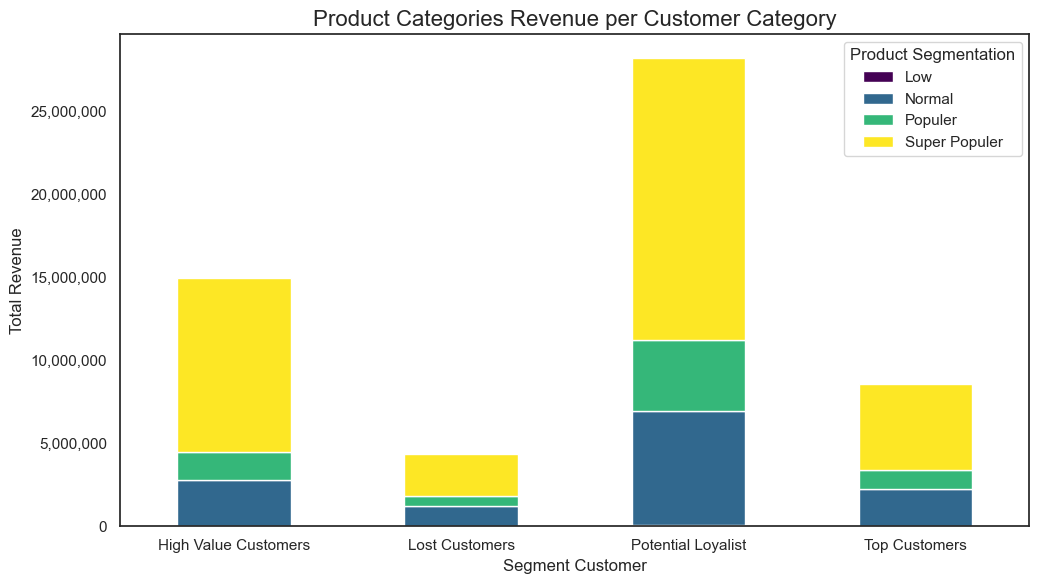

In [155]:
# Counting the number of product categories per customer category
product_category_revenue_per_customer = df_sales.groupby(['Segment_Customer', 'FinalSegment'])['TotalRevenue'].sum().unstack()

# Visualization
# Plot stacked bar chart
product_category_revenue_per_customer.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Product Categories Revenue per Customer Category', fontsize=16)
plt.xlabel('Segment Customer', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.legend(title='Product Segmentation')
plt.xticks(rotation=0)
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

- **Potential Loyalist** adalah segmen pelanggan yang paling dominan dalam menghasilkan pendapatan, terutama dari produk **Super Popular**.
- Produk **Super Popular** adalah pendorong utama pendapatan di hampir semua segmen pelanggan.
- **Lost Customers** memiliki kontribusi pendapatan terendah.
- Fokus pada promosi produk **Super Popular** sangat penting untuk meningkatkan pendapatan.

## Segmentasi Pelanggan & Produk per Negara

In [156]:
# Ambil data pelanggan unik: pastikan hanya ambil CustomerNo dan segmentasinya
unique_customers = df_sales[['CustomerNo', 'Country', 'Segment_Customer']].drop_duplicates()

# Hitung jumlah pelanggan unik per negara per segmen
rfm_by_country = unique_customers.groupby(['Country', 'Segment_Customer']).size().unstack(fill_value=0)

# Tampilkan hasil
rfm_by_country

Segment_Customer,High Value Customers,Lost Customers,Potential Loyalist,Top Customers
Country,,,,
Australia,1,2,5,1
Austria,0,1,5,0
Bahrain,0,2,0,0
Belgium,0,6,16,0
Brazil,0,1,0,0
Canada,0,2,1,0
Channel Islands,0,2,5,0
Cyprus,0,2,4,0
Czech Republic,0,0,1,0


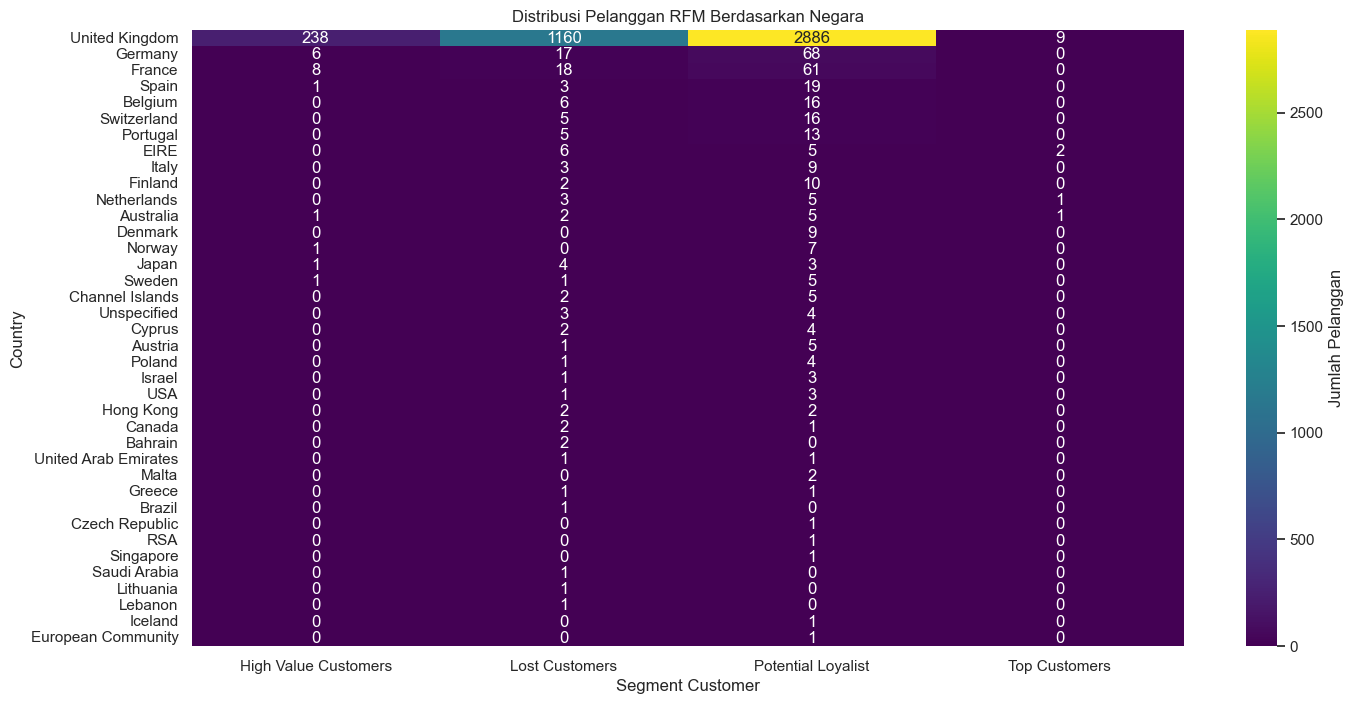

In [157]:
# Ambil data pelanggan unik: pastikan hanya ambil CustomerNo dan segmentasinya
unique_customers = df_sales[['CustomerNo', 'Country', 'Segment_Customer']].drop_duplicates()

# Hitung jumlah pelanggan unik per negara per segmen
rfm_by_country = unique_customers.groupby(['Country', 'Segment_Customer']).size().unstack(fill_value=0)

# Urutkan berdasarkan total jumlah pelanggan per negara
rfm_by_country['Total'] = rfm_by_country.sum(axis=1)
rfm_by_country = rfm_by_country.sort_values(by='Total', ascending=False)
rfm_by_country = rfm_by_country.drop(columns='Total')  # Hapus kolom total agar tidak muncul di heatmap

# Membuat heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(rfm_by_country, annot=True, cmap='viridis', fmt='d', cbar_kws={'label': 'Jumlah Pelanggan'})
plt.title('Distribusi Pelanggan RFM Berdasarkan Negara')
plt.xlabel('Segment Customer')
plt.ylabel('Country')
plt.show()

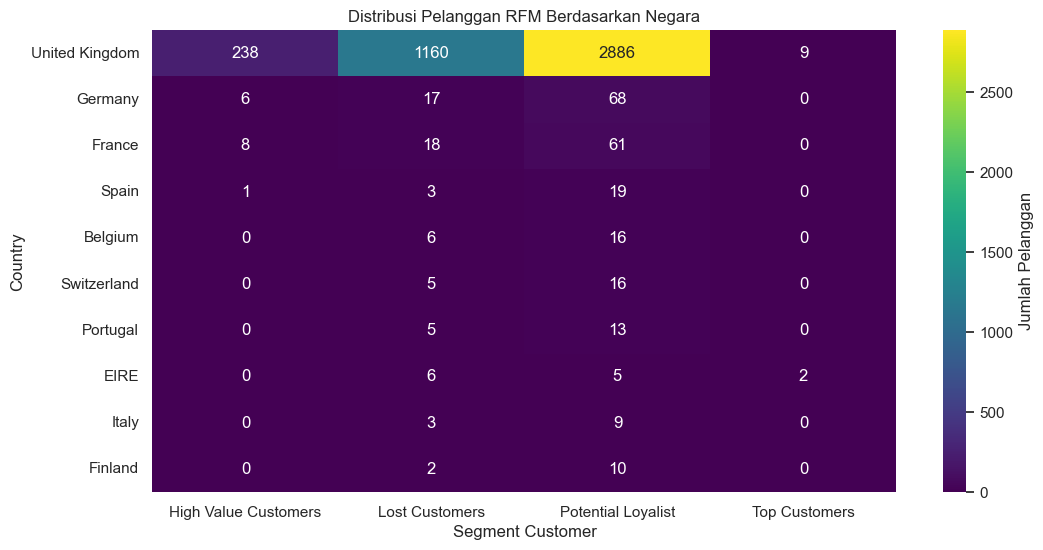

In [158]:
# Ambil data pelanggan unik: pastikan hanya ambil CustomerNo dan segmentasinya
unique_customers = df_sales[['CustomerNo', 'Country', 'Segment_Customer']].drop_duplicates()

# Hitung jumlah pelanggan unik per negara per segmen
rfm_by_country = unique_customers.groupby(['Country', 'Segment_Customer']).size().unstack(fill_value=0)

# Menghitung total pelanggan per negara dan memilih 10 negara teratas
top_10_countries = rfm_by_country.sum(axis=1).sort_values(ascending=False).head(10).index

# Filter hanya untuk 10 negara teratas
rfm_top_countries = rfm_by_country.loc[top_10_countries]

# Membuat heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(rfm_top_countries, annot=True, cmap='viridis', fmt='d', cbar_kws={'label': 'Jumlah Pelanggan'})
plt.title('Distribusi Pelanggan RFM Berdasarkan Negara')
plt.xlabel('Segment Customer')
plt.ylabel('Country')
plt.show()

## Kesimpulan Analisis Distribusi Pelanggan RFM Berdasarkan Negara

1. **Dominasi Pelanggan dari United Kingdom**
   - Mayoritas pelanggan berasal dari United Kingdom dengan total:
     - 2.886 pelanggan tergolong **Potential Loyalist**
     - 1.160 pelanggan termasuk **Lost Customers**
     - 238 pelanggan sebagai **High Value Customers**
     - 9 pelanggan adalah **Top Customers**
   - Hal ini menunjukkan bahwa UK merupakan pasar utama dengan basis pelanggan yang besar.

2. **Negara-negara Lain Berkontribusi Kecil**
   - Negara-negara seperti Jerman, Prancis, Spanyol, Belgia, dan Portugal memiliki jumlah pelanggan yang jauh lebih kecil dibanding UK.
   - Misalnya, Jerman hanya memiliki 68 Potential Loyalist dan tidak ada pelanggan pada kategori Top Customers.

3. **Kategori 'Potential Loyalist' Mendominasi**
   - Di hampir semua negara, kategori pelanggan terbanyak adalah **Potential Loyalist**, yang berarti mereka berpotensi menjadi pelanggan setia jika dikelola dengan baik.
   - Namun, kategori **Top Customers** sangat sedikit dan hanya muncul di UK.
---

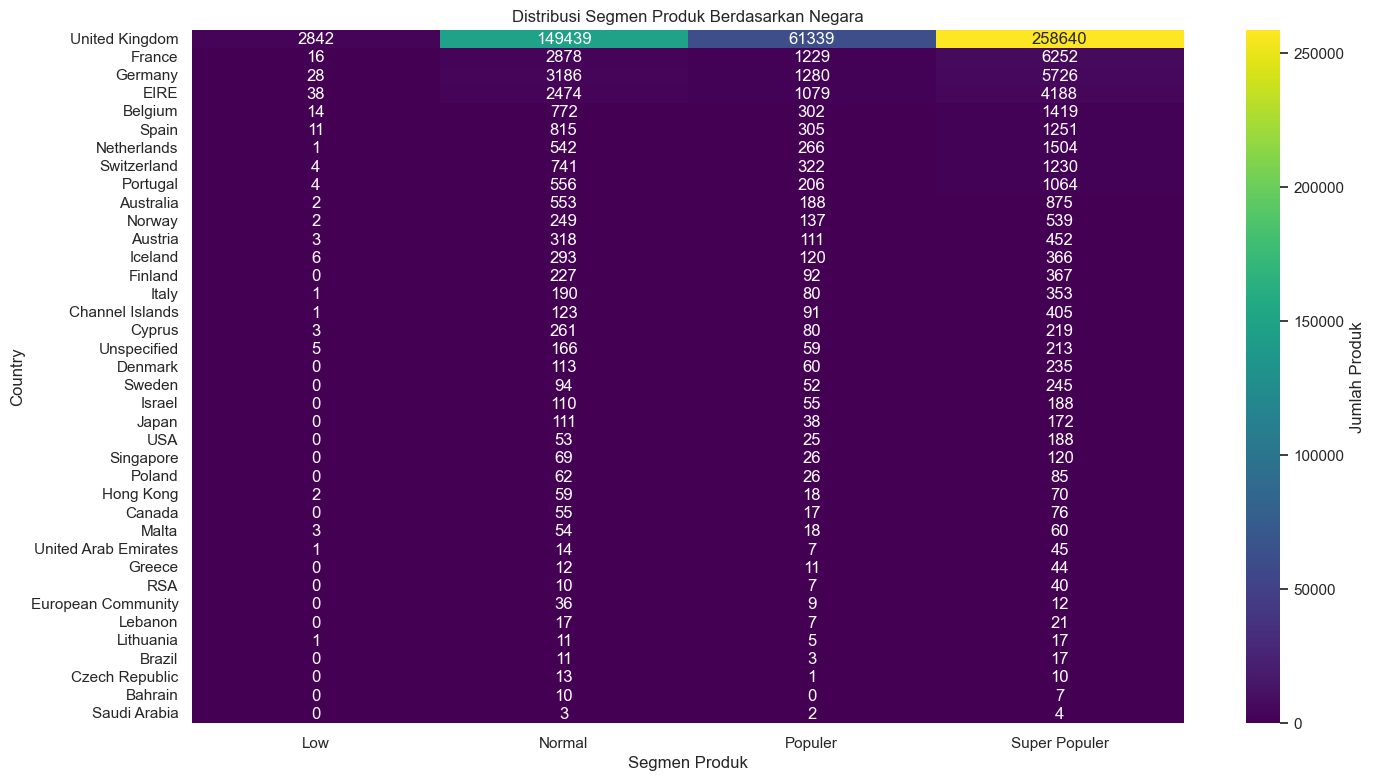

In [159]:
# Mengelompokkan data berdasarkan 'Country' dan 'FinalSegment', hitung jumlah produk
segmen_product_by_country = df_sales.groupby(['Country', 'FinalSegment']).size().unstack(fill_value=0)

# Urutkan negara berdasarkan total produk (jumlah seluruh segmen)
total_produk_per_country = segmen_product_by_country.sum(axis=1).sort_values(ascending=False)

# Urutkan DataFrame segmen_product_by_country sesuai urutan negara berdasarkan total produk
segmen_product_by_country = segmen_product_by_country.loc[total_produk_per_country.index]

# Membuat heatmap
plt.figure(figsize=(16, 9))
sns.heatmap(segmen_product_by_country, annot=True, cmap='viridis', fmt='d', cbar_kws={'label': 'Jumlah Produk'})
plt.title('Distribusi Segmen Produk Berdasarkan Negara')
plt.xlabel('Segmen Produk')
plt.ylabel('Country')
plt.show()

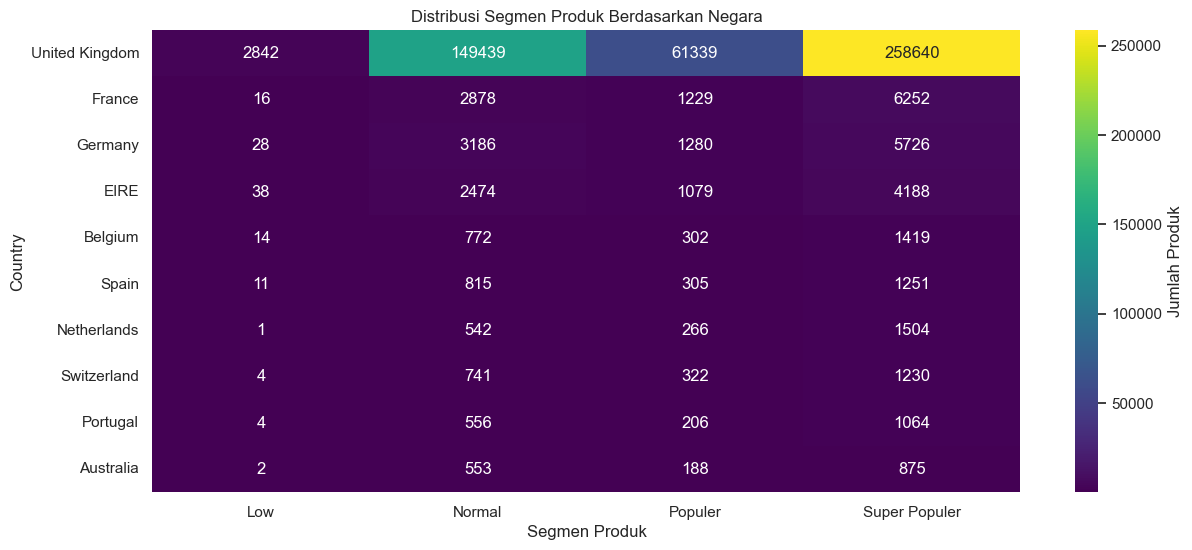

In [160]:
# Mengelompokkan data berdasarkan 'Country' dan 'FinalSegment', lalu menghitung jumlah produk
segmen_product_by_country = df_sales.groupby(['Country', 'FinalSegment']).size().unstack(fill_value=0)
# Menghitung total produk per negara dan memilih 10 negara teratas
top_10_countries_product = segmen_product_by_country.sum(axis=1).sort_values(ascending=False).head(10).index
# Filter hanya untuk 10 negara teratas
segmen_top_countries = segmen_product_by_country.loc[top_10_countries_product]
# Membuat heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(segmen_top_countries, annot=True, cmap='viridis', fmt='d', cbar_kws={'label': 'Jumlah Produk'})
plt.title('Distribusi Segmen Produk Berdasarkan Negara')
plt.xlabel('Segmen Produk')
plt.ylabel('Country')
plt.show()

- **United Kingdom** adalah pasar terbesar secara signifikan untuk semua segmen produk.
- Negara-negara lain seperti **France**, **Germany**, dan **EIRE** juga memiliki jumlah penjualan yang cukup besar, dengan dominasi pada segmen produk "Super Popular" dan "Normal".
- Berdasarkan data segmen customer dan segmen produk dapat disimpulkan bahwa **United Kingdom** adalah negara domestik atau negara asal toko ritel.

# Rangkuman Analisis Segmentasi Pelanggan & Produk

## 1. Performa Segmen Pelanggan

### Potential Loyalist
- Kontributor pendapatan **terbesar**: **28.2M** dari **3.177 pelanggan**
- Mengalami peningkatan signifikan, terutama menjelang akhir tahun
- Dominan dalam pembelian **produk Super Popular**
-  *Peluang besar untuk ditingkatkan menjadi High Value atau Top Customers*

###  High Value Customers
- Pendapatan tinggi (**15.0M**) dari **257 pelanggan**
- Nilai transaksi per pelanggan sangat tinggi
- Jumlah pelanggan relatif stabil atau menurun
-  *Perlu strategi retensi dan peningkatan frekuensi pembelian*

###  Top Customers
- Pendapatan besar (**8.6M**) hanya dari **13 pelanggan**
- Rata-rata nilai transaksi per individu **tertinggi**
- Hampir seluruhnya berasal dari United Kingdom
-  *Perlu strategi eksklusif dan personalisasi tinggi*

### Lost Customers
- Pendapatan terendah (**4.3M**) dari **1.258 pelanggan**
- Tidak aktif setelah Juli 2019
-  *Perlu strategi reaktivasi atau segmentasi ulang untuk efisiensi*

---

## 2. Tren Pendapatan Bulanan
- Total revenue meningkat signifikan sejak pertengahan 2019
- Puncak pendapatan terjadi pada **November 2019**
-  *Q4 (Oktober–Desember) adalah momentum utama untuk kampanye peningkatan profit*

---

## 3. Average Basket Size (ABS)

### Per Segmen Pelanggan:
- **Top Customers** mendominasi ABS bulanan
- **Potential Loyalist** dan **High Value Customers** stabil dan signifikan
- **Lost Customers** menunjukkan kontribusi paling kecil

### Per Kategori Produk:
- **Super Popular** = kontribusi tertinggi terhadap ABS bulanan
- **Popular** = kontribusi stabil
- **Normal & Low** = kontribusi minimal
-  *Fokus promosi pada produk Super Popular meningkatkan transaksi bernilai tinggi*

---

## 4. Analisis Geografis

###  United Kingdom
- Pasar terbesar dan paling dominan:
  - 2.886 Potential Loyalist
  - 1.160 Lost Customers
  - 238 High Value Customers
  - 9 Top Customers
-  *Target utama dalam strategi akuisisi, retensi, dan personalisasi*

###  Negara Lain
- Negara seperti Germany, France, EIRE memiliki jumlah pelanggan lebih kecil
- Masih berkontribusi pada segmen produk Super Popular dan Normal
-  *Berpotensi untuk ekspansi terbatas melalui kampanye bertarget*

---

## Kesimpulan Utama
-  **Potential Loyalist** = segmen strategis untuk peningkatan jangka pendek dan konversi jangka panjang
-  **Produk Super Popular** = pendorong utama pertumbuhan pendapatan dan ABS
-  **United Kingdom** = pasar inti yang perlu difokuskan secara khusus
-  **Akhir Tahun (Q4)** = periode krusial untuk memaksimalkan pendapatan



#  Rekomendasi 

##  Rekomendasi Umum (Q1–Q4)
Strategi tahunan ini berfokus pada peningkatan profit secara berkelanjutan, dengan pendekatan bertahap berdasarkan segmentasi pelanggan:

### 1. Reaktivasi Lost Customers
Prioritaskan di awal tahun (Q1–Q2) untuk menghidupkan kembali pelanggan yang tidak aktif:

- Kirim email marketing personal dengan penawaran menarik.
- Jalankan kampanye seperti **“We Miss You”** disertai diskon atau hadiah eksklusif.

### 2. Aktivasi Potential Loyalist
Segmen dengan kontribusi penjualan terbesar dan potensi pertumbuhan:

- Tingkatkan frekuensi pembelian dan **Average Basket Size (ABS)**.
- Terapkan promosi bundling dan program loyalitas berbasis poin atau cashback.
- Dorong konversi mereka menjadi **High Value Customers**.

### 3. Optimalisasi High Value Customers
Pelanggan dengan nilai transaksi tinggi namun masih memiliki ruang untuk peningkatan:

- Berikan penawaran eksklusif, seperti early access dan bundling produk unggulan.
- Hindari ketergantungan pada diskon, gunakan sebagai insentif strategis.
- Target utama: transisi ke **Top Customers**.

---

## Rekomendasi Khusus Q1–Q3
Fokus utama adalah **perluasan basis pelanggan** dan **pembangunan momentum pertumbuhan**:

### Reaktivasi & Akuisisi
- Reaktivasi Lost Customers dengan pendekatan personal.
- Akuisisi pelanggan baru melalui:
  - Promosi referral: ajak teman, dapatkan reward.
  - Welcome discount untuk pembelian pertama.
  - Konten edukatif dan **social proof** (review/testimoni) untuk membangun kepercayaan.

---

##  Rekomendasi Khusus Q4
Periode puncak pendapatan (terutama bulan November), strategi difokuskan pada **monetisasi maksimal dan retensi pelanggan baru**:

### 1. Maksimalkan Penjualan Musiman
- Jalankan kampanye spesial seperti **Black Friday**, **Cyber Monday**, dan **End-Year Sale**.
- Ciptakan urgensi melalui: countdown timer, flash sale, dan kuota terbatas.

### 2. Retensi Pelanggan Baru
- Masukkan pelanggan baru ke program loyalitas secara otomatis pasca pembelian.
- Kirim follow-up email berisi cross-sell produk relevan untuk meningkatkan ABS.

### 3. Fokus Geografis: United Kingdom (UK)
- UK adalah pasar inti dengan cakupan semua segmen pelanggan.
- Gunakan personalisasi konten dan penawaran berdasarkan perilaku pelanggan UK.
- Selanjutnya memanfaatkan peluang pertumbuhan di France dan Germany melalui pendekatan yang disesuaikan dengan karakteristik segmen High Value dan Potential Loyalist.

---

##  Ringkasan Strategi Bertahap Berdasarkan Segmen

| Segmen Pelanggan       | Fokus Q1–Q3              | Fokus Q4               | Strategi Tahunan                                    |
|------------------------|--------------------------|------------------------|-----------------------------------------------------|
| Lost Customers         | Reaktivasi               | -                      | Email personal, kampanye “We Miss You”              |
| Potential Loyalist     | Aktivasi & Konversi      | Optimisasi             | Promosi bundling, program loyalitas                 |
| High Value Customers   | -                        | Pemeliharaan & Upgrade | Penawaran eksklusif, produk super populer           |
| Top Customers          | -                        | Retensi                | Personalized experience, loyalty reward             |

---

##  Catatan Penting
- Setiap segmen memerlukan pendekatan unik berdasarkan perilaku dan nilai bisnisnya.
- Lakukan pemantauan data rutin untuk menyesuaikan strategi secara dinamis dan berbasis insight terbaru.
